# 호텔 예약 취소 예측

## 서론

### 분석 배경

호텔 방을 예약하기에 가장 좋은 시기가 언제인지 궁금한 적이 있습니까? 
아니면 최고의 일일 요금을 얻기 위해 최적의 체류 기간? 
호텔이 불균형 적으로 많은 수의 특별 요청을 받을 가능성이 있는지 여부를 예측하려면 어떻게 해야 합니까?

이 호텔 예약 데이터 세트는 이러한 질문을 탐색하는 데 도움이 됩니다!

데이터에서 다루는 주제 및 질문 :

손님은 어디에서 오나요?<br> 
가장 바쁜 달은 어느 것입니까?<br>
사람들이 호텔에 얼마나 오래 있습니까?<br>
시장 세그먼트 별 예약<br>
몇 번의 예약이 취소 되었습니까?<br>
어느 달에 가장 많은 취소 횟수가 있습니까?<br>
취소를 예측하는 데 가장 중요한 기능은 무엇입니까?

### 분석 목표

호텔 취소 예측

### 변수 설명

 이름 | 형식 | 설명
:---:|:---:|:---
호텔 |  | 호텔 구분,<br> H1 = 리조트 호텔,<br> H2 = 시티 호텔
is_canceled |  | 예약이 취소되었는지 여부를 나타내는 값,<br> 0:숙박,<br> 1:취소
lead_time |  | 예약 시작 날짜와 도착 날짜 사이에 경과 된 일수
arrival_date_year |  | 도착 연도
arrival_date_month |  | 도착 월
arrival_date_week_number |  | 도착한 주
arrival_date_day_of_month |  | 도착한 일자
stays_in_weekend_nights |  | 손님이 호텔에 숙박하거나 예약한 주말 밤(토요일 또는 일요일)의 수
stays_in_week_nights |  | 손님이 호텔에 숙박하거나 예약한 주중 밤(월요일 ~ 금요일)의 수
adults |  | 성인의 수
children |  | 어린이의 수
babies |  | 아기의 수
meal |  | 예약 된 식사 유형,<br> Undefined/SC : 식사 패키지 없음,<br> BB : 침대&아침 식사,<br> HB : 하프 보드 (아침 식사와 다른 식사 – 보통 저녁),<br> FB : 풀 보드 (아침, 점심 및 저녁)
country |  | ISO에서 규정한 ISO 3166-1 국가코드 표준 형식으로 표기
market_segment |  | TA : 여행사,<br> TO : 관광업자
distribution_channel |  | 예약 배포 채널,<br> TA : 여행사,<br> TO : 관광업자
is_repeated_guest |  | 예약 이름이 반복 손님의 이름인지 (1) 아닌지 (0)를 나타내는 값
previous_cancellations |  | 현재 예약 이전에 고객이 취소 한 이전 예약 수
previous_bookings_not_canceled |  | 현재 예약 이전에 고객이 취소하지 않은 이전 예약 수
reserved_room_type |  | 예약된 객실 유형의 코드
assigned_room_type |  | 예약에 지정된 객실 유형 코드. 호텔 운영상의 이유(예 : 초과 예약) 또는 고객 요청으로 인해 <br>지정된 객실 유형이 예약 된 객실 유형과 다를 수 있음
booking_changes |  | PMS에 예약을 입력 한 순간부터 체크인 또는 취소까지 예약에 대한 변경 / 수정 횟수
deposit_type |  | 고객이 예약을 보장하기 위해 보증금을 지불했는지 표시,<br> No Deposit : 보증금 없음 ,<br> Non Refund : 총 체류 기간에 대한 가치 == 보증금, 환불 불가,<br> Refundable : 총 체류 기간에 대한 가치 > 보증금 , 환불 가능
agent |  | 예약을 하거나 예약 요금을 지불한 회사
company |  | 예약 또는 지불 책임이 있는 회사/법인
days_in_waiting_list |  | 예약이 고객에게 확인되기 전 대기 목록에 있었던 일 수
customer_type |  | Transient : 그외 채널로 호텔 객실을 예약하는 개별 고객,<br> Contract : 항공사 크루나 장기 투숙고객 등,<br> Transient-Party : 써드파티 채널을 통해 호텔 객실을 예약하는 개별 고객,<br> Group : 보통 10개 이상의 객실을 한꺼번에 이용하는 고객
adr |  | 모든 숙박 거래의 총계를 총 숙박 일수로 나누어 정의한 평균 일일 요금
required_car_parking_spaces |  | 고객이 요구 한 주차 공간 수
total_of_special_requests |  | 고객이 요청한 특별 요구사항 수 (예 : 트윈 베드 또는 고층)
reservation_status |  | 다음 세 가지 범주 중 하나를 가정하여 예약 마지막 상태,<br> Canceled : 예약 취소,<br> Check-Out : 고객이 체크인했지만 이미 출발함,<br> No-Show : 고객은 체크인을 하지 않고 호텔에 그 이유를 알림
reservation_status_date |  | 마지막 상태가 설정된 날짜,<br> 이 변수는 ReservationStatus와 함께 사용하여 예약이 언제 취소되었는지 또는 고객이 호텔을 체크 아웃했는지를 알 수 있음

## 라이브러리 로드

#### 필요한 라이브러리 불러오기

In [1]:
import pandas as pd # 데이터 프레임
import numpy as np # 계산
import re # 정규표현식

import warnings
warnings.filterwarnings('ignore') # warning 메시지 제거

import seaborn as sns # 시각화
import graphviz # 시각화

%matplotlib inline

#### 시각화를 위한 한글 폰트 설정하기

In [2]:
import matplotlib.pyplot as plt

# 한글 폰트 지정
#plt.rc('font', family='AppleGothic') # 맥
plt.rc('font', family='Malgun Gothic') # 윈도우

# 마이너스 값 깨지는 현상 해결
plt.rc('axes', unicode_minus=False)

# 레티나 디스플레이 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

#### 작업 경로 지정

In [3]:
import os # wd 변경
os.getcwd()
# os로 작업 경로 지정
# os.chdir('D:/5 Project/GitHub/CollaborationWork/jyeon94/Learning_Spoons_Second_Project/data/')
#os.chdir('/Users/jungdayoung/Documents/GitHub/Learning_Spoons_Third_Project/data/')b

'C:\\Users\\chuu\\Documents\\GitHub\\Learning_Spoons_Third_Project\\scripts'

## 데이터셋 가져오기

In [4]:
df = pd.read_csv('../data/hotel_bookings.csv')
df.shape

(119390, 32)

In [5]:
# 컬럼이 모두 보이도록 설정합니다.

pd.options.display.max_columns = 32

In [6]:
# 미리보기를 합니다.

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## EDA

### pandas-profiling

In [7]:
# pandas_profiling 을 통해 ProfileReport 로 간단한 eda 리포트를 만들어 봅니다.

# from pandas_profiling import ProfileReport

# Profile = ProfileReport(df)
# Profile.to_file(output_file = 'hotel_cancelations.html')

### histogram

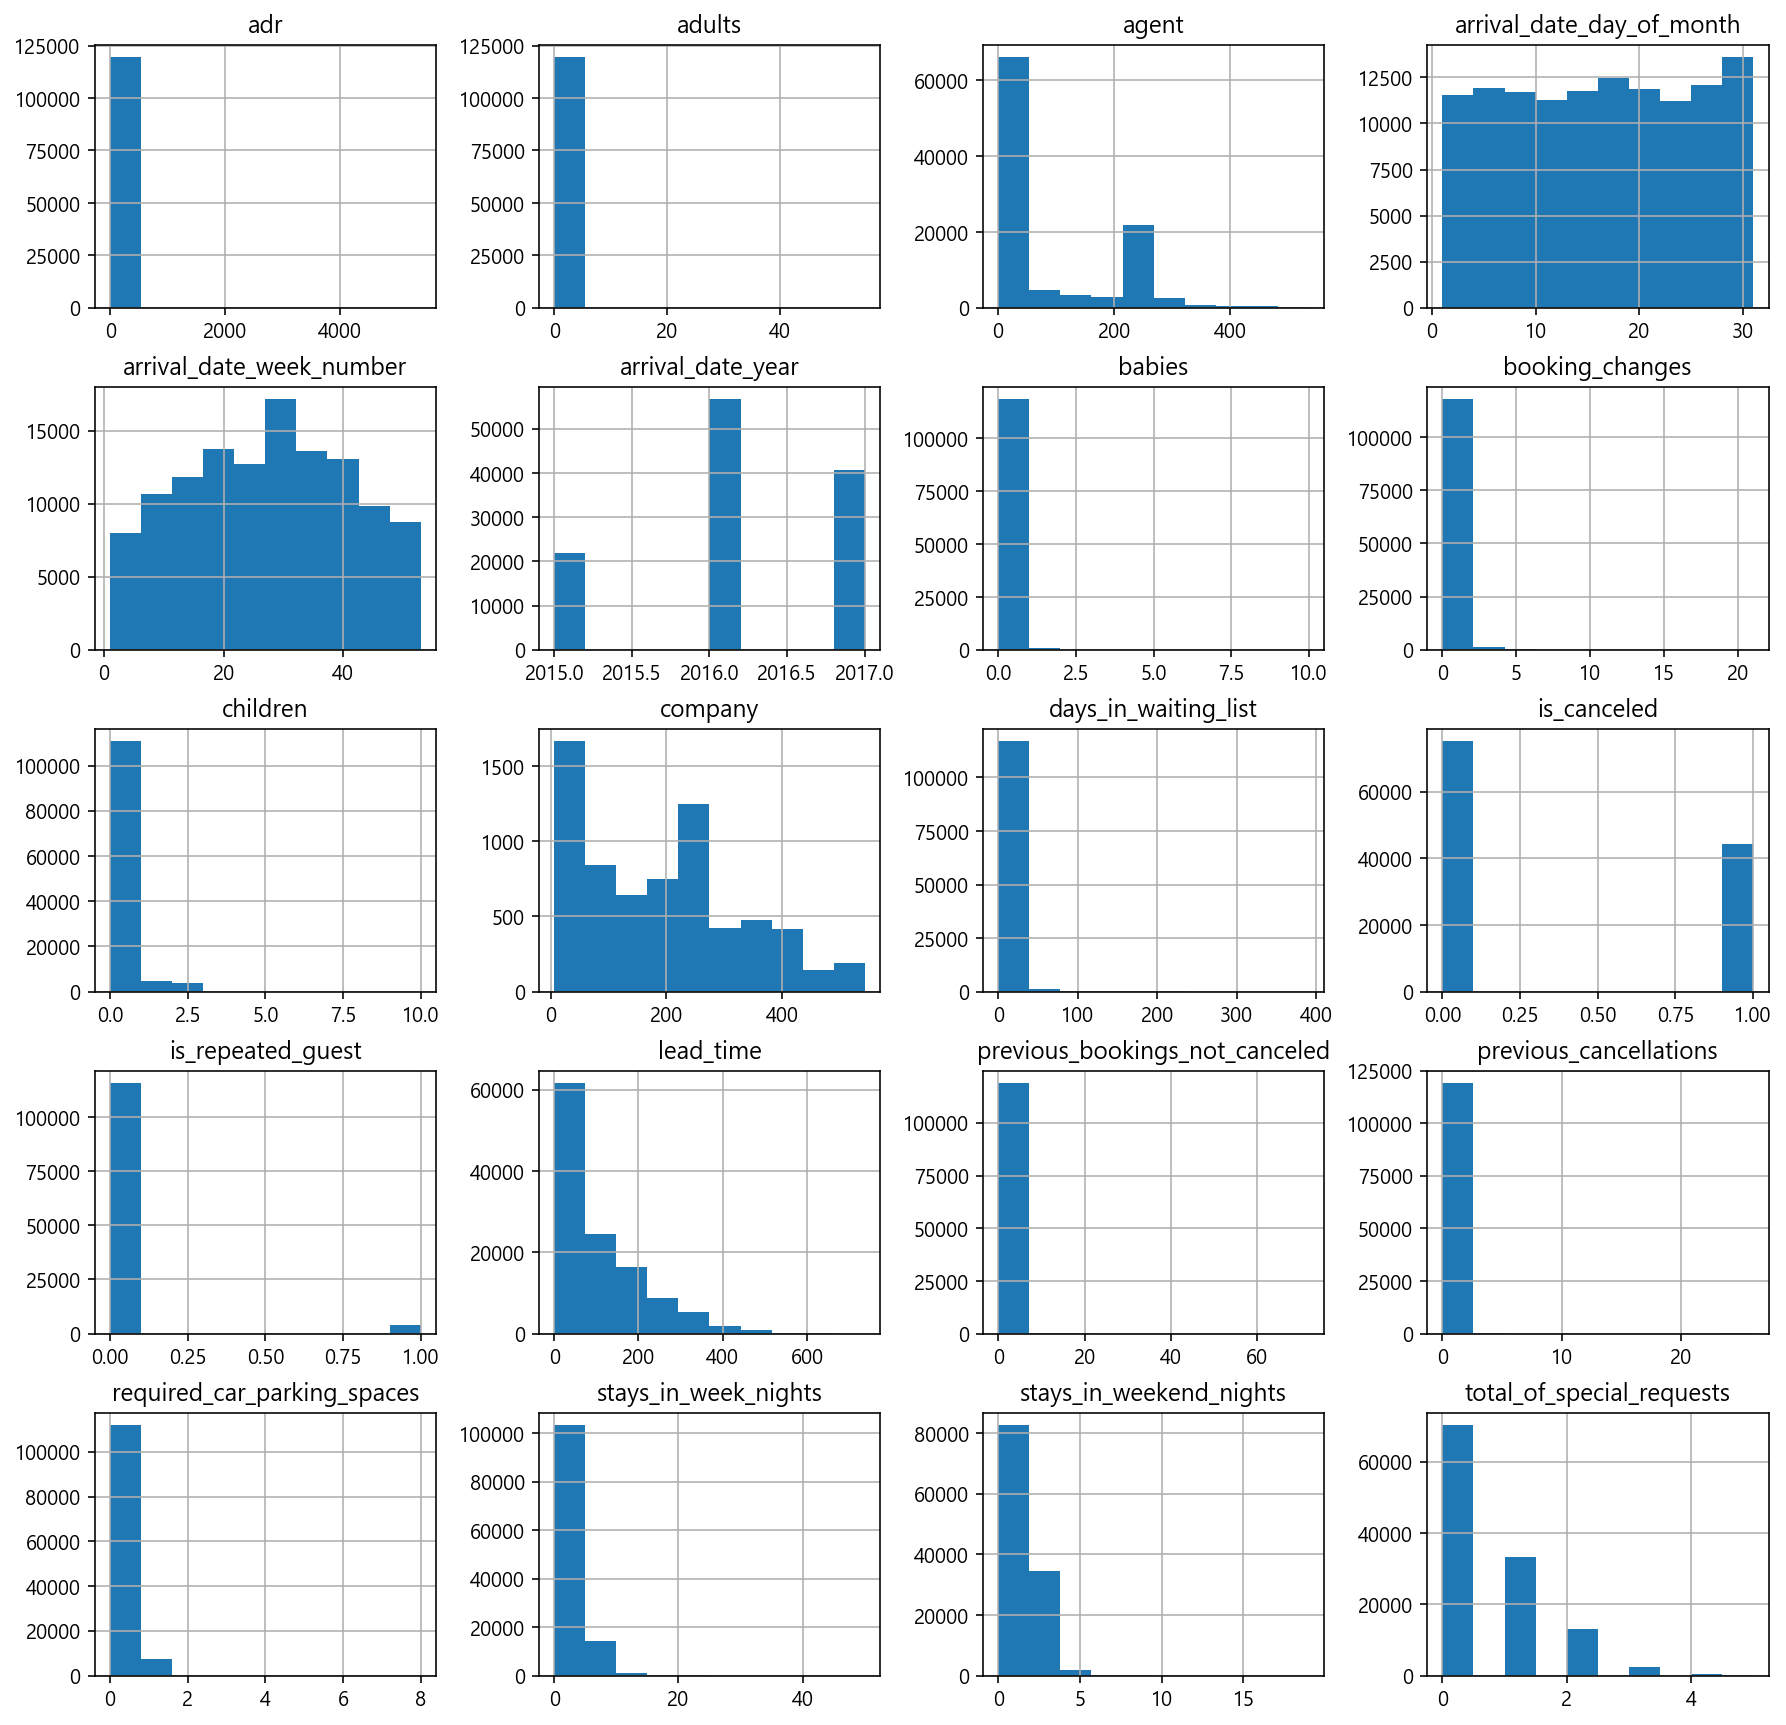

In [8]:
h = df.hist(figsize=(15, 15))

### 데이터 전처리

#### 결측치 채우기

In [9]:
df.shape

(119390, 32)

In [10]:
# 결측치 확인
df.isnull().sum().sort_values(ascending=False).head()

company      112593
agent         16340
country         488
children          4
lead_time         0
dtype: int64

In [11]:
# 'country' 값의 결측치를 "None" 으로 채우기
df['country'] = df['country'].fillna("None")

In [12]:
# 'company'의 결측치가 약 94.3%로 해당 열 삭제
df = df.drop(['company'], axis=1)

In [13]:
# 'agent'의 결측치를 0으로 대체
df['agent'] = df['agent'].fillna(0)

In [14]:
# 'children'의 결측치 4개를 0으로 대체
df['children'] = df['children'].fillna(0)

#### 데이터 타입 변경

In [15]:
import calendar
calendar_month = {v:k for k,v in enumerate(calendar.month_abbr)}
del calendar_month['']
 
def month_number(data):
    for keys,values in calendar_month.items():
        data.loc[data['arrival_date_month'].str.contains(keys),'arrival_date_month_num'] = values
    data['arrival_date_month_num'] = data['arrival_date_month_num'].astype('int')
    return data[['arrival_date_month','arrival_date_month_num']]

In [16]:
month_number(df).head()

,arrival_date_month,arrival_date_month_num
0,July,7
1,July,7
2,July,7
3,July,7
4,July,7


In [17]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_num'],
      dtype='object')

In [18]:
# int을 str로 변환
df[['arrival_date_year','arrival_date_month_num','arrival_date_day_of_month']]= df[['arrival_date_year','arrival_date_month_num','arrival_date_day_of_month']].astype('str')

In [19]:
# float을 int로 변환
df['children'] = df['children'].astype(int)

In [20]:
# 연월일을 합쳐 'arrival_date'컬럼 추가
df['arrival_date'] = df['arrival_date_year'] + "-" + df['arrival_date_month_num'] + "-" + df['arrival_date_day_of_month']
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [21]:
# 'arrival_date'에 요일을 부여하여 'arrival_day_of_week' 컬럼 추가
df['arrival_day_of_week'] = df['arrival_date'].dt.dayofweek

In [23]:
# City 호텔과 Resort 호텔 따로 저장
# df[df['hotel'] == 'City Hotel'].to_csv('../data/City Hotel.csv',index = False)
# df[df['hotel'] == 'Resort Hotel'].to_csv('../data/Resort Hotel.csv',index = False)

In [24]:
df_Resort = pd.read_csv('../data/Resort Hotel.csv')
df_City = pd.read_csv('../data/City Hotel.csv')

In [25]:
length = lambda x: x == 1
length_2 = lambda x: x == 0

### 데이터 시각화

#### Resort Hotel

In [26]:
df_Resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_num,arrival_date,arrival_day_of_week
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,...,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,...,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,...,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,...,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,...,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2015-07-01,2


In [27]:
df_Resort.shape

(40060, 34)

In [28]:
df_Resort.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date_month_num,arrival_day_of_week
count,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.00000,40060.000000,40060.000000
mean,0.277634,92.675686,2016.121443,27.140864,15.821243,1.189815,3.128732,1.867149,0.128682,0.013904,0.044383,0.101722,0.146455,0.287968,172.987444,0.527758,94.952930,0.138068,0.61977,6.544583,3.023540
std,0.447837,97.285315,0.722347,14.005441,8.883708,1.147812,2.461329,0.697285,0.445195,0.118998,0.205948,1.335115,1.001955,0.726548,117.927342,7.428580,61.442418,0.351001,0.81393,3.183032,1.998244
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.00000,1.000000,0.000000
25%,0.000000,10.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,50.000000,0.000000,0.00000,4.000000,1.000000
50%,0.000000,57.000000,2016.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,75.000000,0.000000,0.00000,7.000000,3.000000
75%,1.000000,155.000000,2017.000000,38.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,241.000000,0.000000,125.000000,0.000000,1.00000,9.000000,5.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,535.000000,185.000000,508.000000,8.000000,5.00000,12.000000,6.000000


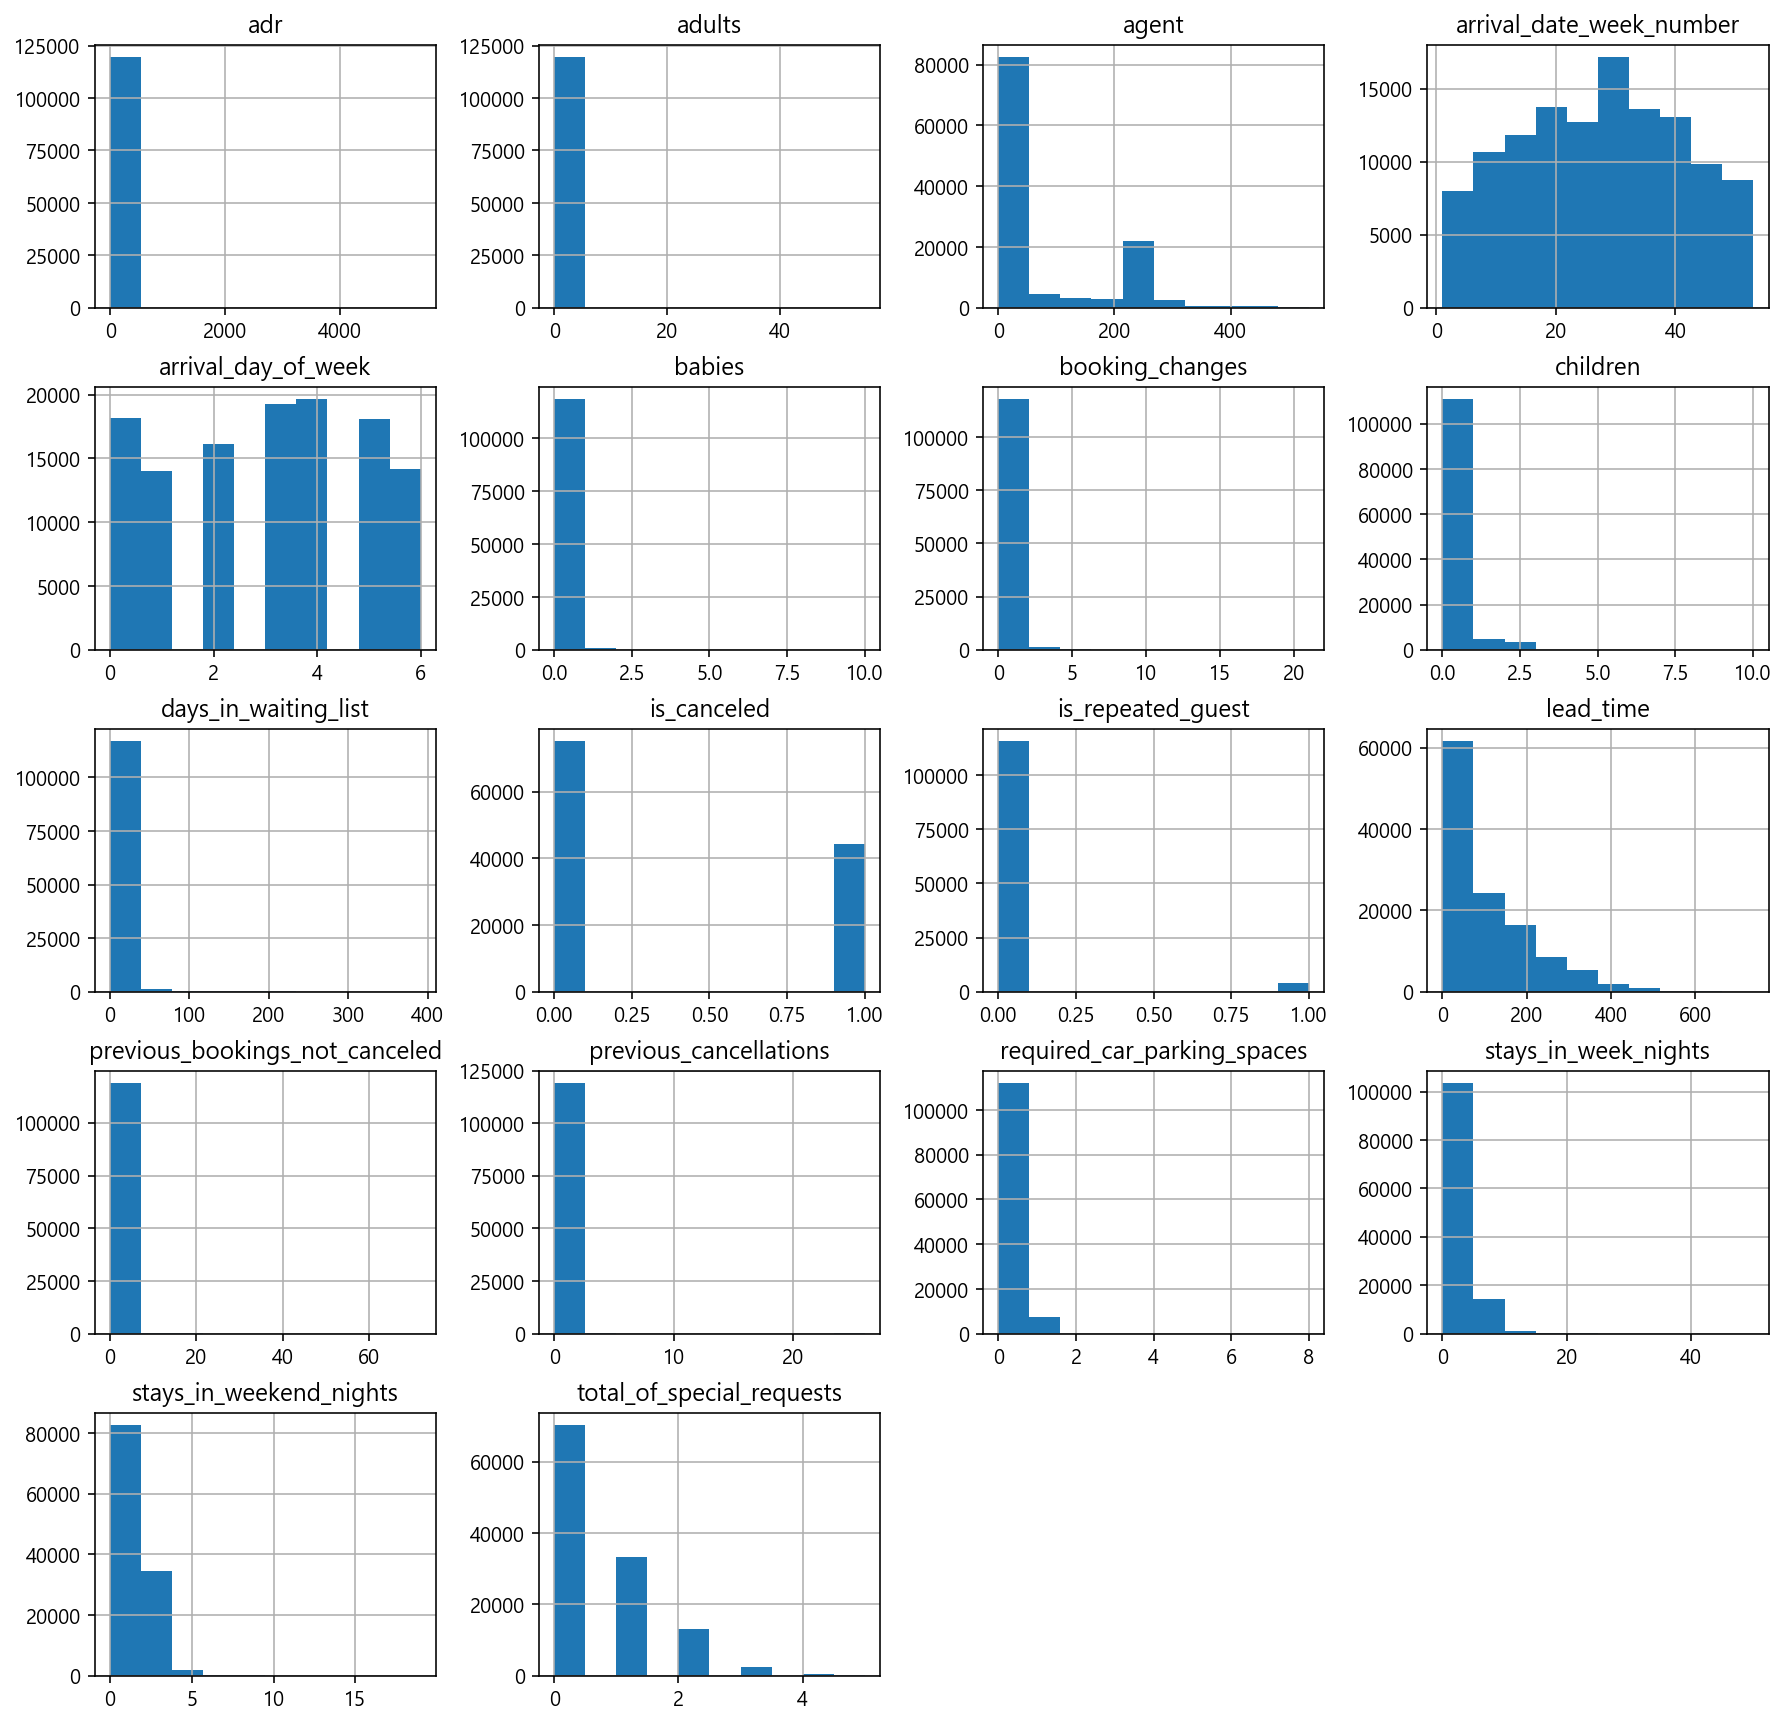

In [29]:
h = df.hist(figsize=(15,15))

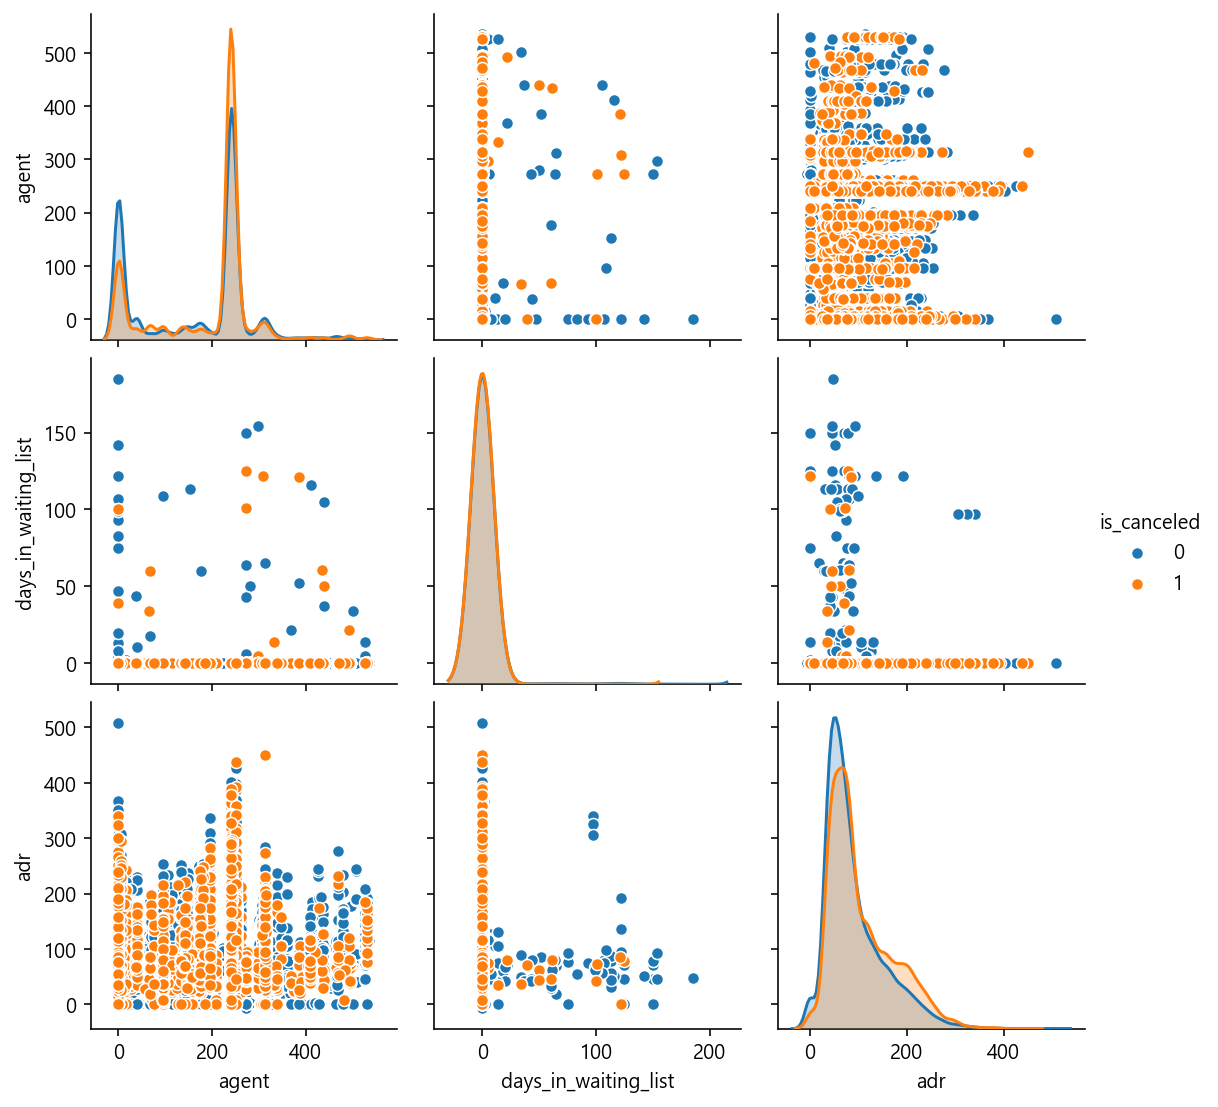

In [30]:
sns.pairplot(df_Resort[['agent','days_in_waiting_list','adr','is_canceled']],hue='is_canceled',diag_kws={'bw':10})

##### 시간과 관련된 컬럼 살펴보기

연도별 예약 및 취소율 통해 취소 비중이 증가 추세인 것을 확인할 수 있습니다.

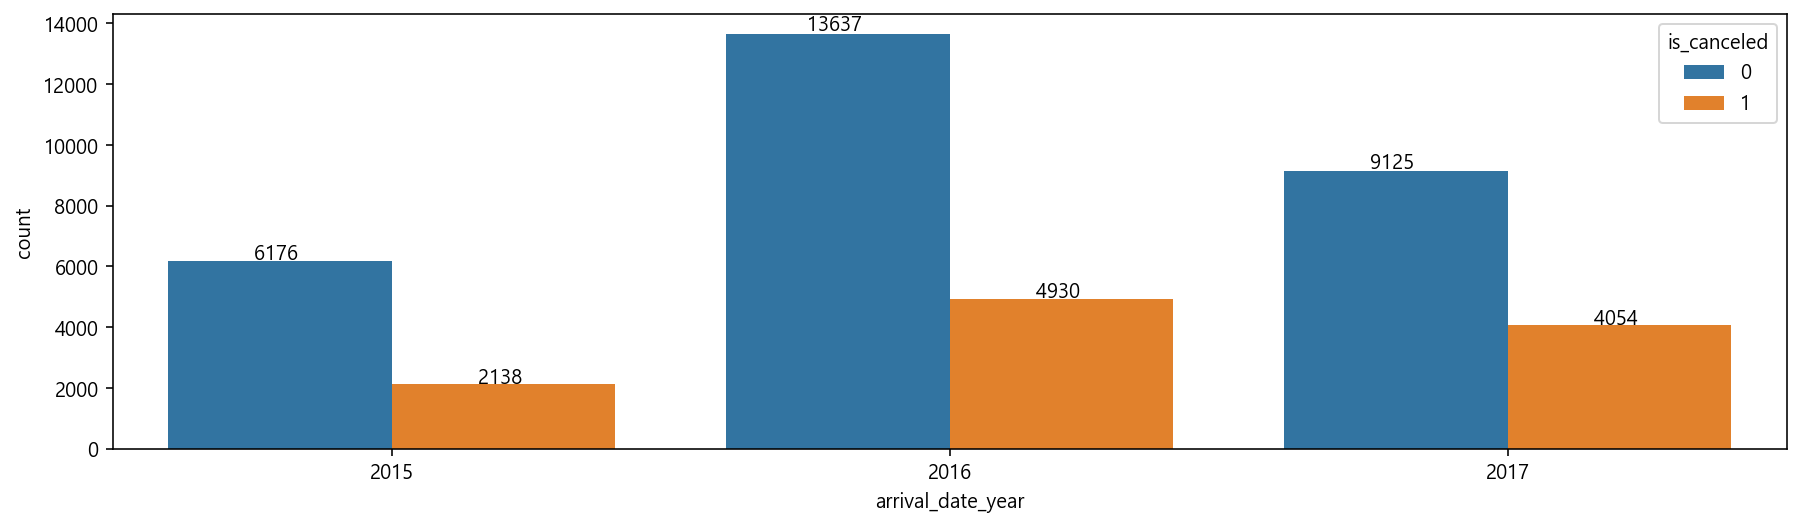

In [31]:
# 연도별 예약 및 취소 수
hh = df_Resort[['is_canceled', 'arrival_date_year']]

plt.figure(figsize=(15,4))
ax = sns.countplot(data= hh, x= 'arrival_date_year', hue= 'is_canceled')
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.f "%(height), (left+width/2, height*1.01), ha='center')

plt.show()

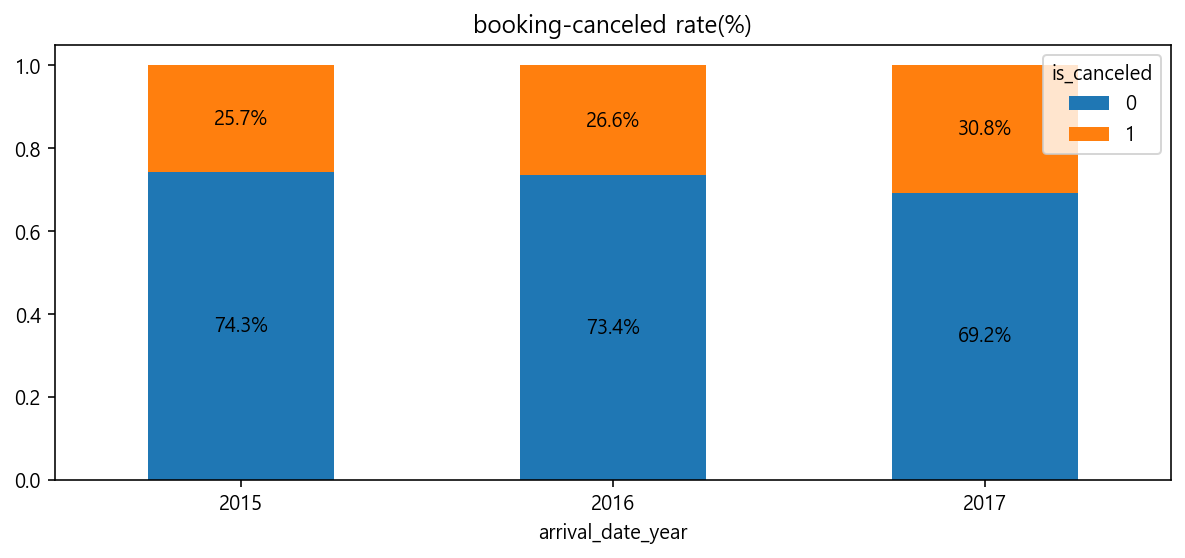

In [32]:
# 연도별 예약 및 취소 비중
hhh = hh.groupby('arrival_date_year')['is_canceled'].value_counts(normalize=True).unstack()

ax = hhh.plot(kind='bar', stacked=True, title="booking-canceled rate(%)", rot=0, figsize=(10,4)) 

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.1f%%"%(height*100), xy=(left+width/2, bottom+height/2), ha='center', va='center') 

plt.show()

arrival_date_week_number 컬럼과 arrival_date_month_num 와 비슷한 성격으로 예상되어   
arrival_date_month_num을 사용한 그래프를 생성합니다.

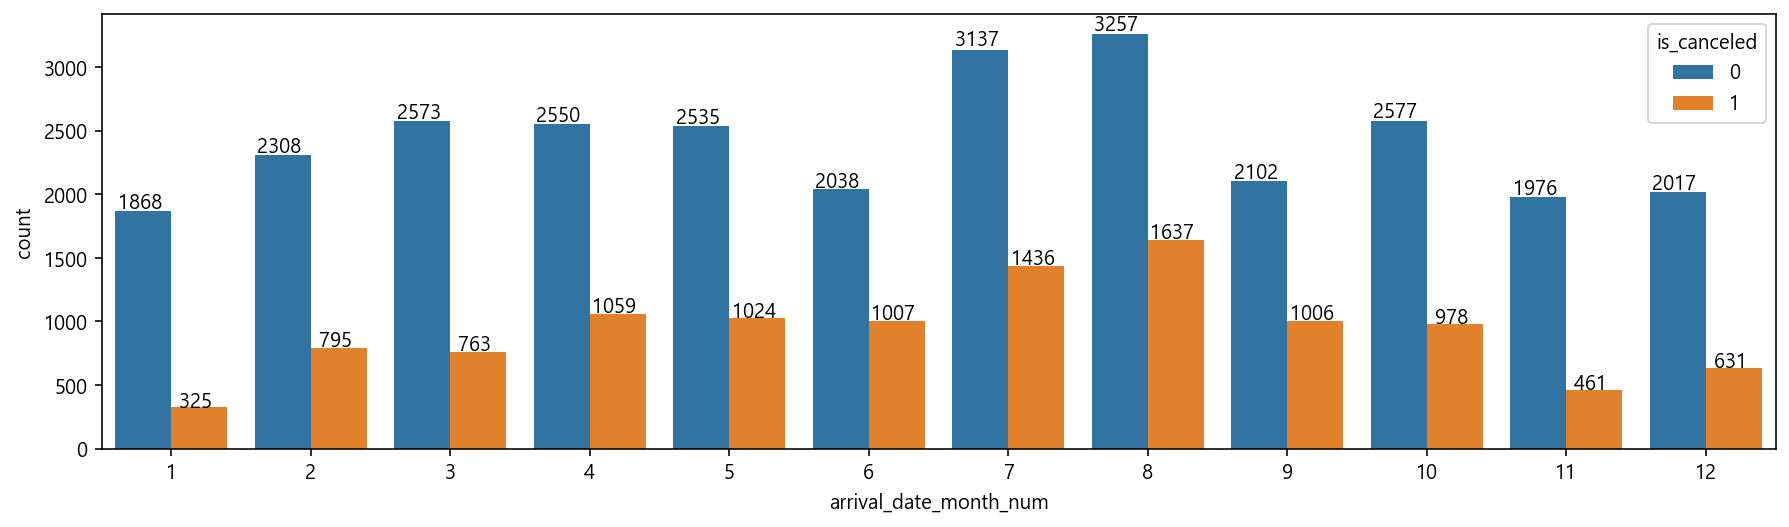

In [33]:
# 월별 예약 및 취소 수
hh = df_Resort[['is_canceled', 'arrival_date_year', 'arrival_date_month_num']]
s = [1,2,3,4,5,6,7,8,9,10,11,12]
# hh['arrival_date_year_month'] = h1['arrival_date_year'] + '-' + h1['arrival_date_month_num']

plt.figure(figsize=(15,4))
ax = sns.countplot(data= hh, x= 'arrival_date_month_num', hue= 'is_canceled', order= s)
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.f "%(height), (left+width/2, height*1.01), ha='center')

plt.show()

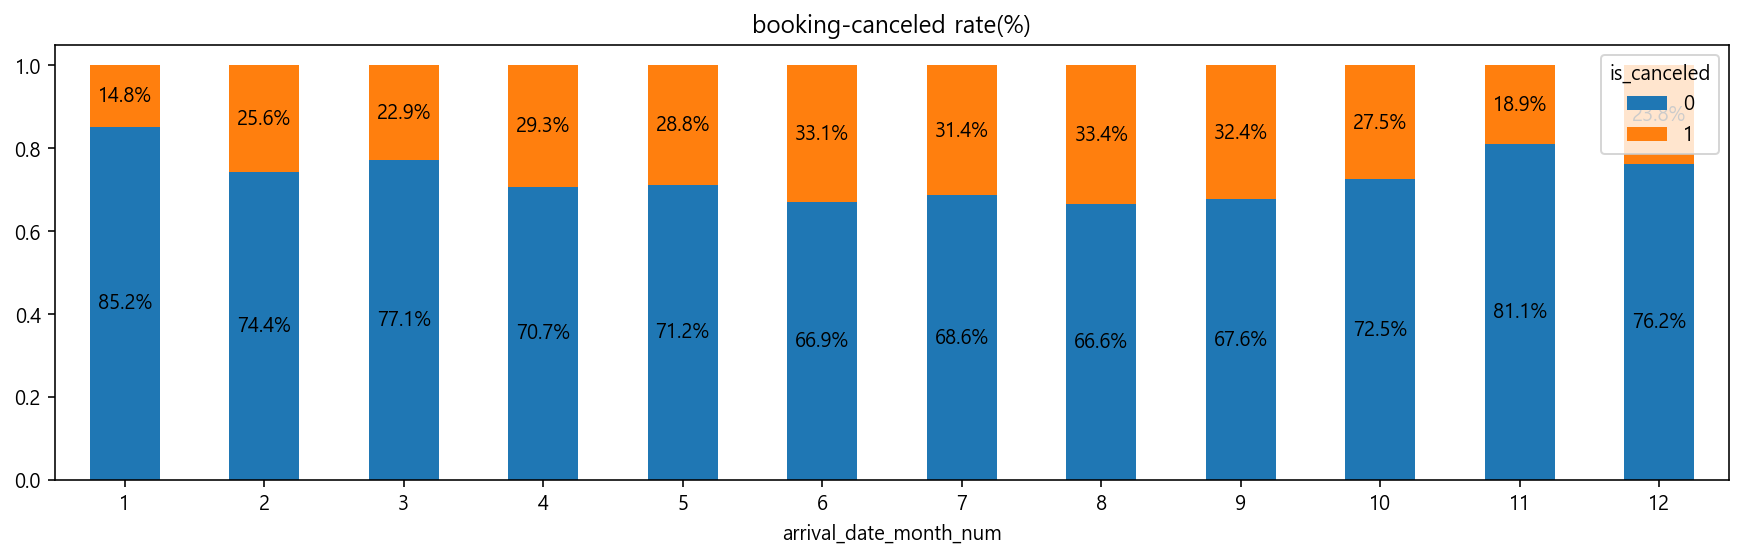

In [34]:
# 월별 예약 및 취소 비중
hhh = hh.groupby('arrival_date_month_num')['is_canceled'].value_counts(normalize=True).unstack()

ax = hhh.plot(kind='bar', stacked=True, title="booking-canceled rate(%)", rot=0, figsize=(15,4)) 

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.1f%%"%(height*100), xy=(left+width/2, bottom+height/2), ha='center', va='center') 

plt.show()

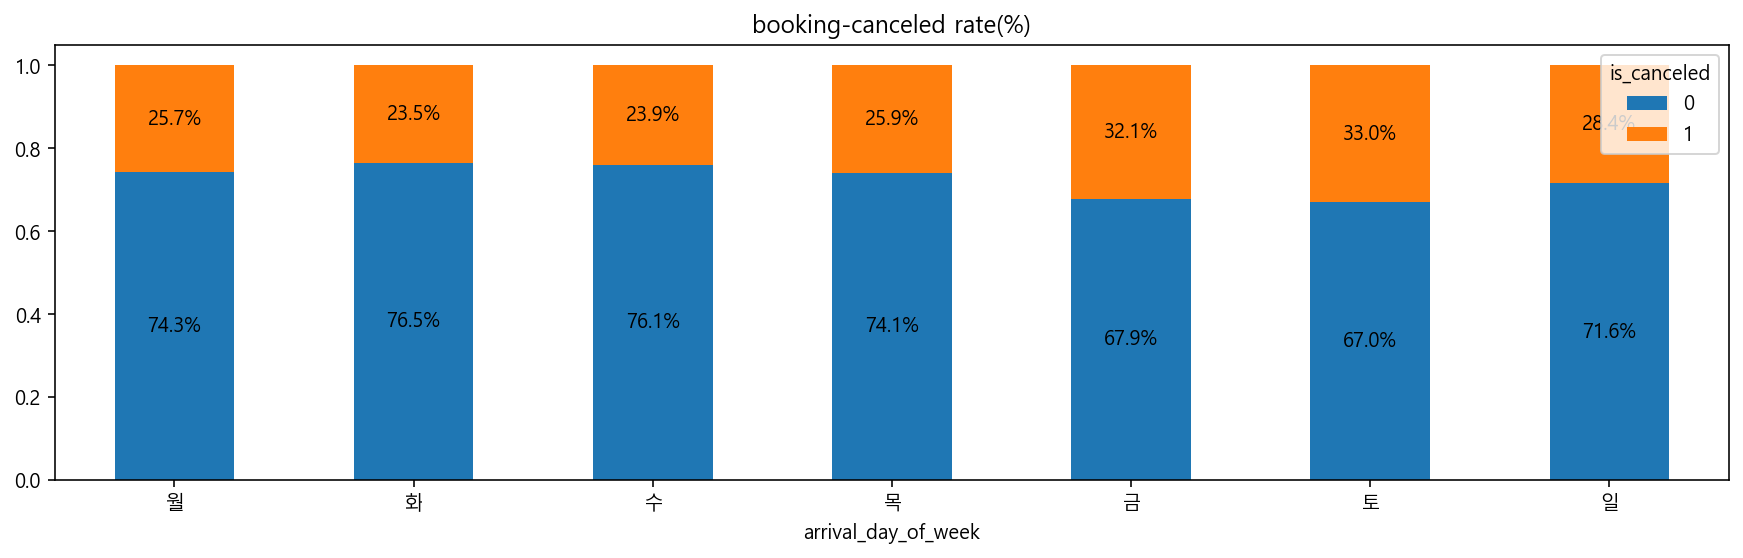

In [160]:
# Resort호텔은 토요일이 취소율이 높아 보입니다.
hhh = df_Resort.groupby('arrival_day_of_week')['is_canceled'].value_counts(normalize=True).unstack()

g = hhh.plot(kind='bar', stacked=True, title="booking-canceled rate(%)", rot=0, figsize=(15,4)) 
g.set(xticklabels=['월','화','수','목','금','토','일'])

for p in g.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    g.annotate("%.1f%%"%(height*100), xy=(left+width/2, bottom+height/2), ha='center', va='center') 

plt.show()

In [36]:
hh = df_Resort[['is_canceled', 'lead_time', 'days_in_waiting_list']]
hh.describe()

,is_canceled,lead_time,days_in_waiting_list
count,40060.000000,40060.000000,40060.000000
mean,0.277634,92.675686,0.527758
std,0.447837,97.285315,7.428580
min,0.000000,0.000000,0.000000
25%,0.000000,10.000000,0.000000
50%,0.000000,57.000000,0.000000
75%,1.000000,155.000000,0.000000
max,1.000000,737.000000,185.000000


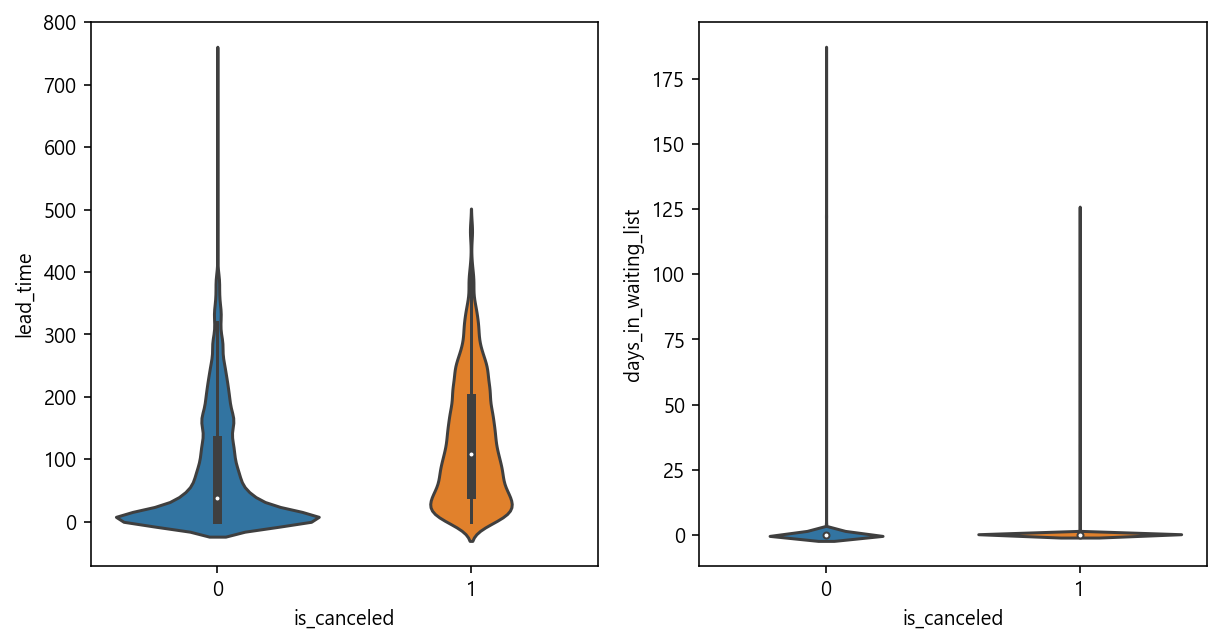

In [37]:
# 대기에 따른 예약, 취소 그래프

h1_m = df_Resort[['lead_time', 'days_in_waiting_list']].columns.tolist()

fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(10,5)
for i, j in enumerate(h1_m):
     sns.violinplot(data= hh, x='is_canceled', y= j, ax=axes[i])

In [38]:
### days_in_waiting_list의 경우 약 99%가 0이므로 이 컬럼은 사용하지 않기로 합니다.
df_Resort['days_in_waiting_list'].value_counts(normalize=True).head(5)

0      0.993635
122    0.001373
65     0.000674
47     0.000574
75     0.000499
Name: days_in_waiting_list, dtype: float64

In [39]:
del df_Resort['days_in_waiting_list']

In [40]:
# 보통 호텔들이 최대 1년반까지 예약이 가능하기때문에 그 이상의 값은 제거합니다.
df_Resort.loc[df_Resort['lead_time'] >= 500, 'lead_time'].count() / df_Resort['lead_time'].count()

0.0006490264603095357

In [41]:
df_Resort = df_Resort[df_Resort['lead_time']<540]

In [42]:
df_Resort_1 = df_Resort[df_Resort['is_canceled'].apply(length)]
df_Resort_0 = df_Resort[df_Resort['is_canceled'].apply(length_2)]

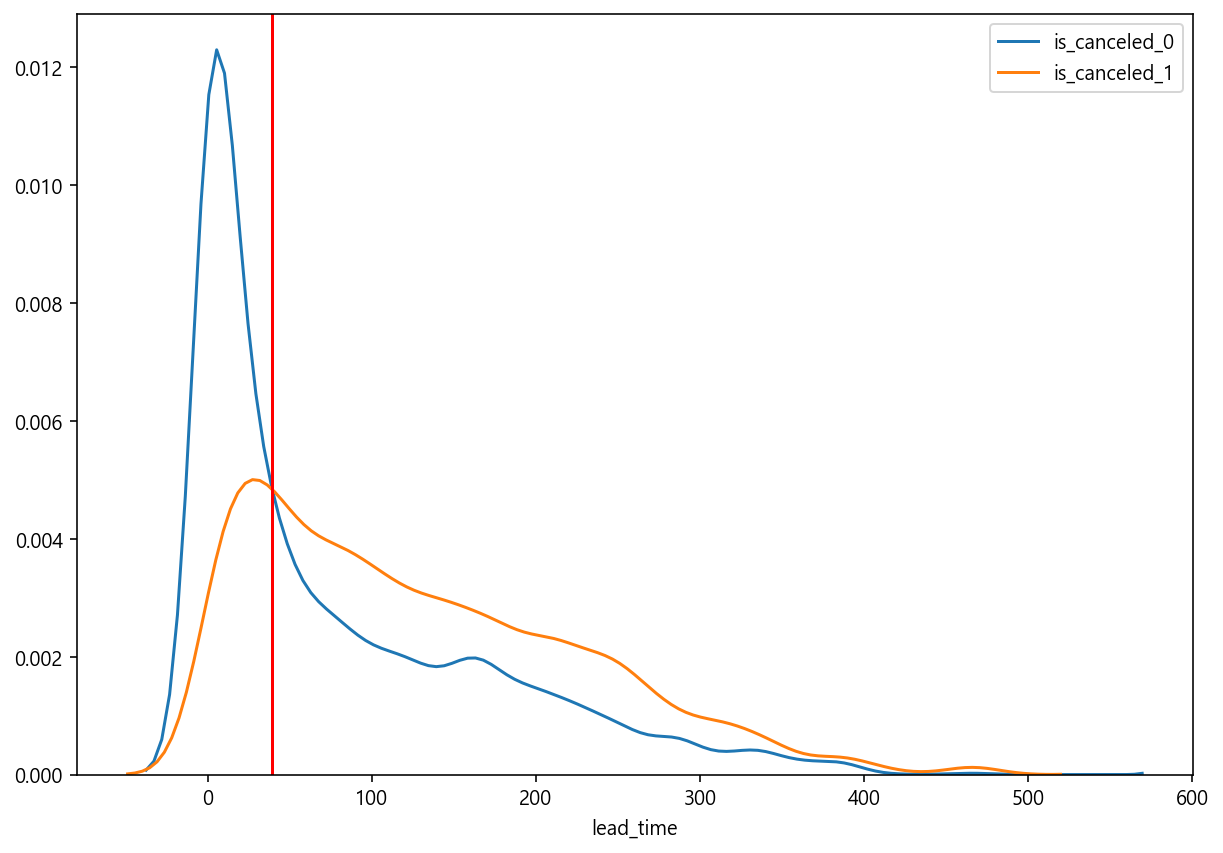

In [43]:
# Resort 호텔의 경우 Lead_Time이 40일 이전에는 취소율이 높지만 그 이후론 취소율이 높습니다
# 예약한지 오래 될 수록 취소율이 높습니다
plt.figure(figsize=(10,7))
sns.distplot(df_Resort_0['lead_time'],hist=False,label='is_canceled_0')
sns.distplot(df_Resort_1['lead_time'],hist=False,label='is_canceled_1')
plt.axvline(x=39,color='red')

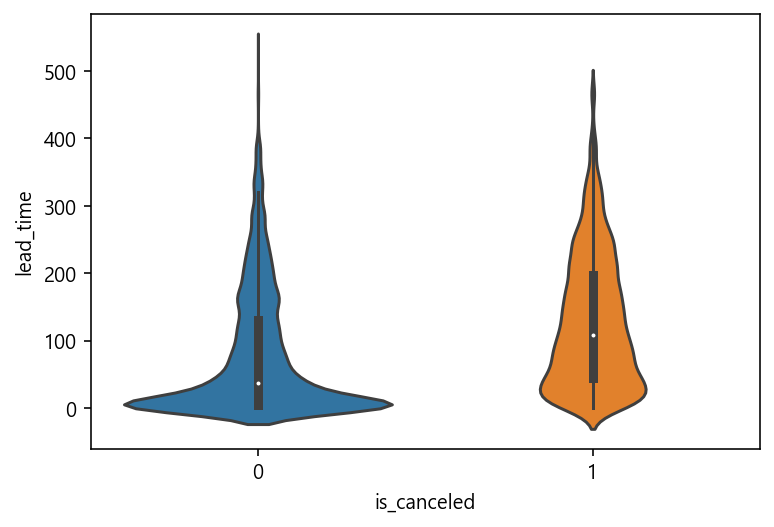

In [44]:
# Lead_Time에 따른 예약, 취소 그래프
hh = df_Resort[['is_canceled', 'lead_time']]

sns.violinplot(data= hh, x='is_canceled', y= 'lead_time')

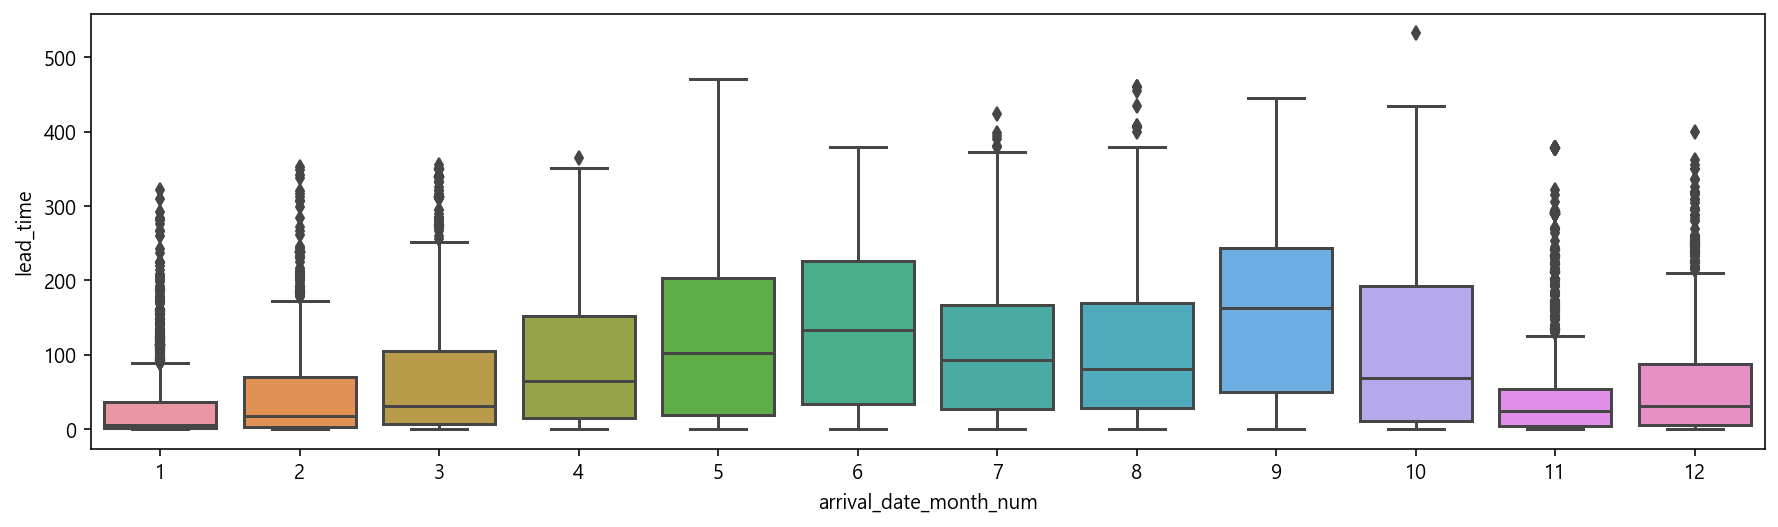

In [45]:
# 성수기인 8월에 예약하려면 얼마나 기다려야할까?
hh = df_Resort[['arrival_date_month_num', 'lead_time']]
s = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.figure(figsize=(15,4))
sns.boxplot(data= hh, x= 'arrival_date_month_num', y= 'lead_time', order= s)

주말 1박, 주중 3박 

In [46]:
df_Resort['stays_in_total_nights'] = df_Resort['stays_in_weekend_nights'] + df_Resort['stays_in_week_nights']

In [47]:
# 주말, 주중에 따른 예약, 취소 기술 통계
hh = df_Resort[['is_canceled', 'stays_in_weekend_nights', 'stays_in_week_nights','stays_in_total_nights']]
hh.describe()

,is_canceled,stays_in_weekend_nights,stays_in_week_nights,stays_in_total_nights
count,40035.000000,40035.000000,40035.000000,40035.000000
mean,0.277807,1.189184,3.127264,4.316448
std,0.447923,1.147458,2.460136,3.378483
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000
50%,0.000000,1.000000,3.000000,3.000000
75%,1.000000,2.000000,5.000000,7.000000
max,1.000000,19.000000,50.000000,69.000000


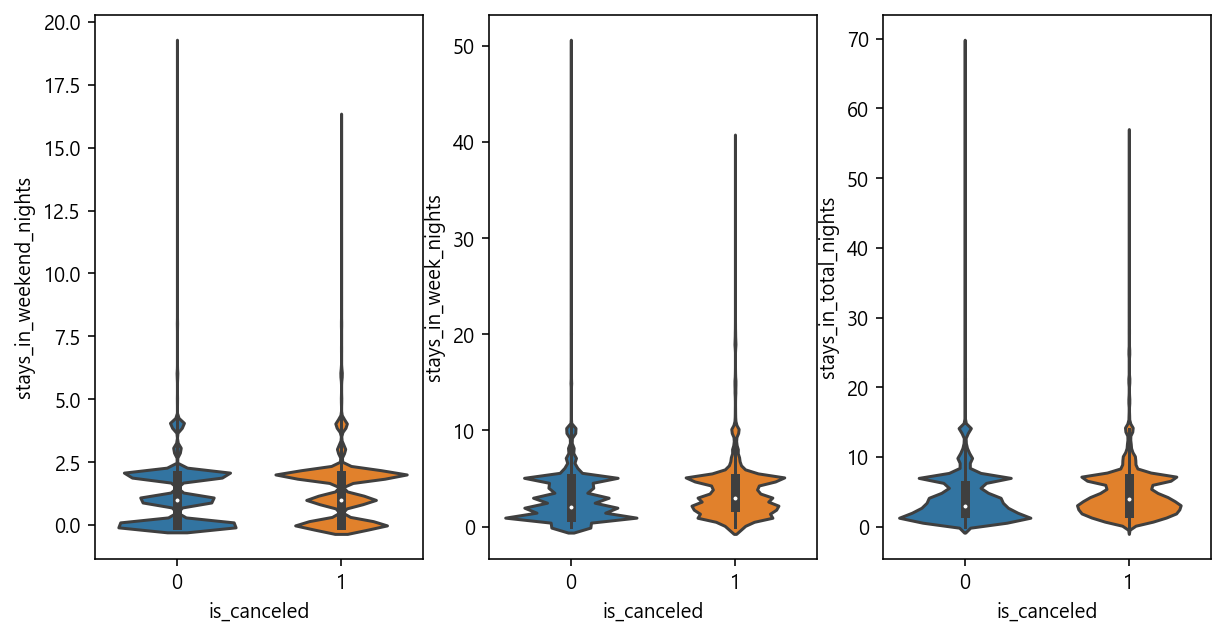

In [48]:
# 주말, 주중에 따른 예약, 취소 그래프

h1_m = df_Resort[['stays_in_weekend_nights', 'stays_in_week_nights', 'stays_in_total_nights']].columns.tolist()

fig, axes = plt.subplots(nrows = 1, ncols = 3)
fig.set_size_inches(10,5)
for i, j in enumerate(h1_m):
     sns.violinplot(data= hh, x='is_canceled', y= j, ax=axes[i])

In [49]:
# 세대 구성?에 따른 예약, 취소 기술 통계
hh = df_Resort[['is_canceled', 'adults', 'children', 'babies']]
hh.describe()

,is_canceled,adults,children,babies
count,40035.000000,40035.000000,40035.000000,40035.000000
mean,0.277807,1.867066,0.128762,0.013913
std,0.447923,0.697459,0.445323,0.119035
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000
max,1.000000,55.000000,10.000000,2.000000


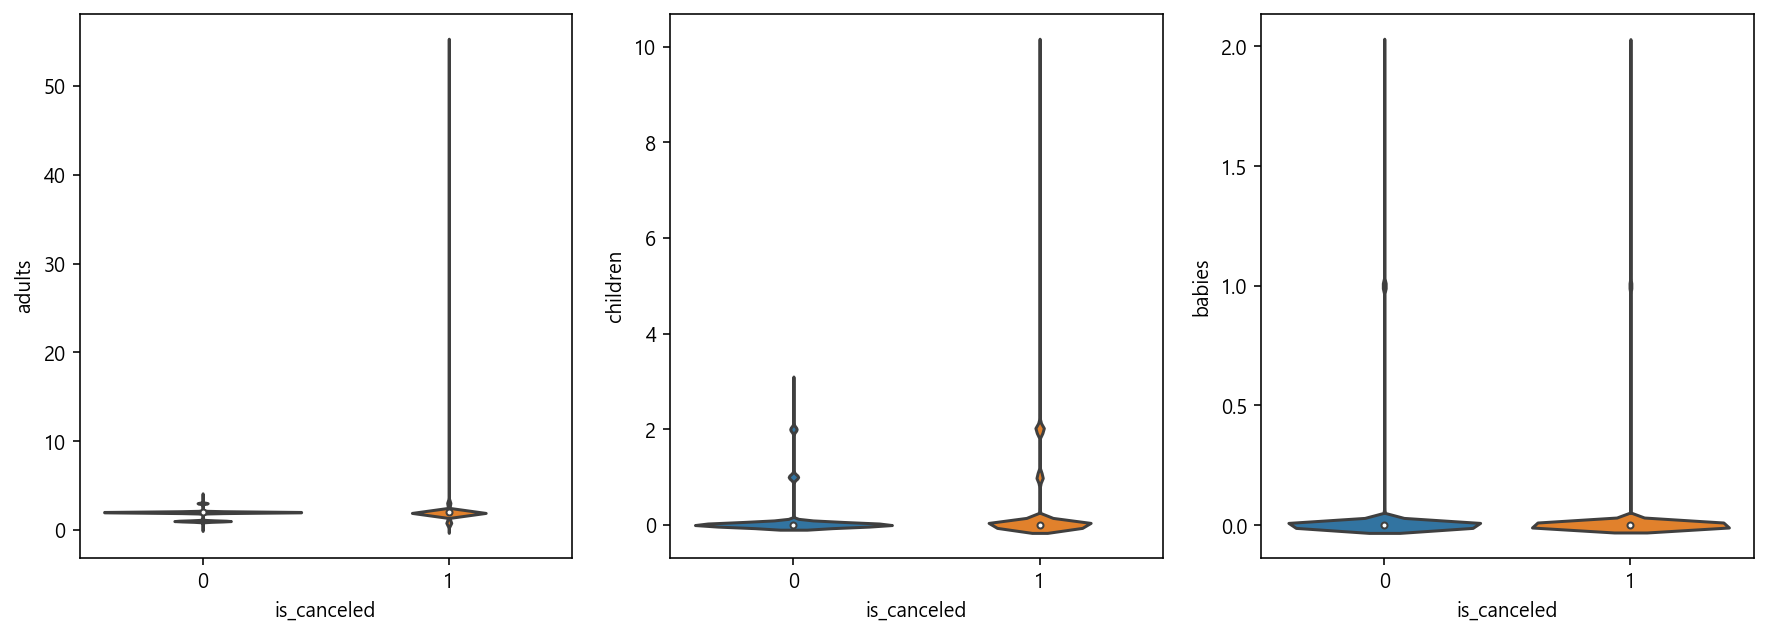

In [50]:
# 인원에 따른 예약, 취소 그래프

h1_m = df_Resort[['adults', 'children', 'babies']].columns.tolist()

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))
fig.set_size_inches(15,5)
for i, j in enumerate(h1_m):
     sns.violinplot(data= hh ,x='is_canceled', y= j, ax=axes[i])

In [51]:
# adults가 0이나 children, babies에 값이 존재??

hh.loc[hh['adults'] == 0, ['children', 'babies']]

,children,babies
2224,0,0
2409,0,0
3181,0,0
3684,0,0
3708,0,0
4127,0,0
9376,0,0
31765,0,0
32029,0,0
32827,0,0


In [52]:
df_Resort=df_Resort[df_Resort['children']<10]

In [53]:
# babies의 비율 확인
hh['babies'].value_counts(normalize=True)
# babies의 약 98%가 0이므로 이 칼럼은 사용하지 않기로 합니다.

0    0.986312
1    0.013463
2    0.000225
Name: babies, dtype: float64

In [54]:
df_Resort = df_Resort[df_Resort['adults']!=0]
del df_Resort['babies']

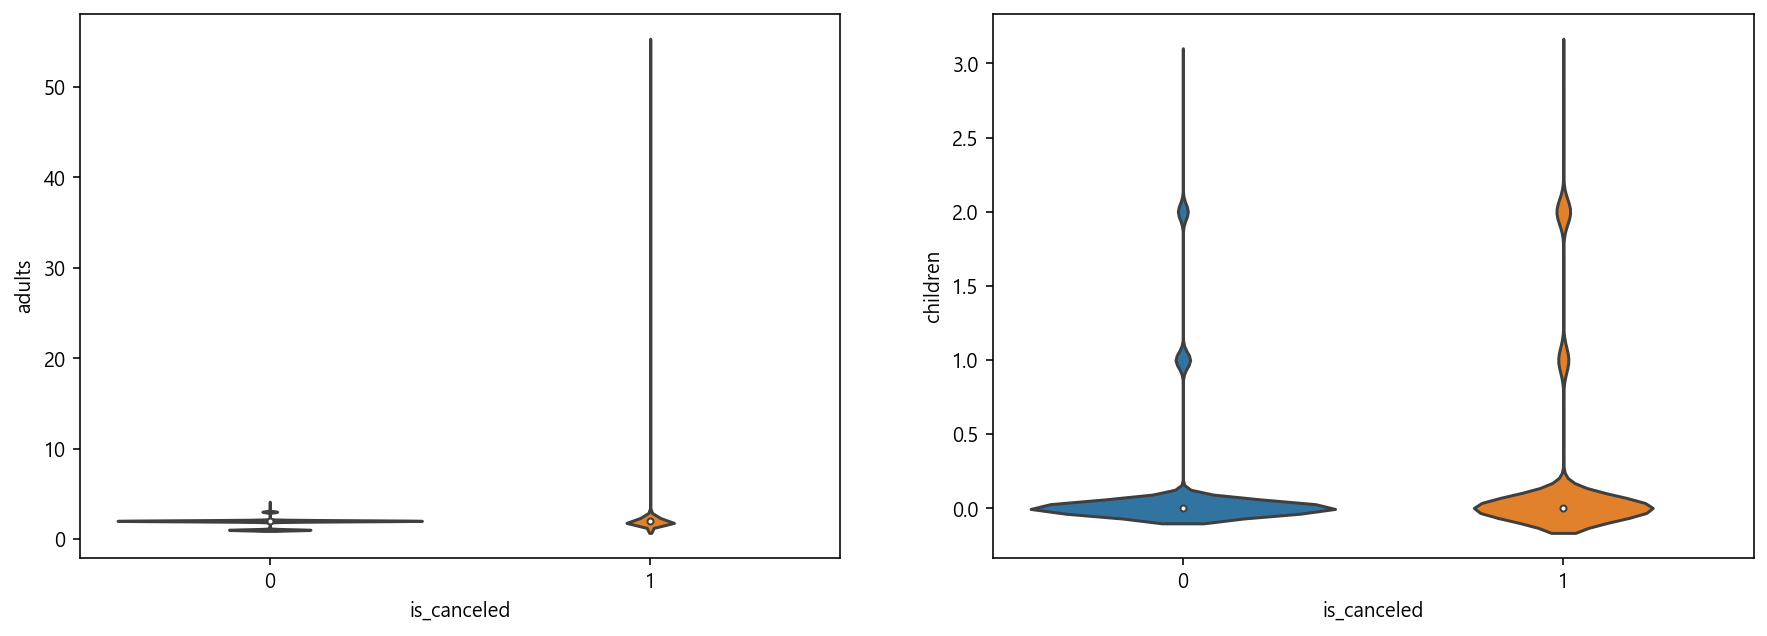

In [55]:
hh = df_Resort[['is_canceled', 'adults', 'children']]
h1_m = hh[['adults', 'children']].columns.tolist()

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
fig.set_size_inches(15,5)
for i, j in enumerate(h1_m):
     sns.violinplot(data= hh ,x='is_canceled', y= j, ax=axes[i])

In [56]:
# 과거 예약 취소, 미취소, 변경에 따른 예약과 취소
hh = df_Resort[['is_canceled', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']]
hh.describe()

,is_canceled,previous_cancellations,previous_bookings_not_canceled,booking_changes
count,40021.000000,40021.000000,40021.000000,40021.000000
mean,0.277829,0.101822,0.146598,0.287424
std,0.447934,1.335762,1.002432,0.724746
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000
max,1.000000,26.000000,30.000000,17.000000


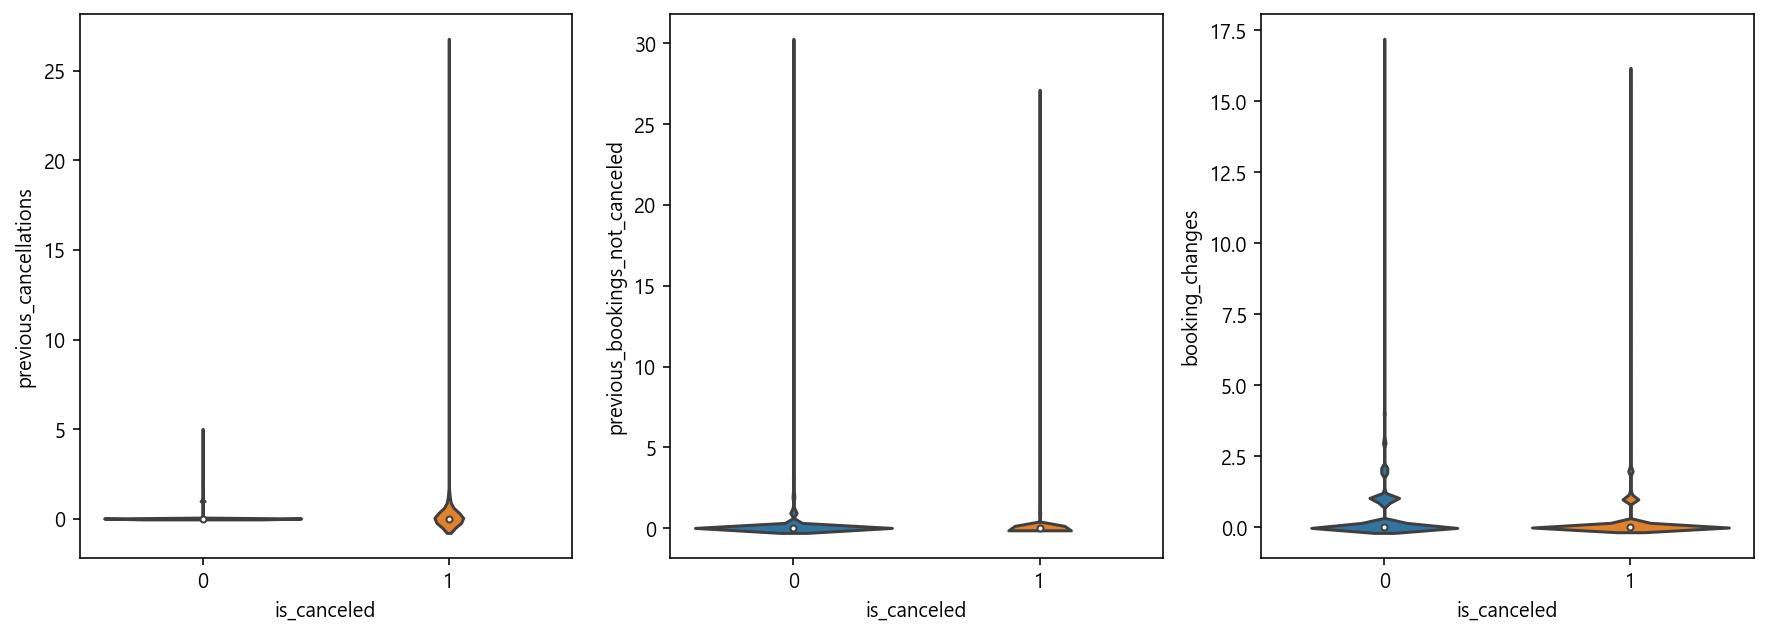

In [57]:
h1_m = df_Resort[['previous_cancellations', 'previous_bookings_not_canceled', 
           'booking_changes']].columns.tolist()

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))
fig.set_size_inches(15,5)
for i, j in enumerate(h1_m):
     sns.violinplot(data= hh ,x='is_canceled', y= j, ax=axes[i])

In [58]:
# 취소 이력이 없는 고객의 취소 수(비율)과 취소 이력이 있는 고객의 취소 수(비율) 비교
print(hh.loc[hh['previous_cancellations'] == 0, 'is_canceled'].value_counts())
print(hh.loc[hh['previous_cancellations'] == 0, 'is_canceled'].value_counts(normalize=True))

print(hh.loc[hh['previous_cancellations'] >= 1, 'is_canceled'].value_counts())
hh.loc[hh['previous_cancellations'] >= 1, 'is_canceled'].value_counts(normalize=True)

0    28731
1    10195
Name: is_canceled, dtype: int64
0    0.738093
1    0.261907
Name: is_canceled, dtype: float64
1    924
0    171
Name: is_canceled, dtype: int64


1    0.843836
0    0.156164
Name: is_canceled, dtype: float64

In [59]:
print(hh.loc[hh['previous_bookings_not_canceled'] == 0, 'is_canceled'].value_counts())
print(hh.loc[hh['previous_bookings_not_canceled'] == 0, 'is_canceled'].value_counts(normalize=True))

print(hh.loc[hh['previous_bookings_not_canceled'] >= 1, 'is_canceled'].value_counts())
hh.loc[hh['previous_bookings_not_canceled'] >= 1, 'is_canceled'].value_counts(normalize=True)

0    26949
1    11040
Name: is_canceled, dtype: int64
0    0.70939
1    0.29061
Name: is_canceled, dtype: float64
0    1953
1      79
Name: is_canceled, dtype: int64


0    0.961122
1    0.038878
Name: is_canceled, dtype: float64

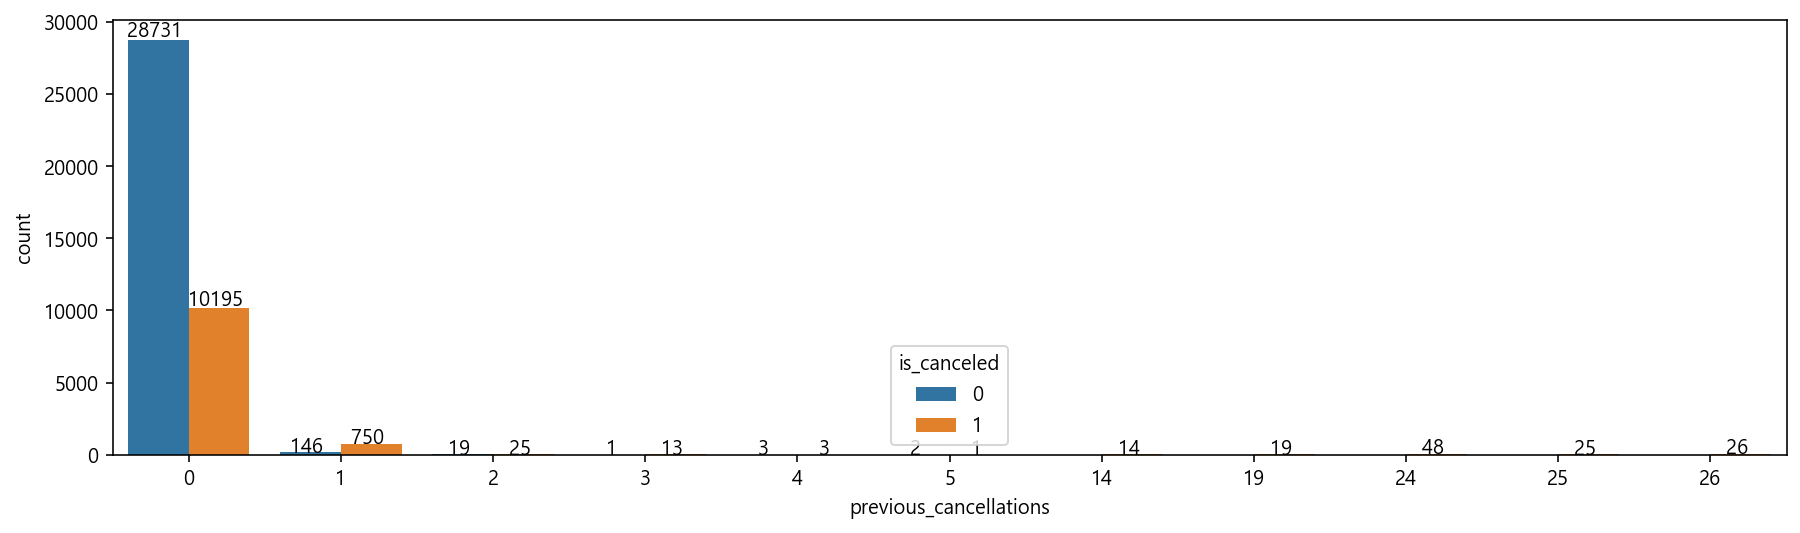

In [60]:
# hhh = hh.groupby('previous_cancellations')['is_canceled'].value_counts().unstack()
# hhh.plot(kind = 'bar')

plt.figure(figsize=(15,4))
ax = sns.countplot(data= hh, x= 'previous_cancellations', hue= 'is_canceled')
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.f "%(height), (left+width/2, height*1.01), ha='center')

plt.show()

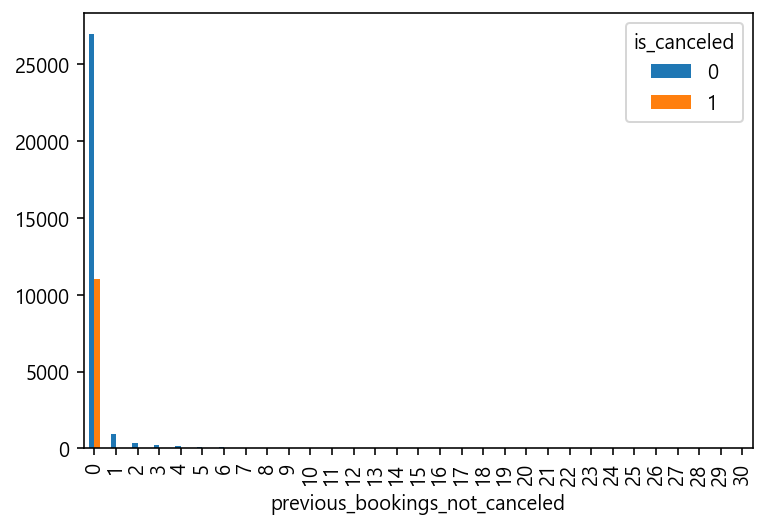

In [61]:
hhh = hh.groupby('previous_bookings_not_canceled')['is_canceled'].value_counts().unstack()
hhh.plot(kind = 'bar')

0
0
1
1
2
2


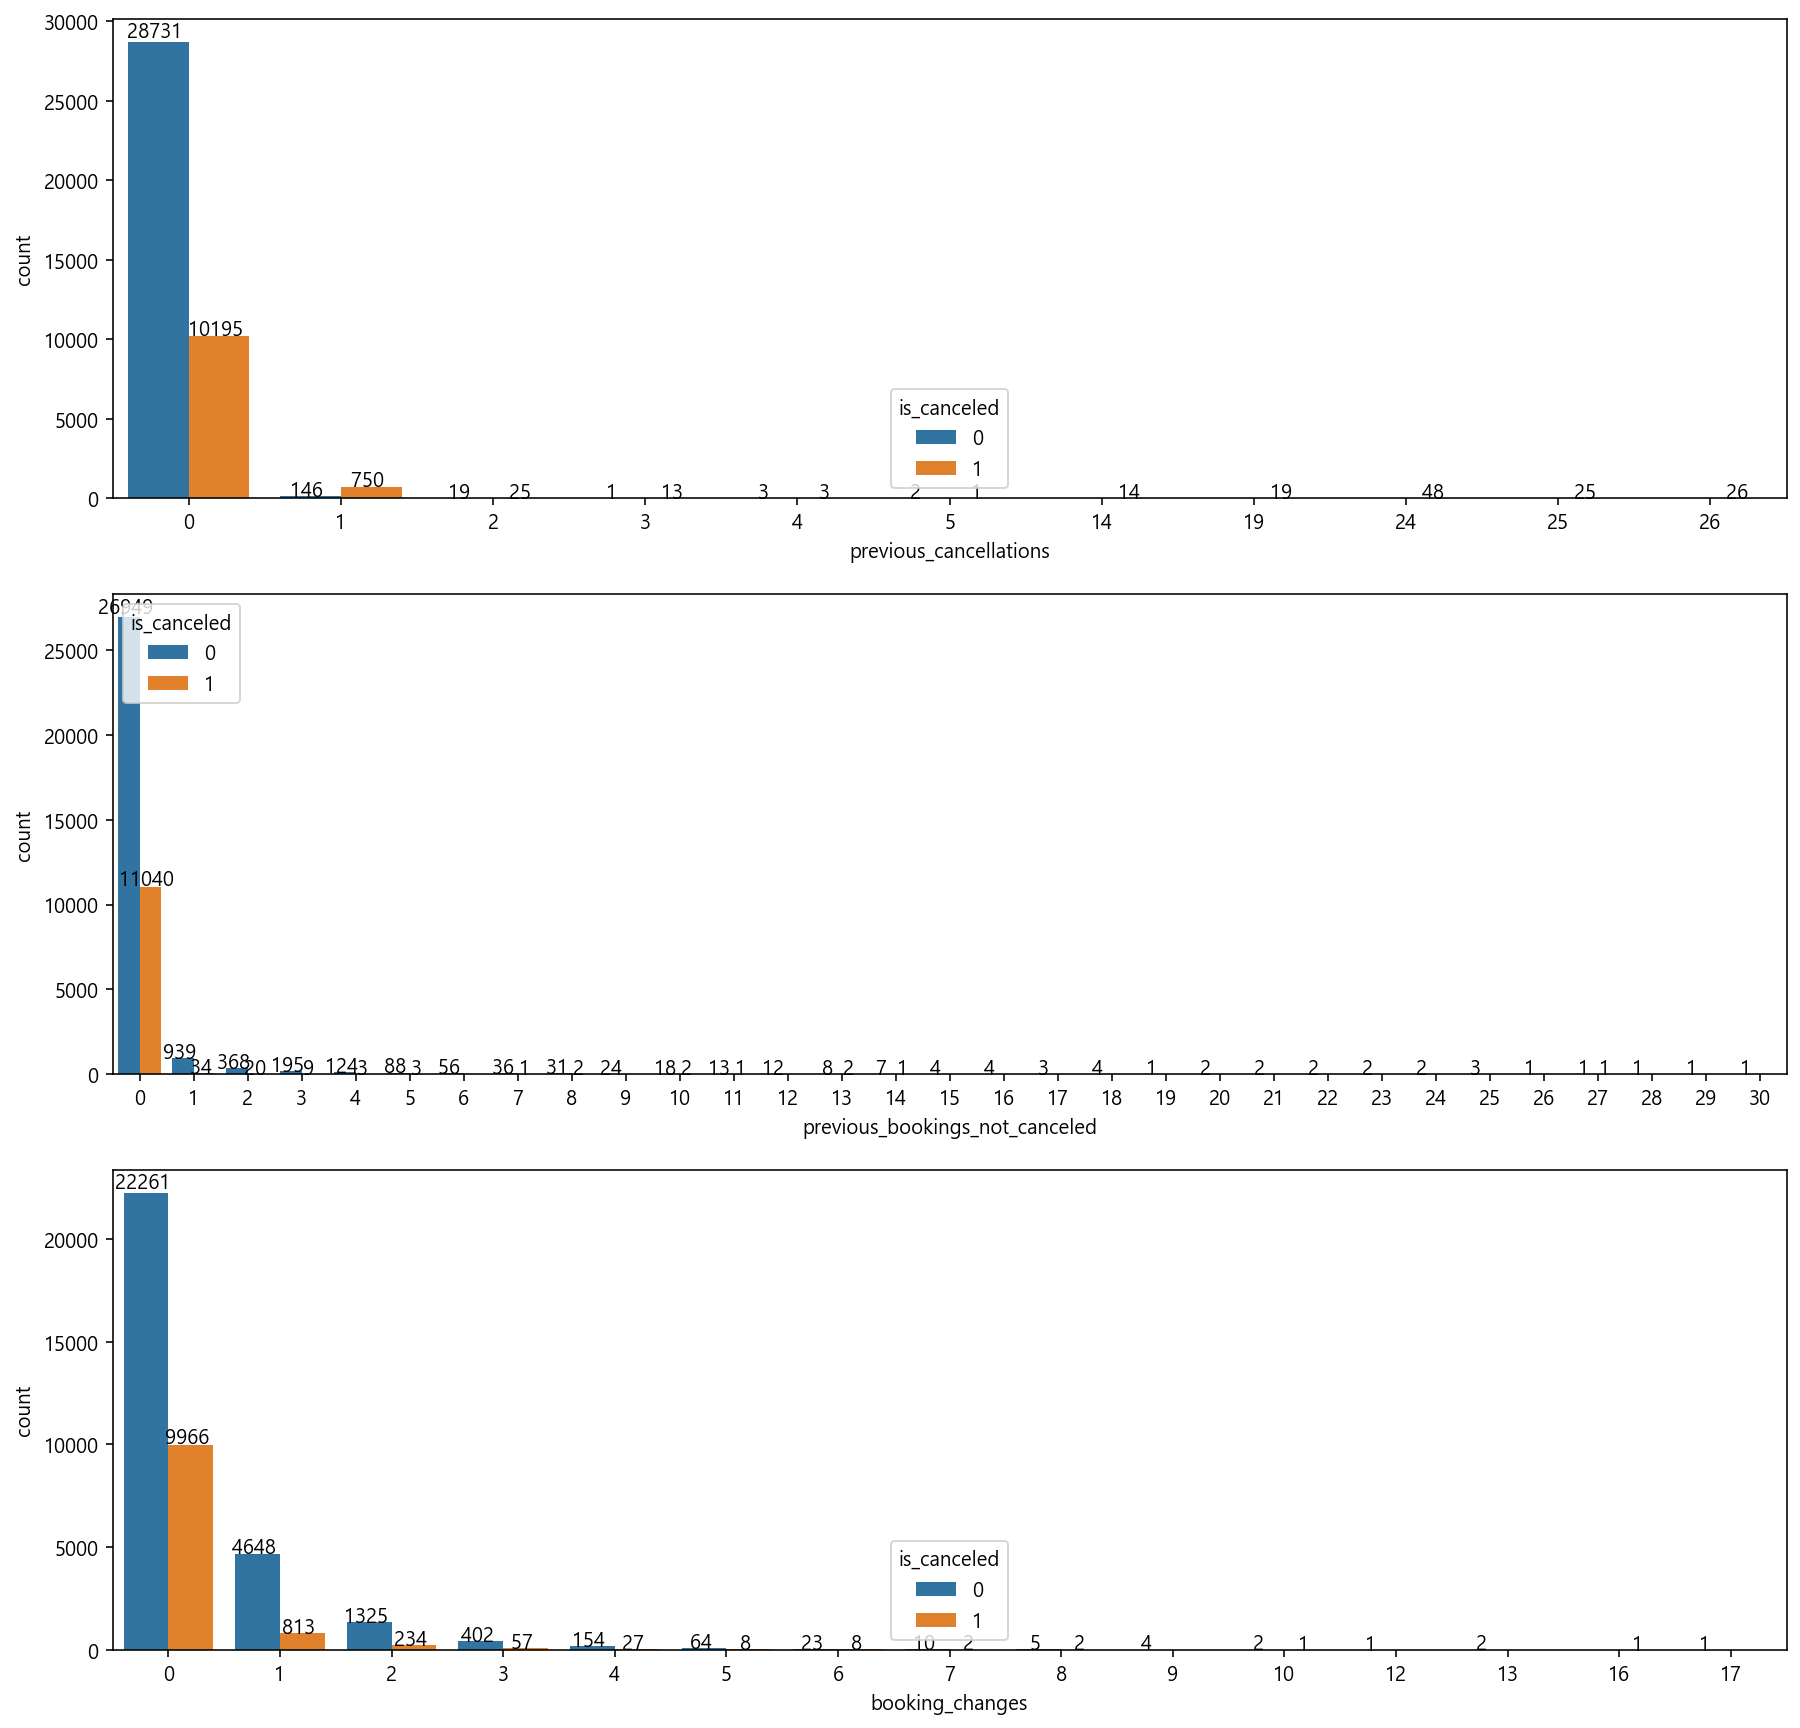

In [62]:
hh = df_Resort[['is_canceled', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']]
h1_m = df_Resort[['previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']].columns.tolist()

fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (20,5))
fig.set_size_inches(15,15)
for i, j in enumerate(h1_m):
    print(i)
    ax = sns.countplot(data= hh, x= j, hue= 'is_canceled', ax=axes[i])
    if i == i :
        print(i)
        for p in ax.patches: 
            left, bottom, width, height = p.get_bbox().bounds 
            ax.annotate("%.f "%(height), (left+width/2, height*1.01), ha='center')

plt.show()

In [63]:
# 가장 많이 취소한 고객은 누구?

In [64]:
hh = df_Resort[['is_canceled', 'reservation_status', 'reservation_status_date']]
hh.describe()

,is_canceled
count,40021.000000
mean,0.277829
std,0.447934
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


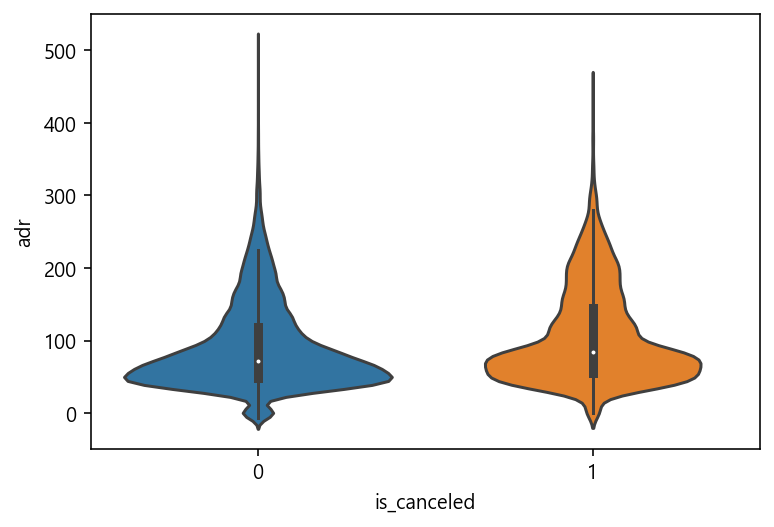

In [65]:
# 바이올린 플랏으로 그리기
hh = df_Resort[['is_canceled', 'adr']]

sns.violinplot(data= hh, x='is_canceled', y= 'adr')

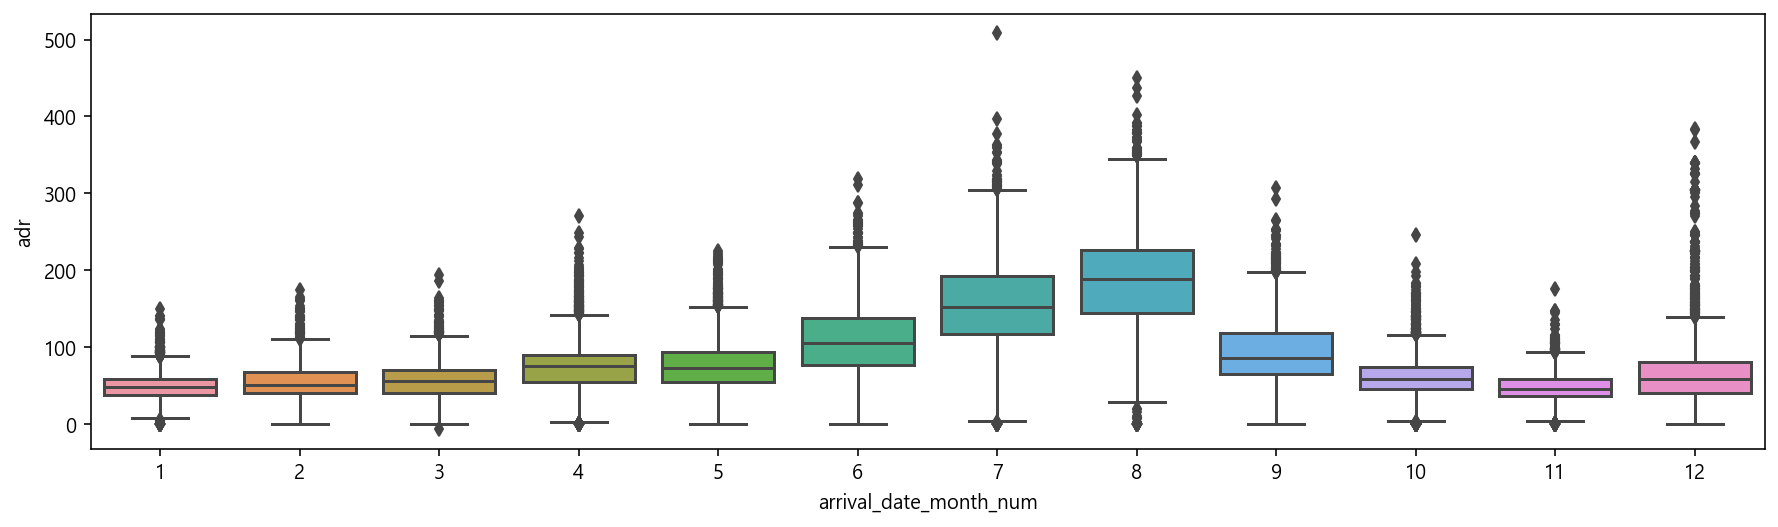

In [66]:
# 바이올린 플랏으로 그리기
hh = df_Resort[['is_canceled', 'arrival_date_month_num', 'adr']]
s = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.figure(figsize=(15,4))
sns.boxplot(data= hh, x= 'arrival_date_month_num', y= 'adr', order= s)

In [67]:
parking_spaces_Resort = list(df_Resort['required_car_parking_spaces'].unique())

In [68]:
for i in parking_spaces_Resort:
    globals()['df_Resort_Park{}'.format(i)] = df_Resort[df_Resort['required_car_parking_spaces']==i]
    print(i)

0
1
2
8
3


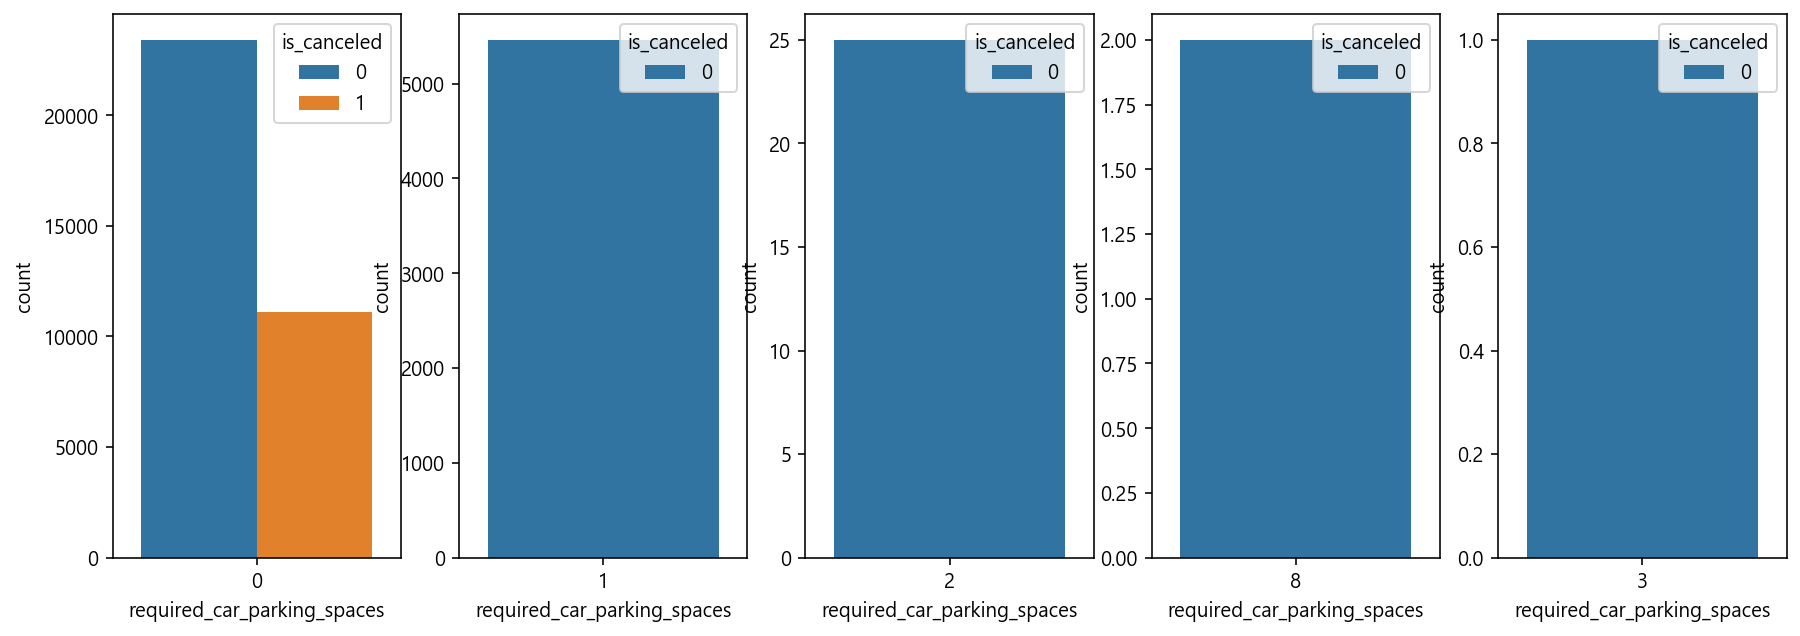

In [69]:
# 0일때만 취소가 확인할 수 있는걸 확인할 수 있습니다.
figure, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (20,5))
figure.set_size_inches(15,5)
for i,j in enumerate(parking_spaces_Resort):
     sns.countplot(data= globals()['df_Resort_Park{}'.format(j)] ,x='required_car_parking_spaces',hue='is_canceled',ax=axes[i])

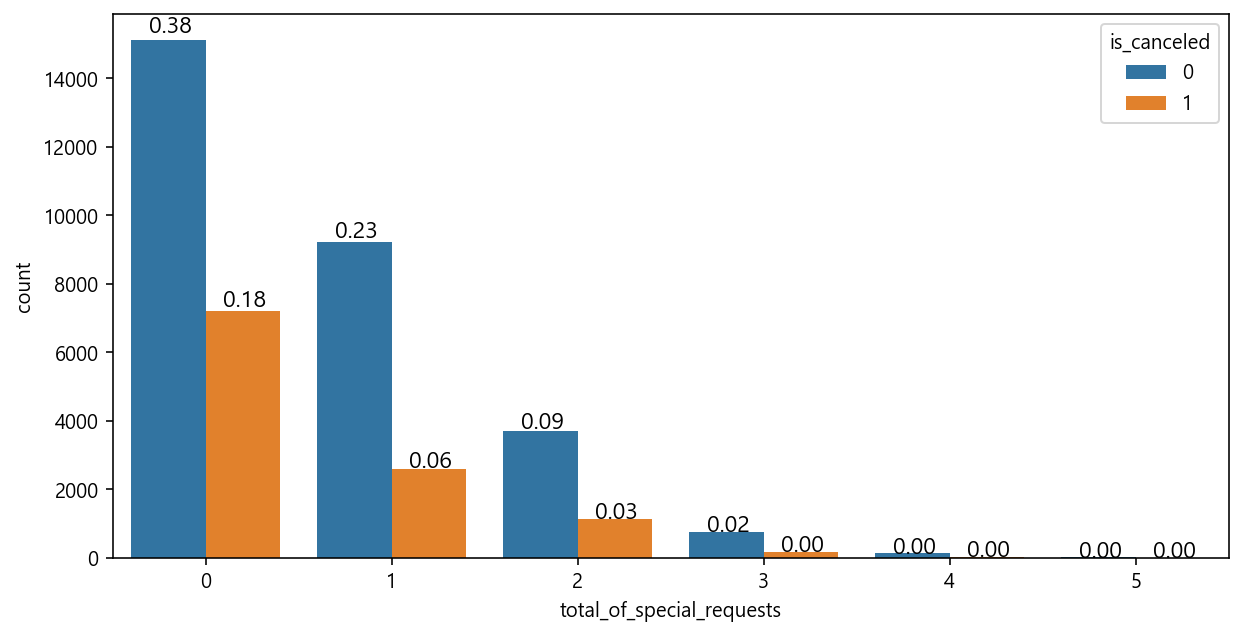

In [70]:
#대체로 취소율이 낮은것을 볼 수 있다.
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df_Resort, x= 'total_of_special_requests',hue='is_canceled')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f"%(height/df_Resort.shape[0]),(left+width/1.9, height*1.015), ha='center',size=11.5)


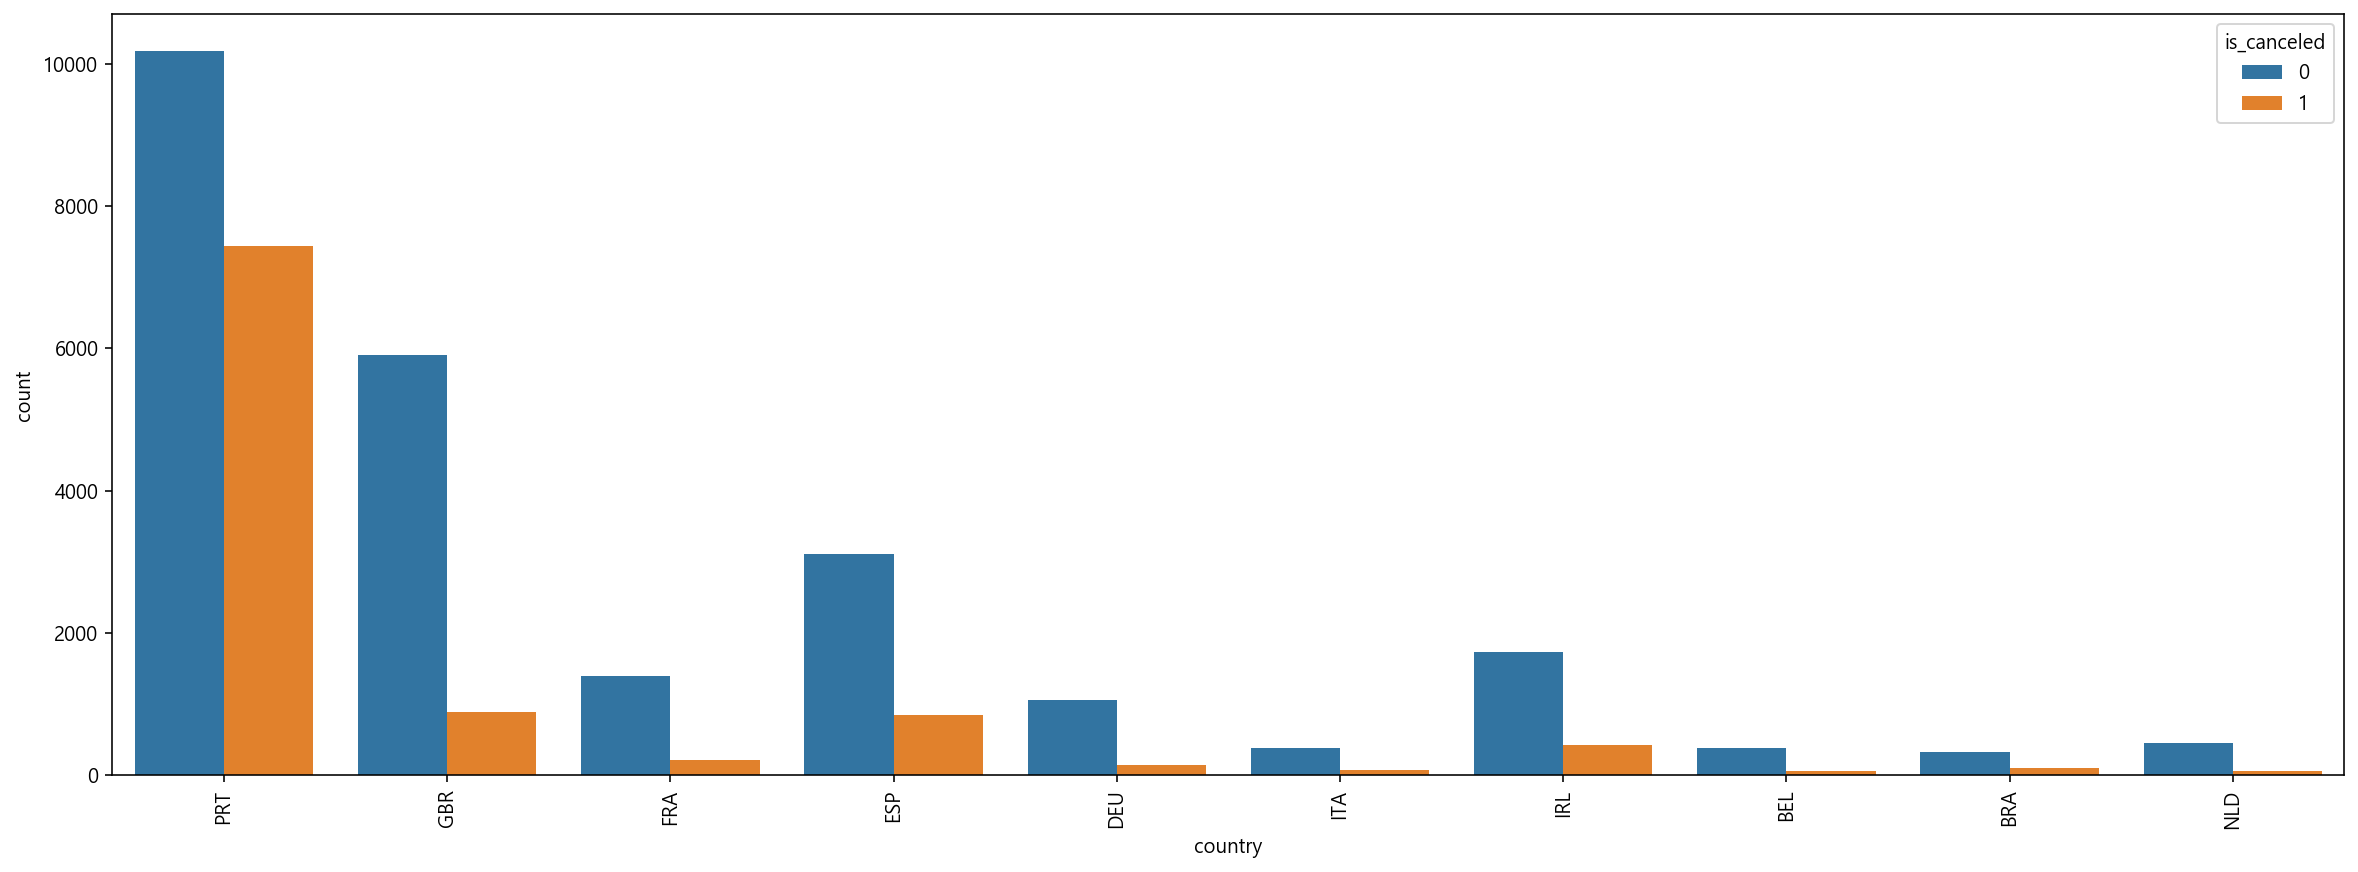

In [71]:
# country 나라별 취소 현황. 
# 포르투갈의 예약율이 가장 높고 취소율 또한 가장 높다. 자국 호텔이기 때문에 쉽게 예약과 취소를 하는 것으로 보인다.
plt.figure(figsize = (20,7))
plt.xticks(rotation=90)
sns.countplot(data=df_Resort, x = 'country', hue = 'is_canceled',order=df.country.value_counts(ascending=False).iloc[:10].index)

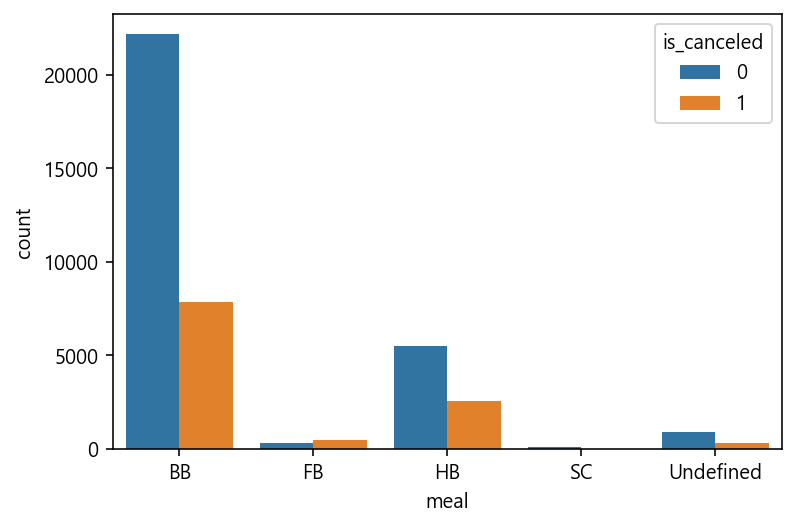

In [72]:
# resort hotel의 meal type에 따른 취소 현황 그래프
sns.countplot(data=df_Resort, x = 'meal', hue = 'is_canceled')

In [73]:
# meal type에 따른 취소율
s=df_Resort['meal']
t=df_Resort['is_canceled']
mealtype = ['BB','SC','HB','FB','Undefined']
for i in mealtype:
        p = s[(s==i)&(t==1)].count()/s[s==i].count()
        print(i,p)
        
# resort hotel의 경우, FB를 제외한 식사 조건에 따른 취소율이 30% 내외로 비슷했다. (이 때, SC와 Undefined는 같은 조건으로 본다.)
# 아침 점심 저녁을 다 신청하는 FB의 경우 취소율이 60% 가까우며, 체크인 비율보다 높은 것을 알 수 있다.

BB 0.26139128695710145
SC 0.013513513513513514
HB 0.31746229589928954
FB 0.5875331564986738
Undefined 0.2446535500427716


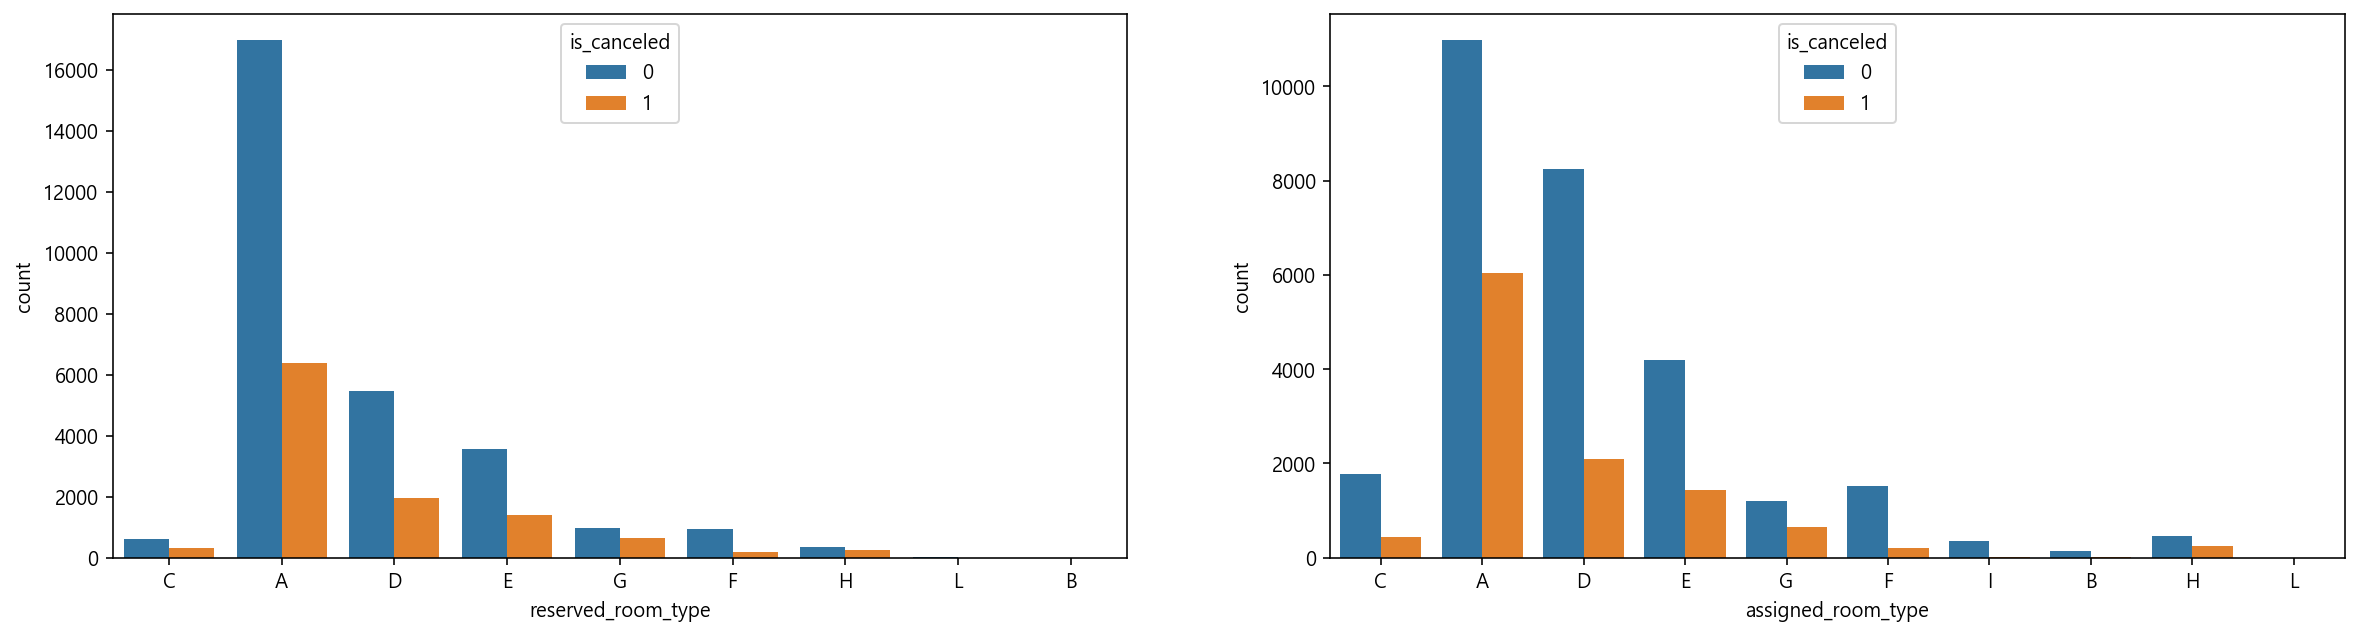

In [74]:
# room type에 따른 취소 현황 그래프
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5)) 
room_type = ['reserved_room_type','assigned_room_type']
for i, col_name in enumerate(room_type):
    col = i
    sns.countplot(data=df_Resort, x = col_name, hue = 'is_canceled', ax = axes[i])
    

# reserved room과 assigned room 모두 A,D,E 순으로 예약이 가장 많은것을 알 수 있다. 

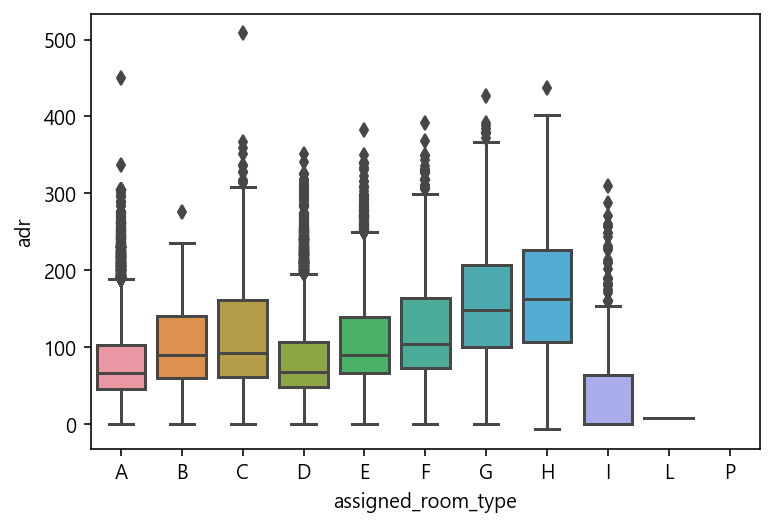

In [75]:
# room type 에 따른 adr 비교. adr은 실제 매출로 assigned room type을 기준으로 그린다.

sns.boxplot(data = df_Resort, x = 'assigned_room_type',y = 'adr',order=['A','B','C','D','E','F','G','H','I','L','P'])

# assigned_room_type 그래프를 통해 예약이 가장 많은 A, D, E 순으로 가격이 낮을것으로 예상했었다.
# 실제로 A,D,E의 가격대가 낮기는 하지만 예약율이 낮은 비슷한 가격대의 다른 룸타입도 있는것을 알 수 있다.
# 가격만이 룸 타입 선택의 기준이 되는 것은 아닌 것으로 판단된다.

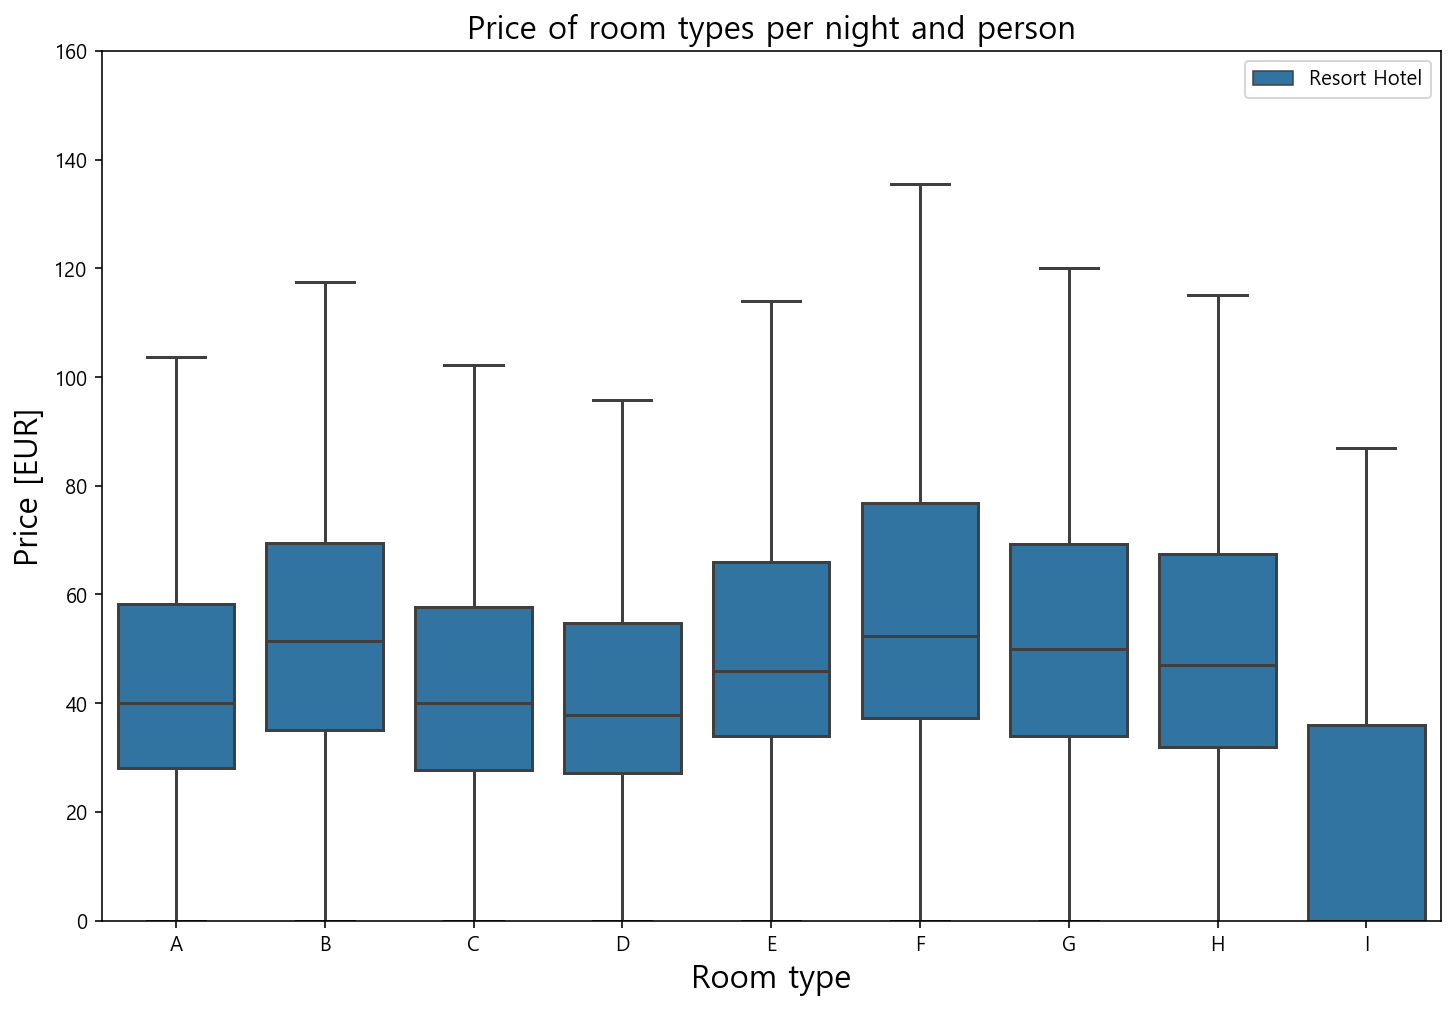

In [76]:
# 인당 하루 adr normalize price per night (adr):
df_Resort["adr_pp"] = df_Resort["adr"] / (df_Resort["adults"] + df_Resort["children"])
df_Resort2 = df_Resort.loc[df_Resort["is_canceled"] == 0] # 체크인 한 고객
room_prices = df_Resort2[["hotel", "assigned_room_type", "adr_pp"]].sort_values("assigned_room_type")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="assigned_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()


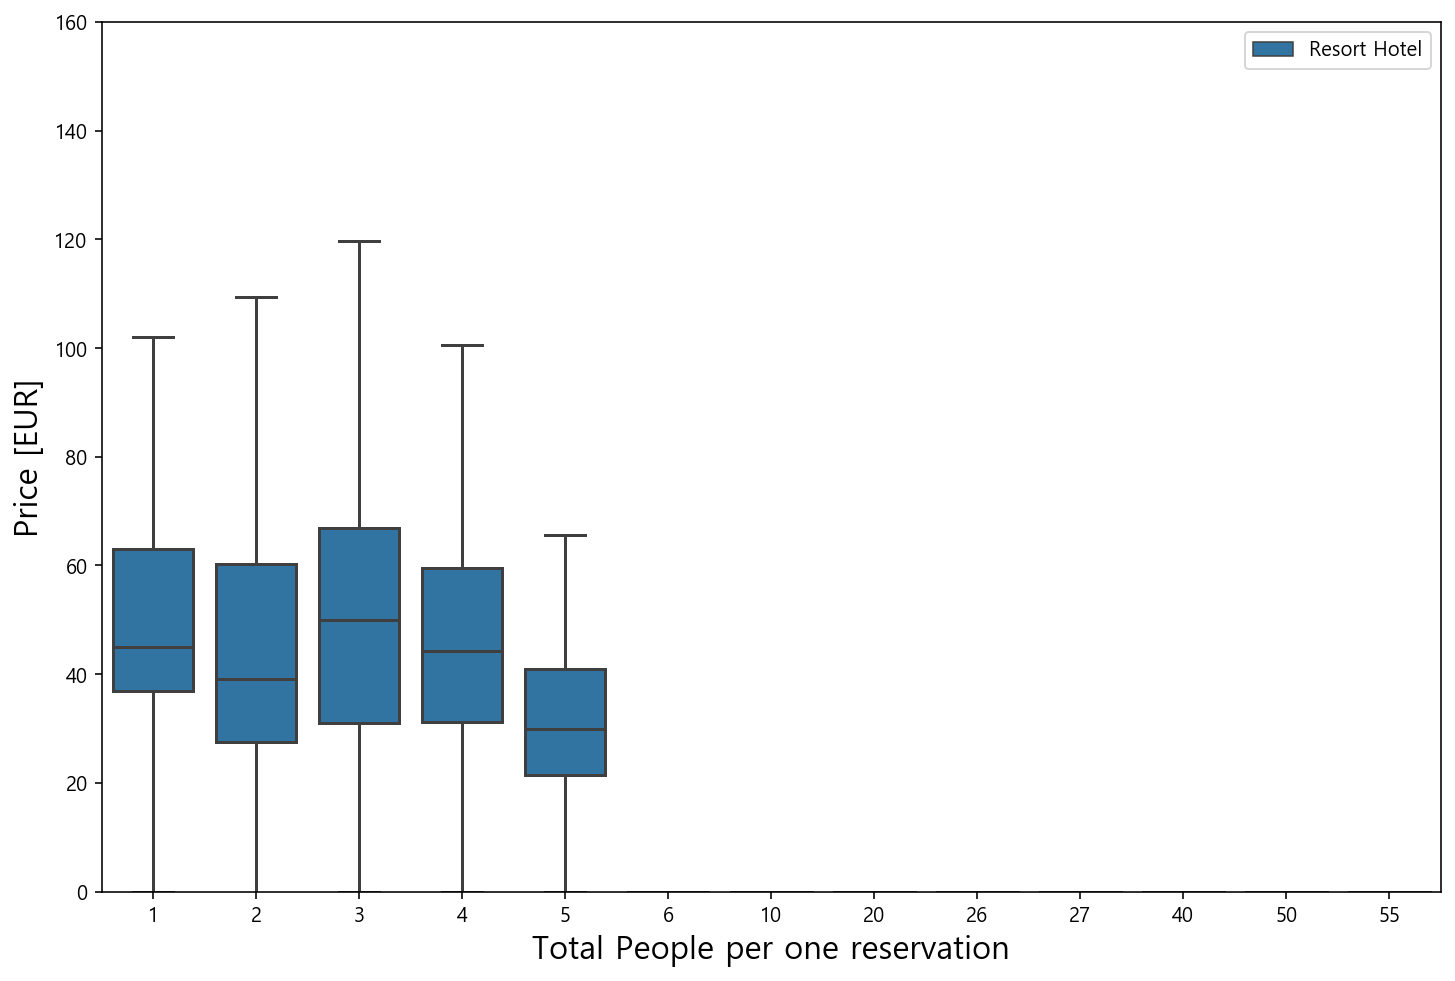

In [77]:
# 토탈 인원 수에 따른 adr
df_Resort['total_p'] = df_Resort["adults"] + df_Resort["children"]

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="total_p",
            y="adr_pp",
            hue="hotel",
            data=df_Resort, 
            fliersize=0)
plt.xlabel("Total People per one reservation", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()


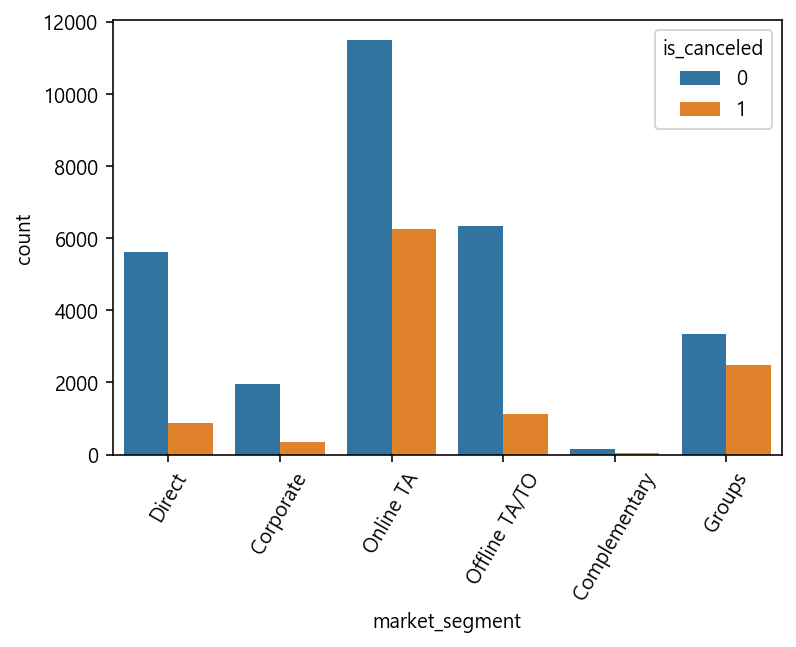

In [78]:
# market segment에 따른 취소 현황 그래프
plt.xticks(rotation = 60)
sns.countplot(data = df_Resort, x = 'market_segment' ,hue = 'is_canceled')

# Online TA, Groups로 예약한 경우의 취소율이 상대적으로 높아보인다.

In [79]:
# 취소율 확인
y=df_Resort['market_segment']
x=df_Resort['is_canceled']
dc = ['Direct','Corporate','Online TA','Offline TA/TO','Complementary','Groups']
for i in dc:
        p = y[(y==i)&(x==1)].count()/y[y==i].count()
        print(i,p)

# Complementary = 고객 이벤트룸. 무료.
# 대부분 15% 내외이나 Online TA는 35%, Groups예약의 취소율은 42%로 높은 취소율을 보인다.
# Online 예약의 경우 취소가 좀 더 쉽고, 
# 그룹예약은 한 번 취소하면 여러개가 한번에 취소되기 때문에 높은 취소율을 나타낸 것으로 판단된다.

Direct 0.13491087891825446
Corporate 0.15227765726681128
Online TA 0.3524169439900728
Offline TA/TO 0.15196144062123443
Complementary 0.16417910447761194
Groups 0.4258908590118781


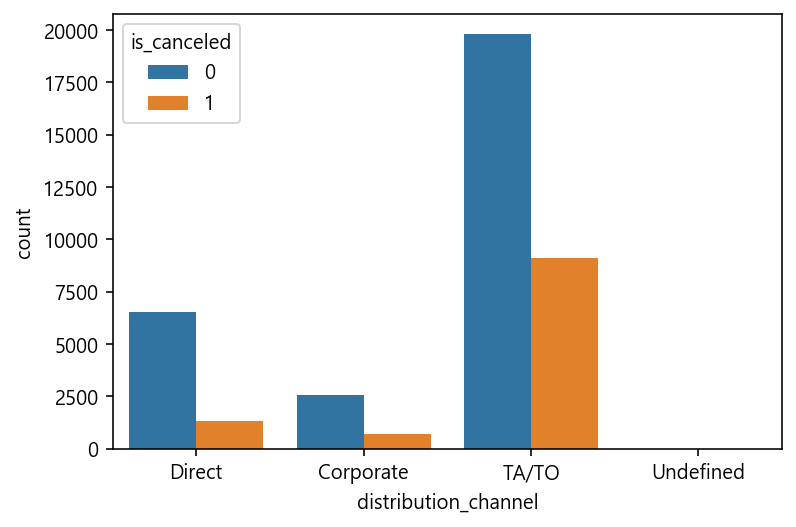

In [80]:
# distribution_channel에 따른 취소 현황 그래프
sns.countplot(data = df_Resort, x = 'distribution_channel' ,hue = 'is_canceled')

In [81]:
# 취소율 확인
y=df_Resort['distribution_channel']
x=df_Resort['is_canceled']
dc = ['TA/TO','Direct','Undefined','Corporate','GDS']
for i in dc:
        p = y[(y==i)&(x==1)].count()/y[y==i].count()
        print(i,p)

# 비율을 살펴보면, 다른 채널을 통해 예약한 고객들의 취소율은 20% 내외이지만, TA/TO를 통해 예약한 고객의 취소율은 45%에 달한다.
# Undefined의 경우 값이 없어서 1로 나옴
# 여러 호텔을 비교할 수 있는 사이트를 통해 예약한 고객들은 취소 후 다른 좋은 조건의 호텔로 예약할 수 있다고 판단된다.

TA/TO 0.3151410278594913
Direct 0.16857506361323155
Undefined 0.0
Corporate 0.2107197549770291
GDS nan


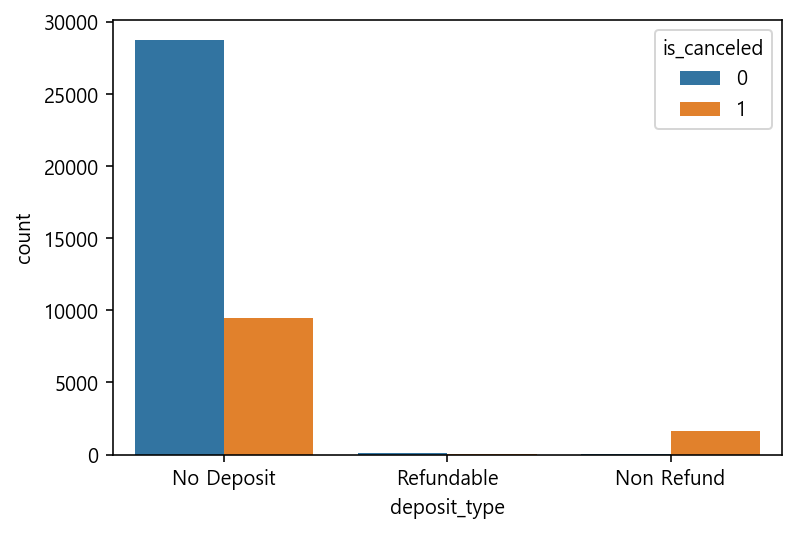

In [82]:
# deposit_type에 따른 취소 현황 그래프
sns.countplot(data = df_Resort, x = 'deposit_type' ,hue = 'is_canceled')

# deposit_type 컬럼의 경우 Non Refund 조건이지만 취소된 경우가 있는데,
# 예약자의 사정으로 못 오게 된 경우와 실수로 예약을 눌러 취소를 못 한 경우가 있을 수 있다.
# 환불 불가 조건인데 취소가 되었다는 부분에서 모순으로 보일 수 있지만,
# 해당 데이터에는 노쇼 고객은 따로 표시되지 않고 체크인한 고객과 취소한 고객으로만 나뉘어져 있기 때문에
# 고객이 오지 않은 경우도 취소된 예약으로 표시된 것으로 보인다.
# 또 예약 고객들이 온라인으로 예약을 했기 때문에 환불은 안되었는데 취소는 되었을 수 있다.

#### City Hotel

In [83]:
df_City.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_num,arrival_date,arrival_day_of_week
0,City Hotel,0,6,2015,July,27,1,0,2,1,0,0,HB,PRT,Offline TA/TO,TA/TO,...,0,A,A,0,No Deposit,6.0,0,Transient,0.0,0,0,Check-Out,2015-07-03,7,2015-07-01,2
1,City Hotel,1,88,2015,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,...,0,A,A,0,No Deposit,9.0,0,Transient,76.5,0,1,Canceled,2015-07-01,7,2015-07-01,2
2,City Hotel,1,65,2015,July,27,1,0,4,1,0,0,BB,PRT,Online TA,TA/TO,...,0,A,A,0,No Deposit,9.0,0,Transient,68.0,0,1,Canceled,2015-04-30,7,2015-07-01,2
3,City Hotel,1,92,2015,July,27,1,2,4,2,0,0,BB,PRT,Online TA,TA/TO,...,0,A,A,0,No Deposit,9.0,0,Transient,76.5,0,2,Canceled,2015-06-23,7,2015-07-01,2
4,City Hotel,1,100,2015,July,27,2,0,2,2,0,0,BB,PRT,Online TA,TA/TO,...,0,A,A,0,No Deposit,9.0,0,Transient,76.5,0,1,Canceled,2015-04-02,7,2015-07-02,3


In [84]:
df_City.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date_month_num,arrival_day_of_week
count,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000
mean,0.417270,109.735724,2016.174285,27.177449,15.786625,0.795185,2.182957,1.850977,0.091365,0.004941,0.025615,0.079743,0.132371,0.187369,25.260003,3.226774,105.304465,0.024367,0.546918,6.556473,2.981987
std,0.493111,110.948526,0.699181,13.398523,8.728451,0.885026,1.456416,0.509292,0.372168,0.084323,0.157983,0.415472,1.693411,0.608620,54.139157,20.870890,43.602954,0.154919,0.780776,3.042898,1.927708
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,23.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,79.200000,0.000000,0.000000,4.000000,1.000000
50%,0.000000,74.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,99.900000,0.000000,0.000000,7.000000,3.000000
75%,1.000000,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,126.000000,0.000000,1.000000,9.000000,5.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,10.000000,1.000000,21.000000,72.000000,21.000000,509.000000,391.000000,5400.000000,3.000000,5.000000,12.000000,6.000000


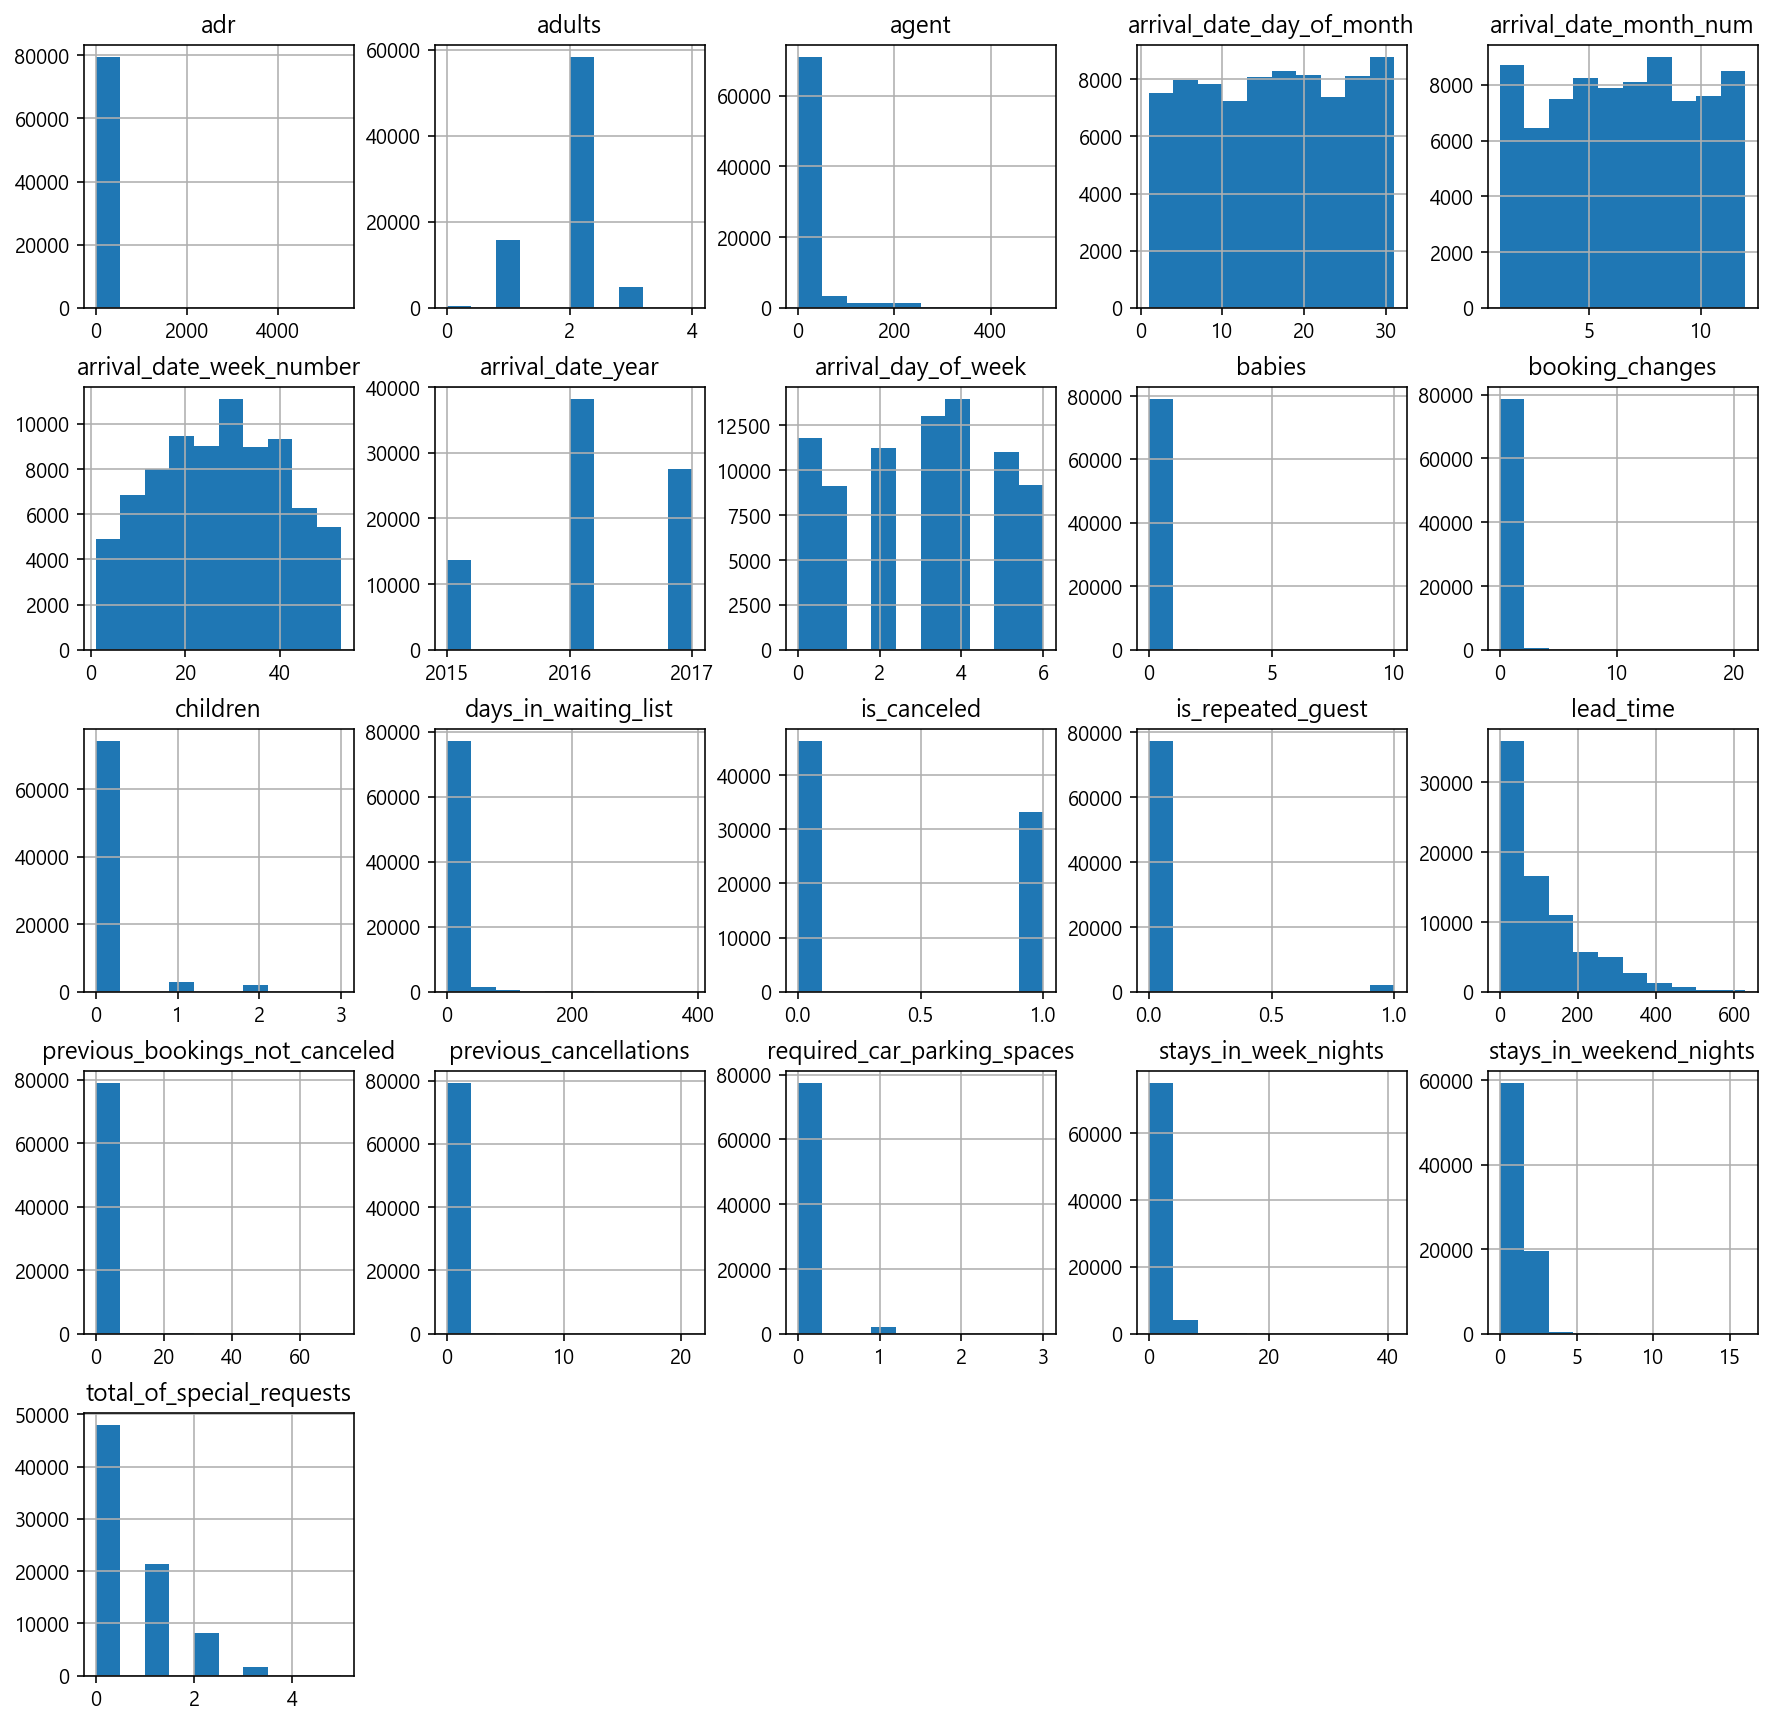

In [85]:
h = df_City.hist(figsize=(15,15))

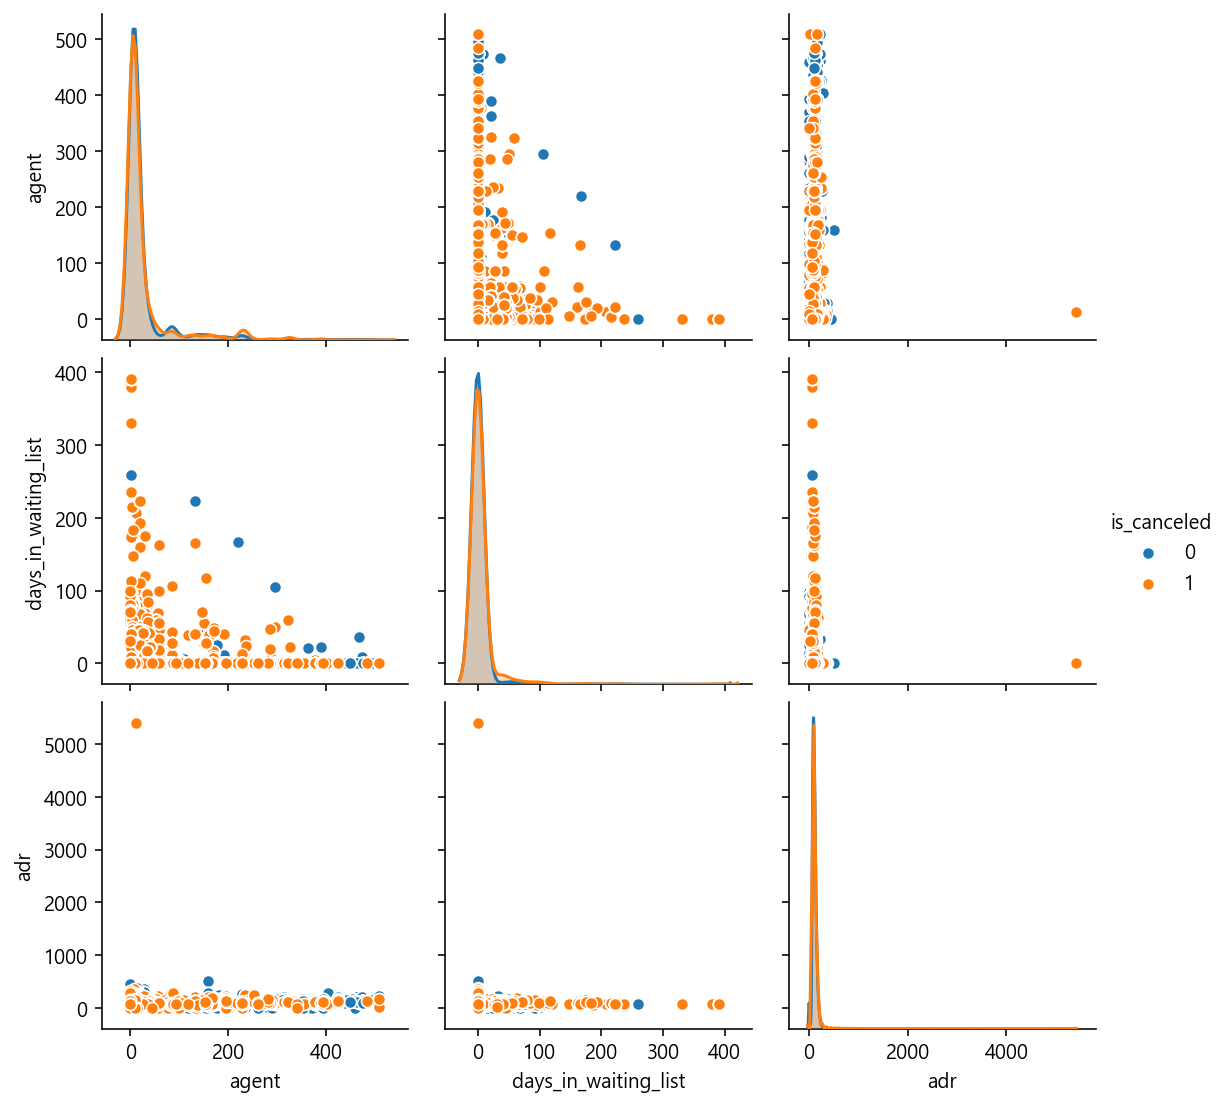

In [86]:
sns.pairplot(df_City[['agent','days_in_waiting_list','adr','is_canceled']],hue='is_canceled',diag_kws={'bw':10})

시티 호텔의 예약 취소 비중이 리조트 호텔에 비해 높은 40%대인 것을 확인할 수 있습니다.

In [87]:
df_Resort['is_canceled'].value_counts()

0    28902
1    11119
Name: is_canceled, dtype: int64

In [88]:
df_City['is_canceled'].value_counts()

0    46228
1    33102
Name: is_canceled, dtype: int64

##### 시간과 관련된 컬럼 살펴보기

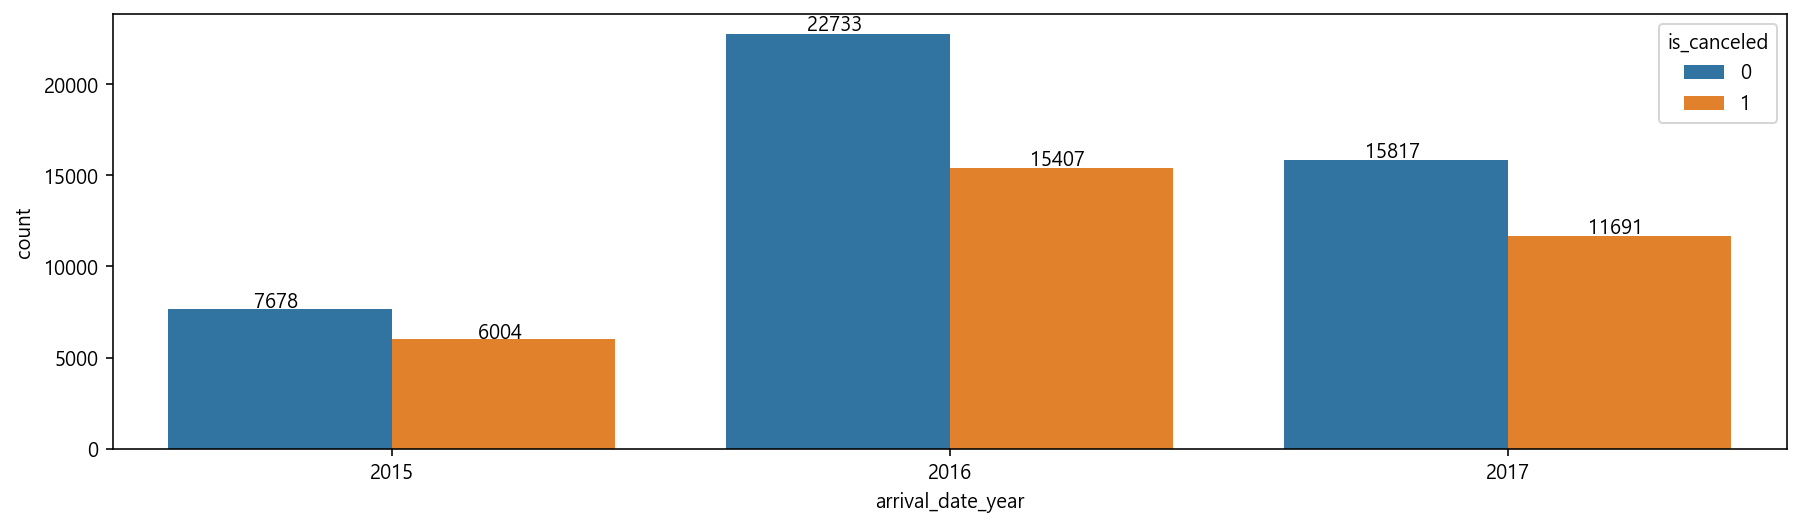

In [89]:
# 연도별 예약 및 취소 수
hh = df_City[['is_canceled', 'arrival_date_year']]

plt.figure(figsize=(15,4))
ax = sns.countplot(data= hh, x= 'arrival_date_year', hue= 'is_canceled')
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.f "%(height), (left+width/2, height*1.01), ha='center')

plt.show()

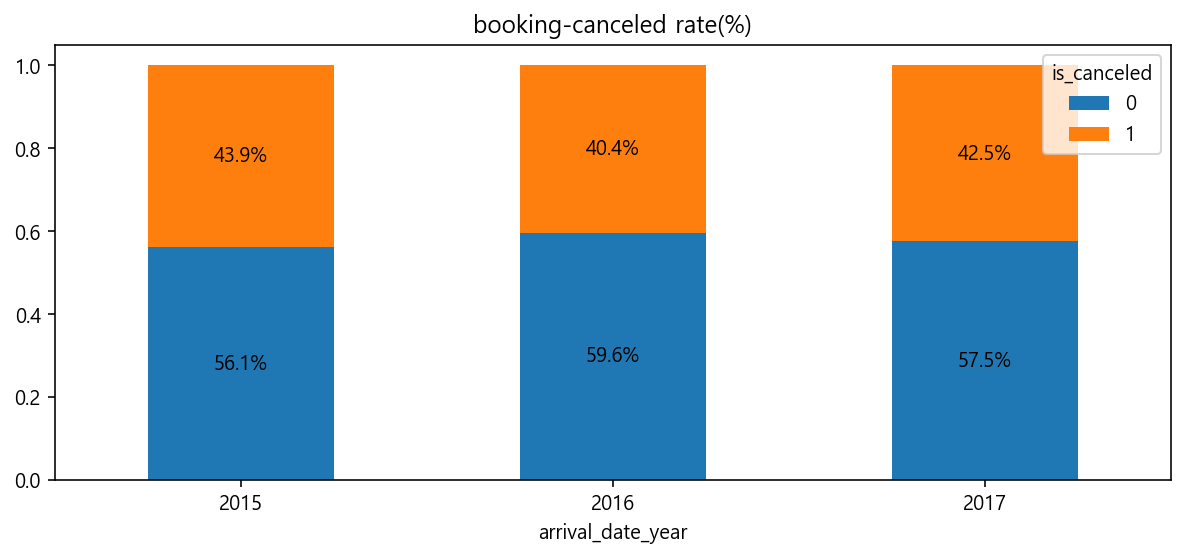

In [90]:
# 연도별 예약 및 취소 비중
hhh = hh.groupby('arrival_date_year')['is_canceled'].value_counts(normalize=True).unstack()

ax = hhh.plot(kind='bar', stacked=True, title="booking-canceled rate(%)", rot=0, figsize=(10,4)) 

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.1f%%"%(height*100), xy=(left+width/2, bottom+height/2), ha='center', va='center') 

plt.show()

arrival_date_week_number 컬럼과 arrival_date_month_num 와 비슷한 성격으로 예상되어   
arrival_date_month_num을 사용한 그래프를 생성합니다.

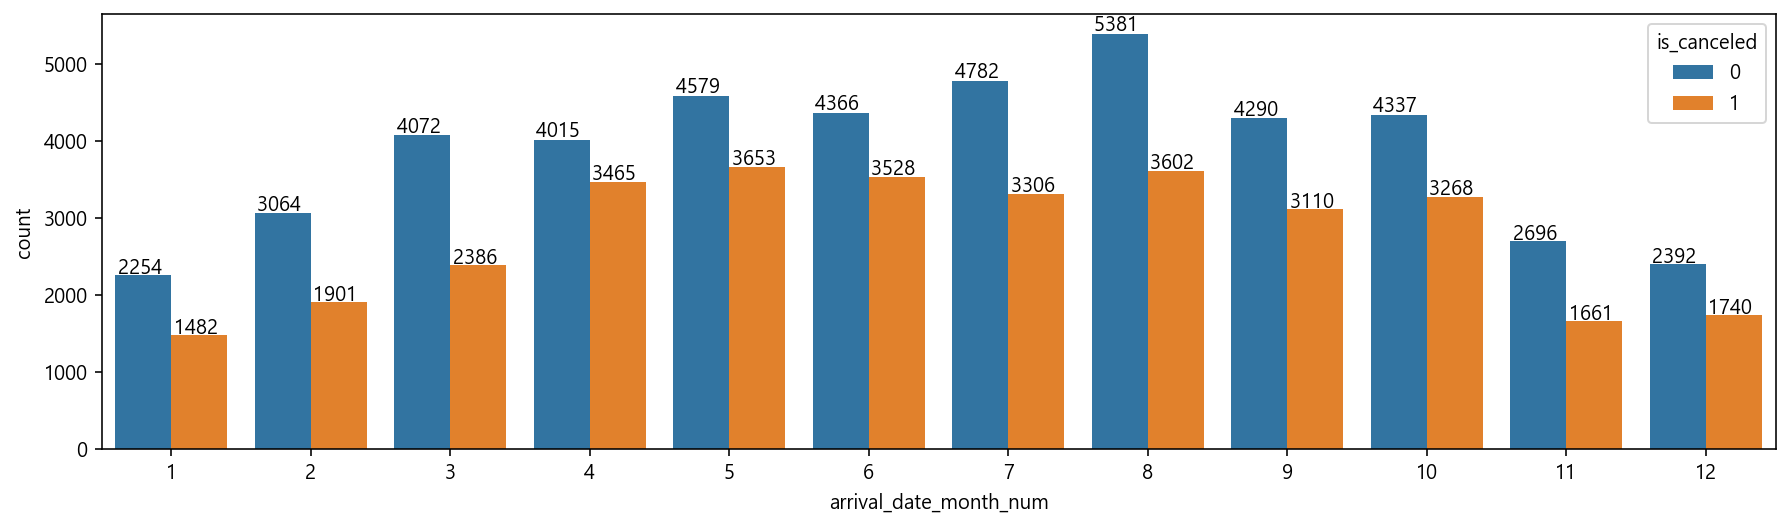

In [91]:
# 월별 예약 및 취소 수
hh = df_City[['is_canceled', 'arrival_date_year', 'arrival_date_month_num']]
s = [1,2,3,4,5,6,7,8,9,10,11,12]
# hh['arrival_date_year_month'] = h1['arrival_date_year'] + '-' + h1['arrival_date_month_num']

plt.figure(figsize=(15,4))
ax = sns.countplot(data= hh, x= 'arrival_date_month_num', hue= 'is_canceled', order= s)
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.f "%(height), (left+width/2, height*1.01), ha='center')

plt.show()

1월이 예약 취소 비중이 가장 낮고 8월이 예약 취소 비중이 높습니다.

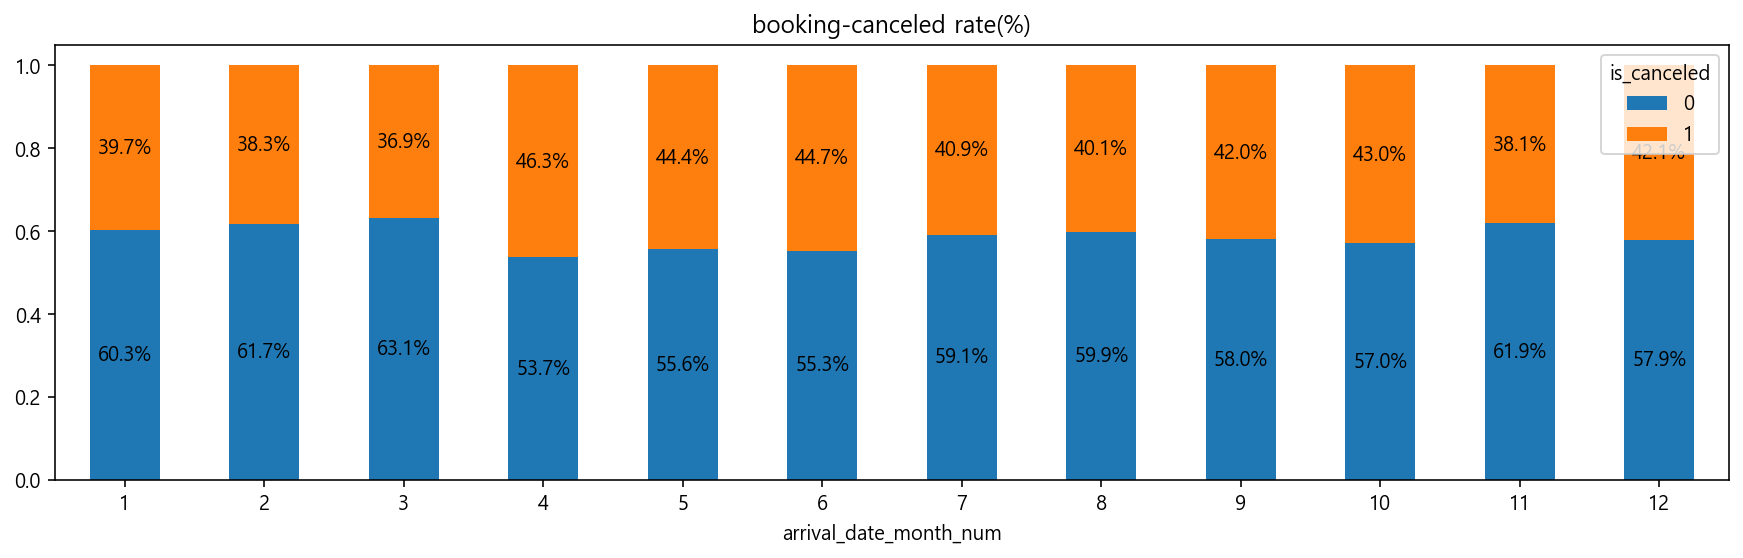

In [92]:
# 월별 예약 및 취소 비중
hhh = hh.groupby('arrival_date_month_num')['is_canceled'].value_counts(normalize=True).unstack()

ax = hhh.plot(kind='bar', stacked=True, title="booking-canceled rate(%)", rot=0, figsize=(15,4)) 

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.1f%%"%(height*100), xy=(left+width/2, bottom+height/2), ha='center', va='center') 

plt.show()

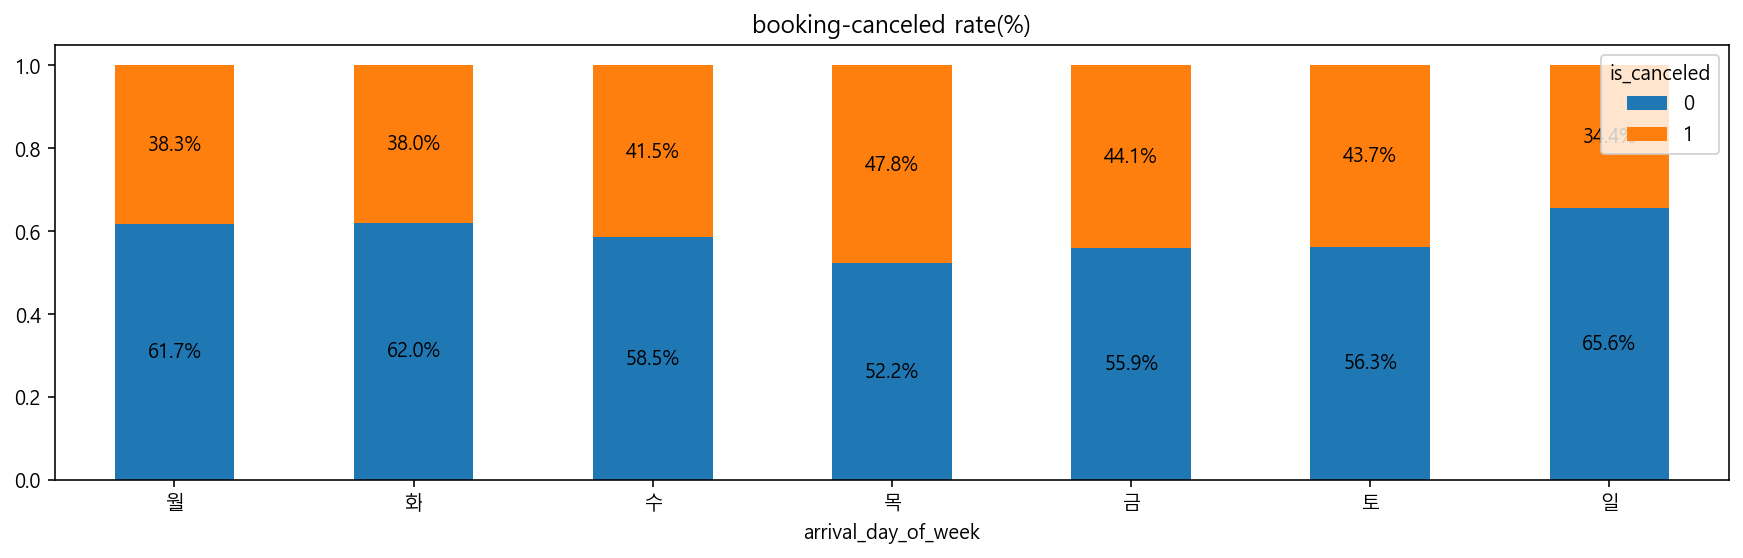

In [161]:
# City호텔은 목,금요일이 취소율이 높아 보입니다.
hhh = df_City.groupby('arrival_day_of_week')['is_canceled'].value_counts(normalize=True).unstack()

g = hhh.plot(kind='bar', stacked=True, title="booking-canceled rate(%)", rot=0, figsize=(15,4)) 
g.set(xticklabels=['월','화','수','목','금','토','일'])

for p in g.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    g.annotate("%.1f%%"%(height*100), xy=(left+width/2, bottom+height/2), ha='center', va='center') 

In [94]:
hh = df_City[['is_canceled', 'lead_time', 'days_in_waiting_list']]
hh.describe()

,is_canceled,lead_time,days_in_waiting_list
count,79330.000000,79330.000000,79330.000000
mean,0.417270,109.735724,3.226774
std,0.493111,110.948526,20.870890
min,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000
50%,0.000000,74.000000,0.000000
75%,1.000000,163.000000,0.000000
max,1.000000,629.000000,391.000000


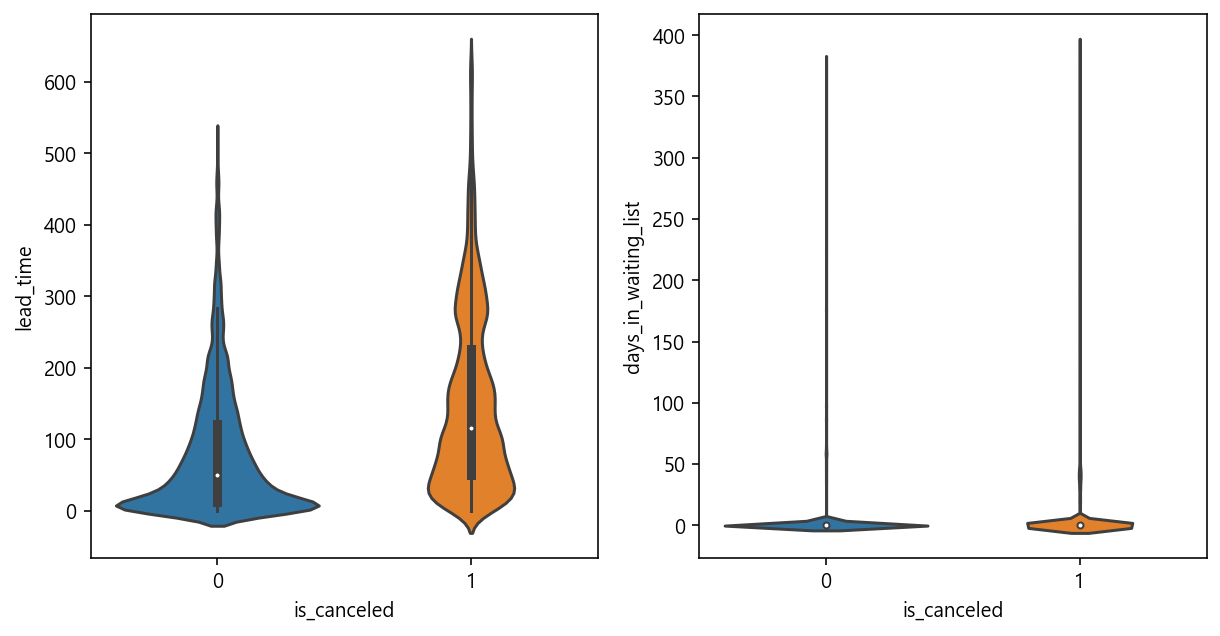

In [95]:
# 대기에 따른 예약, 취소 그래프

h1_m = df_City[['lead_time', 'days_in_waiting_list']].columns.tolist()

fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(10,5)
for i, j in enumerate(h1_m):
     sns.violinplot(data= hh, x='is_canceled', y= j, ax=axes[i])

In [96]:
#Resort와 마찬가지로 540인 이상인 값을 제거합니다.
df_City.loc[df_City['lead_time'] >= 540, 'lead_time'].count() / df_City['lead_time'].count()

0.0035421656372116475

In [97]:
df_City = df_City[df_City['lead_time']<=540]

In [98]:
df_City_1 = df_City[df_City['is_canceled'].apply(length)]
df_City_0 = df_City[df_City['is_canceled'].apply(length_2)]

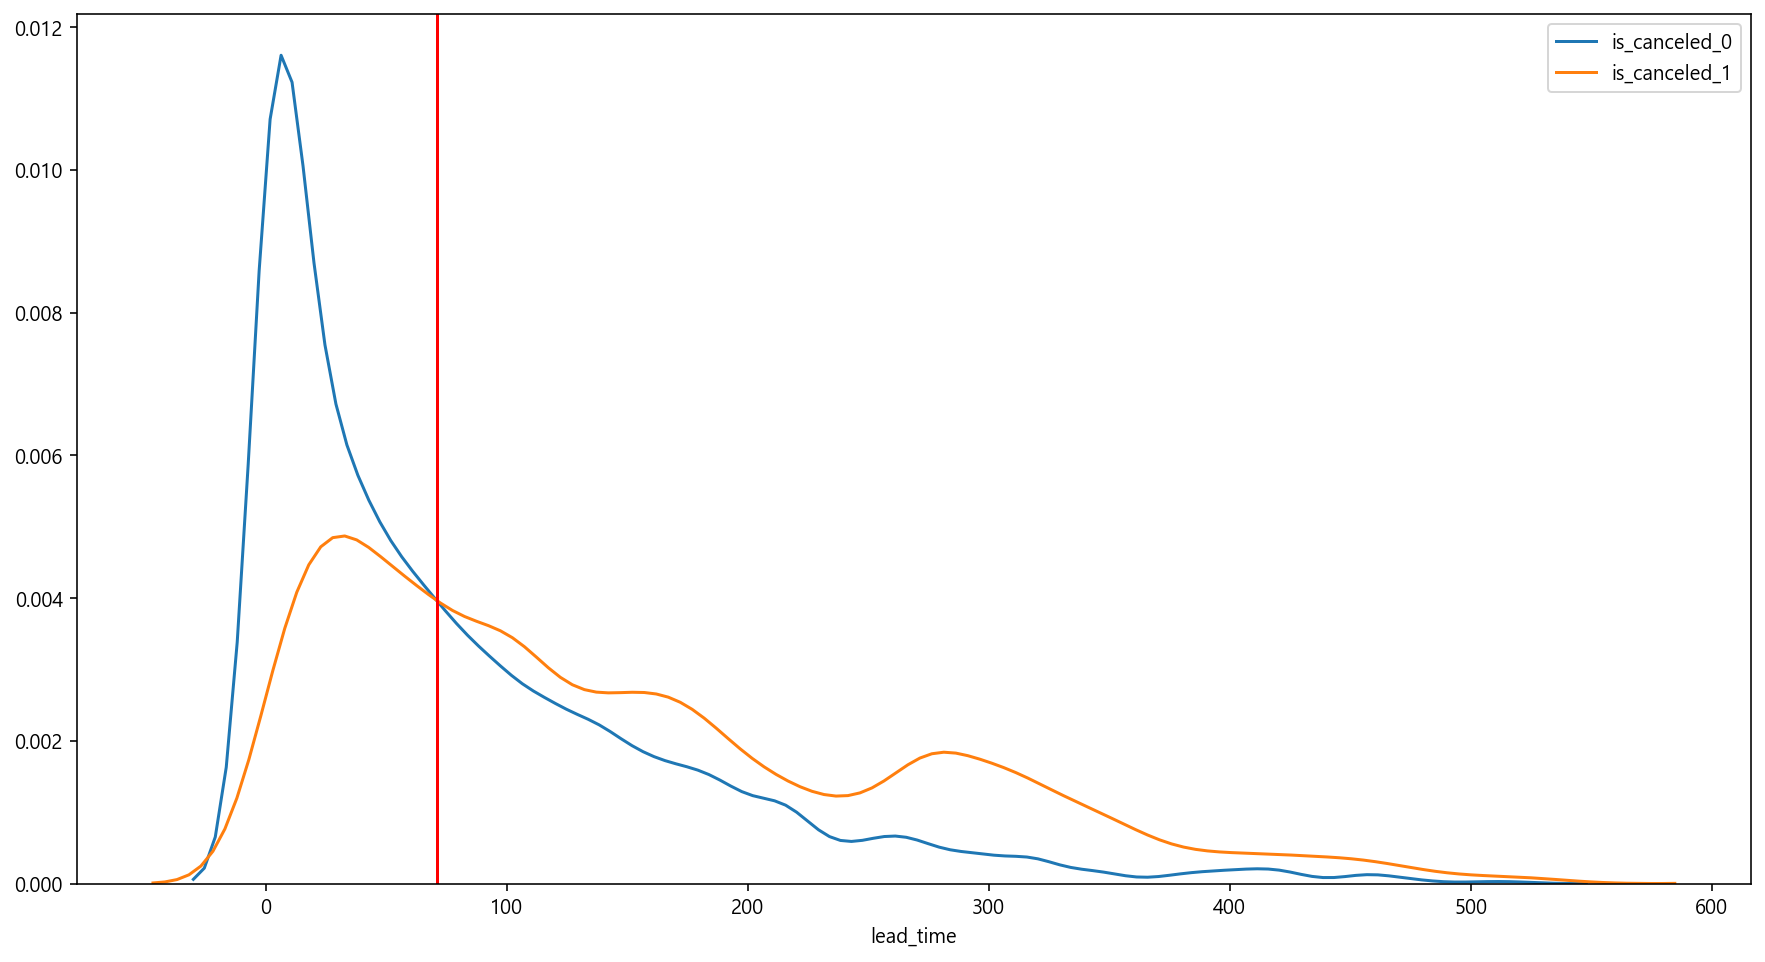

In [99]:
# lead_time이 70이전에는 취소율이 낮지만 그 이후로는 올라가는 것을 볼 수 있다.
plt.figure(figsize=(15,8))
ax_1 = sns.distplot(df_City_0['lead_time'],label='is_canceled_0',hist=False)
ax_2 = sns.distplot(df_City_1['lead_time'],hist=False,label='is_canceled_1')
plt.axvline(x=71,color='red')

In [100]:
# days_in_waiting_list 약 95%가 0이므로 이 칼럼은 사용하지 않기로 합니다.
hh.loc[hh['days_in_waiting_list'] == 0, 'days_in_waiting_list'].count() / hh['days_in_waiting_list'].count()

0.9565990167654103

In [101]:
del df_City['days_in_waiting_list'] 

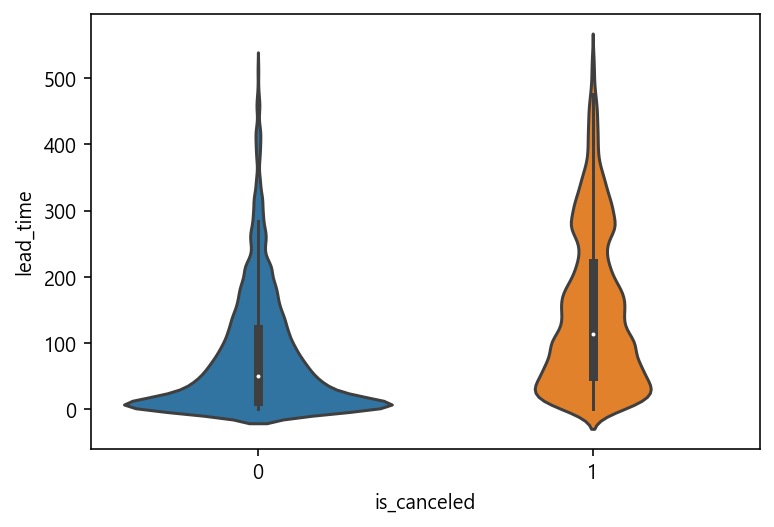

In [102]:
# 대기에 따른 예약, 취소 그래프
hh = df_City[['is_canceled', 'lead_time']]

sns.violinplot(data= hh, x='is_canceled', y= 'lead_time')

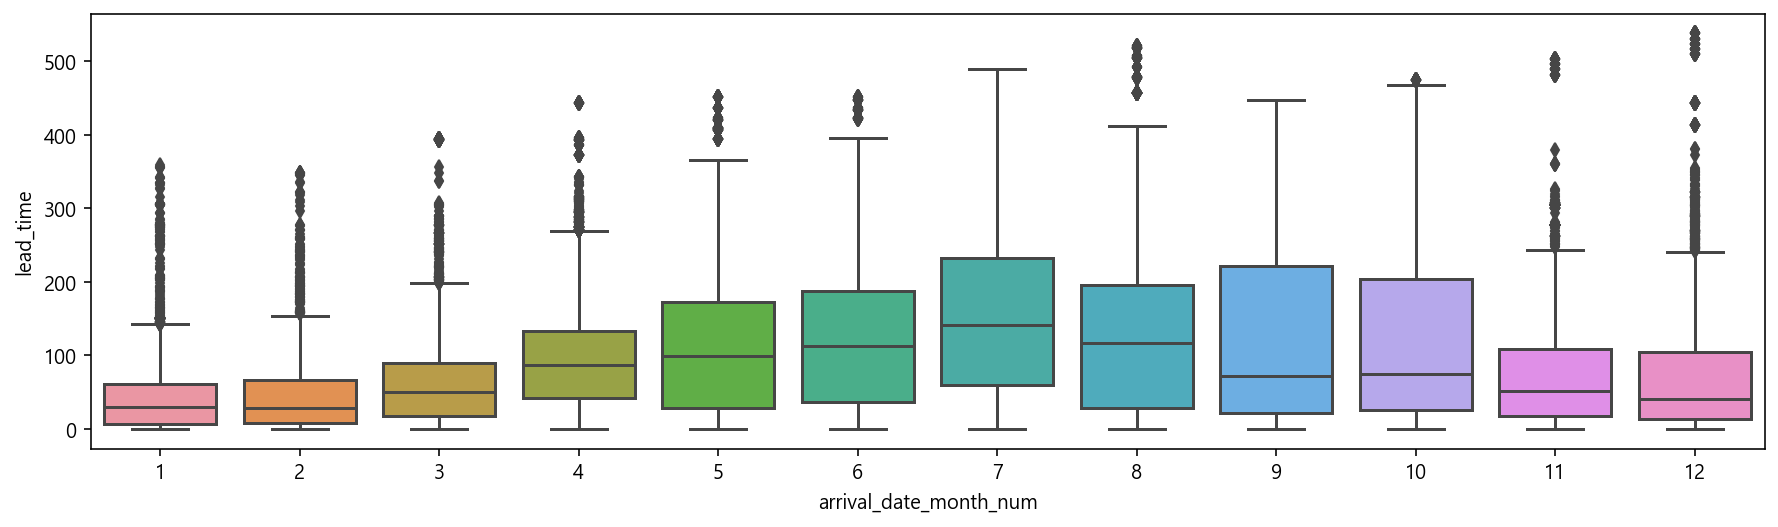

In [103]:
# 성수기인 8월에 예약하려면 얼마나 기다려야할까?
hh = df_City[['arrival_date_month_num', 'lead_time']]
s = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.figure(figsize=(15,4))
sns.boxplot(data= hh, x= 'arrival_date_month_num', y= 'lead_time', order= s)

주말 1박, 주중 3박 

In [104]:
df_City['stays_in_total_nights'] = df_City['stays_in_weekend_nights'] + df_City['stays_in_week_nights']

In [105]:
# 주말, 주중에 따른 예약, 취소 기술 통계
hh = df_City[['is_canceled', 'stays_in_weekend_nights', 'stays_in_week_nights']]
hh.describe()

,is_canceled,stays_in_weekend_nights,stays_in_week_nights
count,79049.000000,79049.000000,79049.000000
mean,0.415198,0.797252,2.183937
std,0.492759,0.885580,1.458807
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,1.000000,2.000000
75%,1.000000,2.000000,3.000000
max,1.000000,16.000000,41.000000


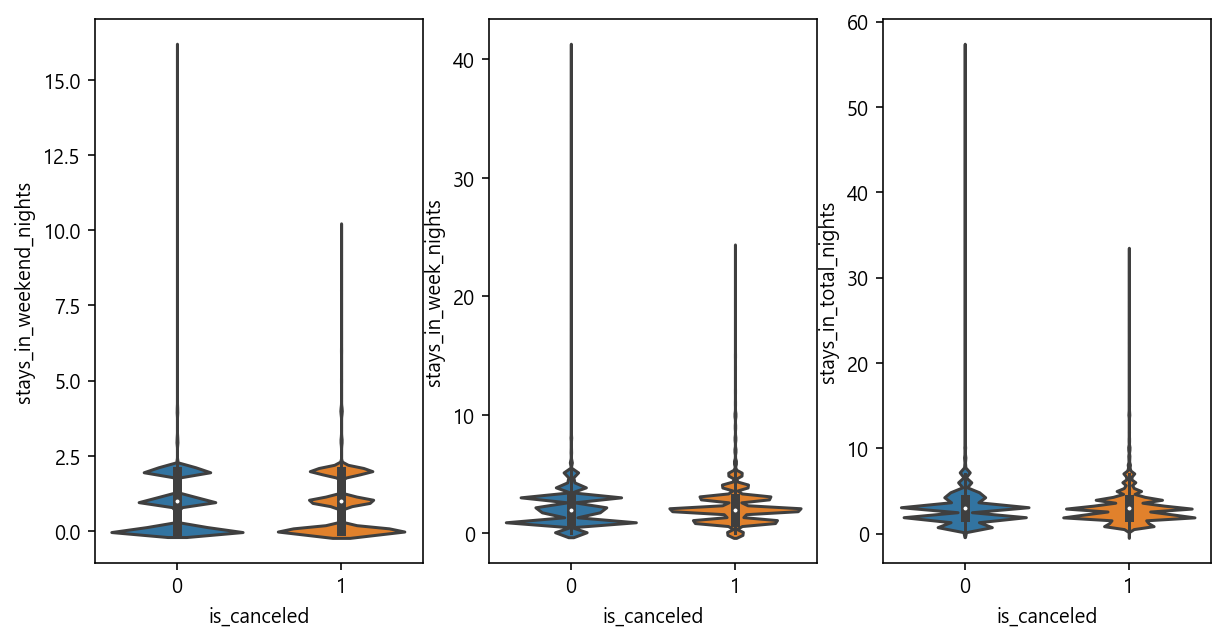

In [106]:
# 주말, 주중에 따른 예약, 취소 그래프
hh = df_City[['is_canceled', 'stays_in_weekend_nights', 'stays_in_week_nights', 'stays_in_total_nights']]
h1_m = df_City[['stays_in_weekend_nights', 'stays_in_week_nights', 'stays_in_total_nights']].columns.tolist()

fig, axes = plt.subplots(nrows = 1, ncols = 3)
fig.set_size_inches(10,5)
for i, j in enumerate(h1_m):
     sns.violinplot(data= hh, x='is_canceled', y= j, ax=axes[i])

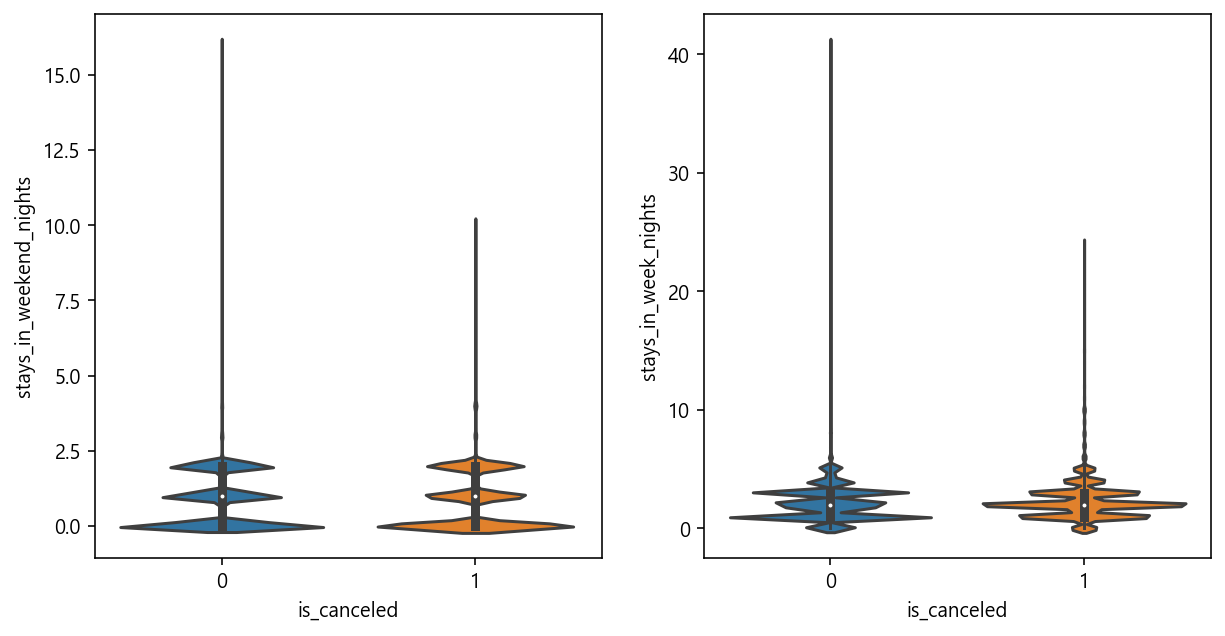

In [107]:
# 주말, 주중에 따른 예약, 취소 그래프
hh = df_City[['is_canceled', 'stays_in_weekend_nights', 'stays_in_week_nights']]
h1_m = df_City[['stays_in_weekend_nights', 'stays_in_week_nights']].columns.tolist()

fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(10,5)
for i, j in enumerate(h1_m):
     sns.violinplot(data= hh, x='is_canceled', y= j, ax=axes[i])

In [108]:
# 세대 구성?에 따른 예약, 취소 기술 통계
hh = df_City[['is_canceled', 'adults', 'children', 'babies']]
hh.describe()

,is_canceled,adults,children,babies
count,79049.000000,79049.000000,79049.000000,79049.000000
mean,0.415198,1.850776,0.091690,0.004959
std,0.492759,0.509893,0.372789,0.084473
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000
max,1.000000,4.000000,3.000000,10.000000


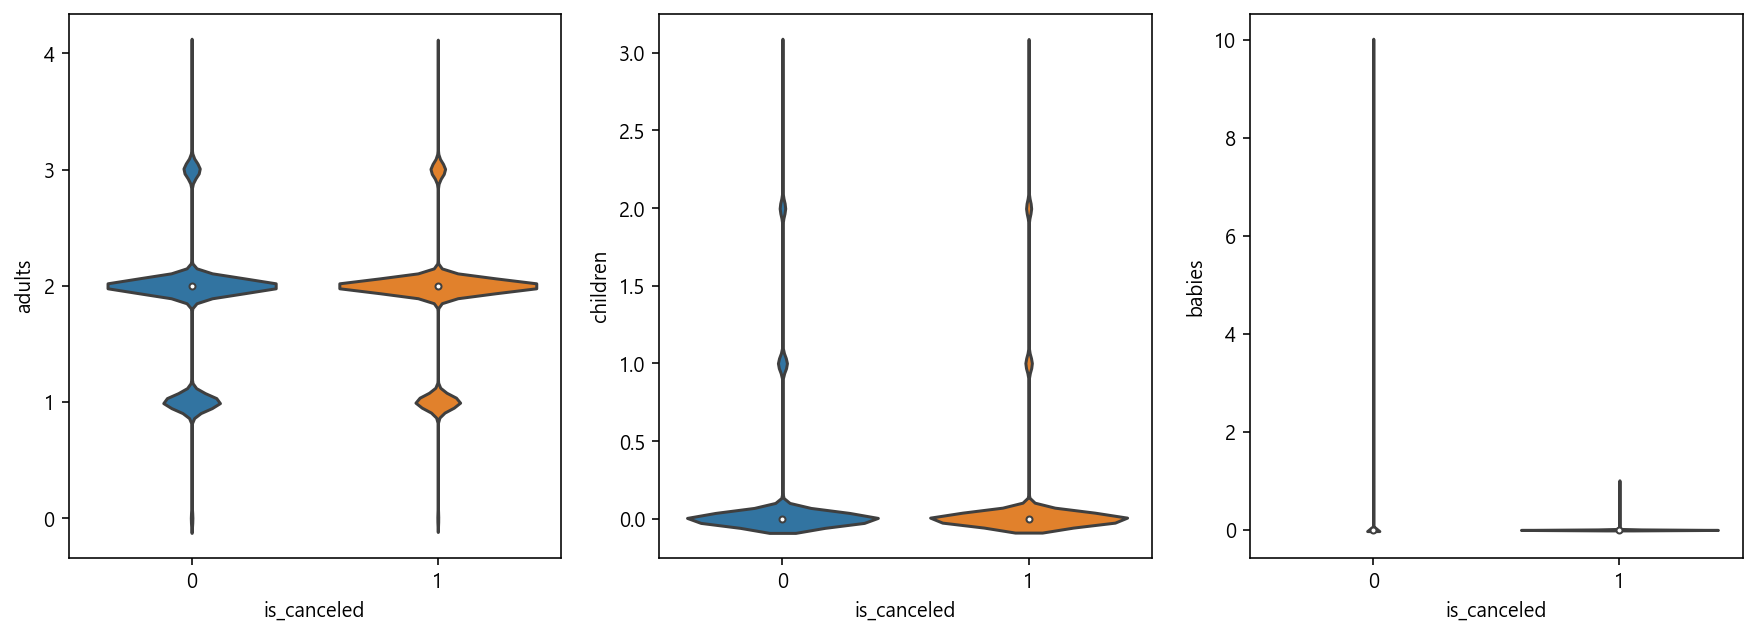

In [109]:
# 인원에 따른 예약, 취소 그래프

h1_m = df_City[['adults', 'children', 'babies']].columns.tolist()

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))
fig.set_size_inches(15,5)
for i, j in enumerate(h1_m):
     sns.violinplot(data= hh ,x='is_canceled', y= j, ax=axes[i])

In [110]:
# adults가 0이나 children, babies에 값이 존재??

hh.loc[hh['adults'] == 0, ['children', 'babies']]

,children,babies
332,0,0
862,0,0
924,3,0
960,0,0
988,2,0
...,...,...
77144,2,0
77214,2,0
77243,2,0
77393,2,0


In [111]:
# babies의 비율 확인
hh['babies'].value_counts(normalize=True)
# babies의 약 99%가 0이므로 이 칼럼은 사용하지 않기로 합니다.

0     0.995332
1     0.004567
2     0.000076
10    0.000013
9     0.000013
Name: babies, dtype: float64

In [112]:
df_City = df_City[df_City['adults']!=0]
del df_City['babies']

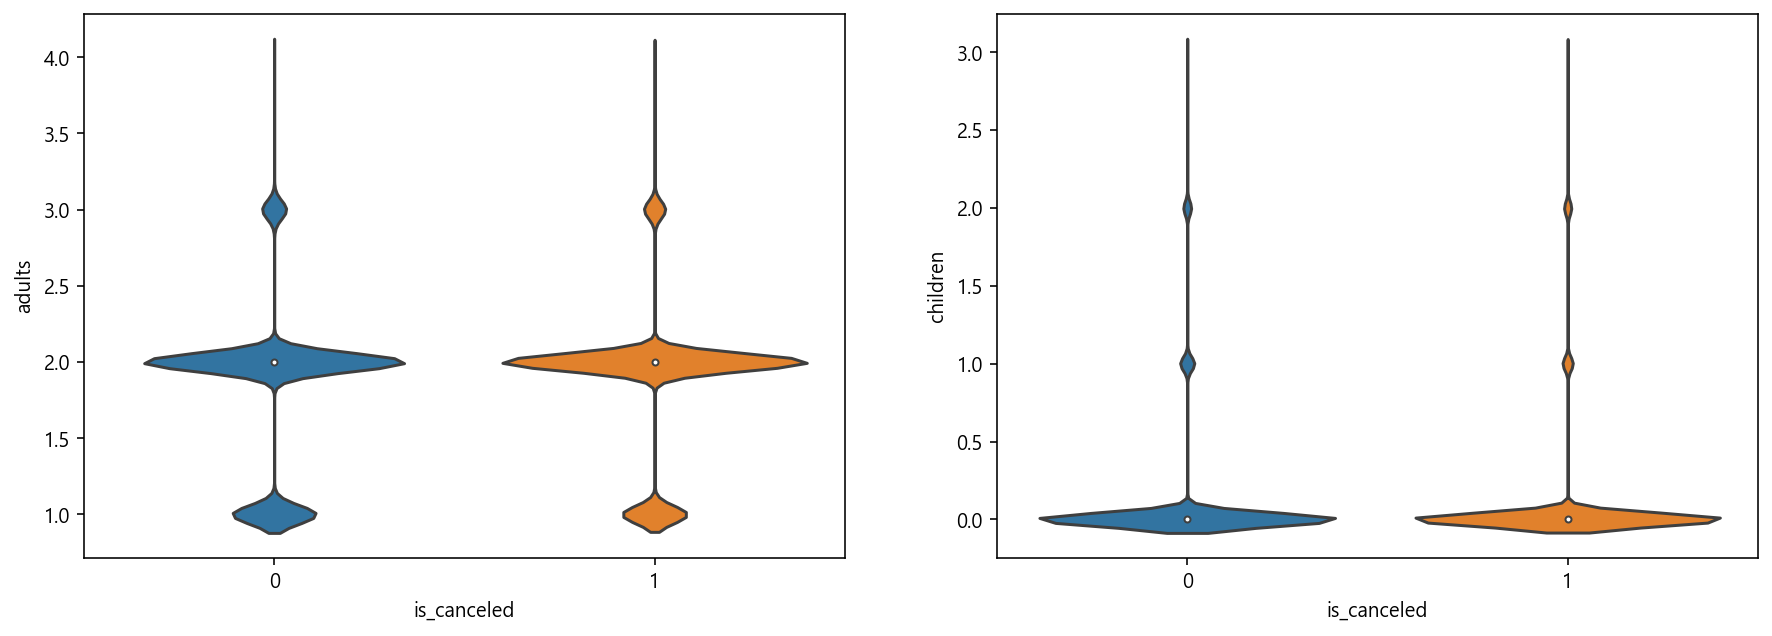

In [113]:
# 바이올린 플랏으로 그리기
hh = df_City[['is_canceled', 'adults', 'children']]
h1_m = hh[['adults', 'children']].columns.tolist()

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
fig.set_size_inches(15,5)
for i, j in enumerate(h1_m):
     sns.violinplot(data= hh ,x='is_canceled', y= j, ax=axes[i])

In [114]:
# 과거 예약 취소, 미취소, 변경에 따른 예약과 취소
hh = df_City[['is_canceled', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']]
hh.describe()

,is_canceled,previous_cancellations,previous_bookings_not_canceled,booking_changes
count,78659.000000,78659.000000,78659.000000,78659.000000
mean,0.415896,0.080309,0.133170,0.184162
std,0.492879,0.416999,1.700009,0.587012
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000
max,1.000000,21.000000,72.000000,18.000000


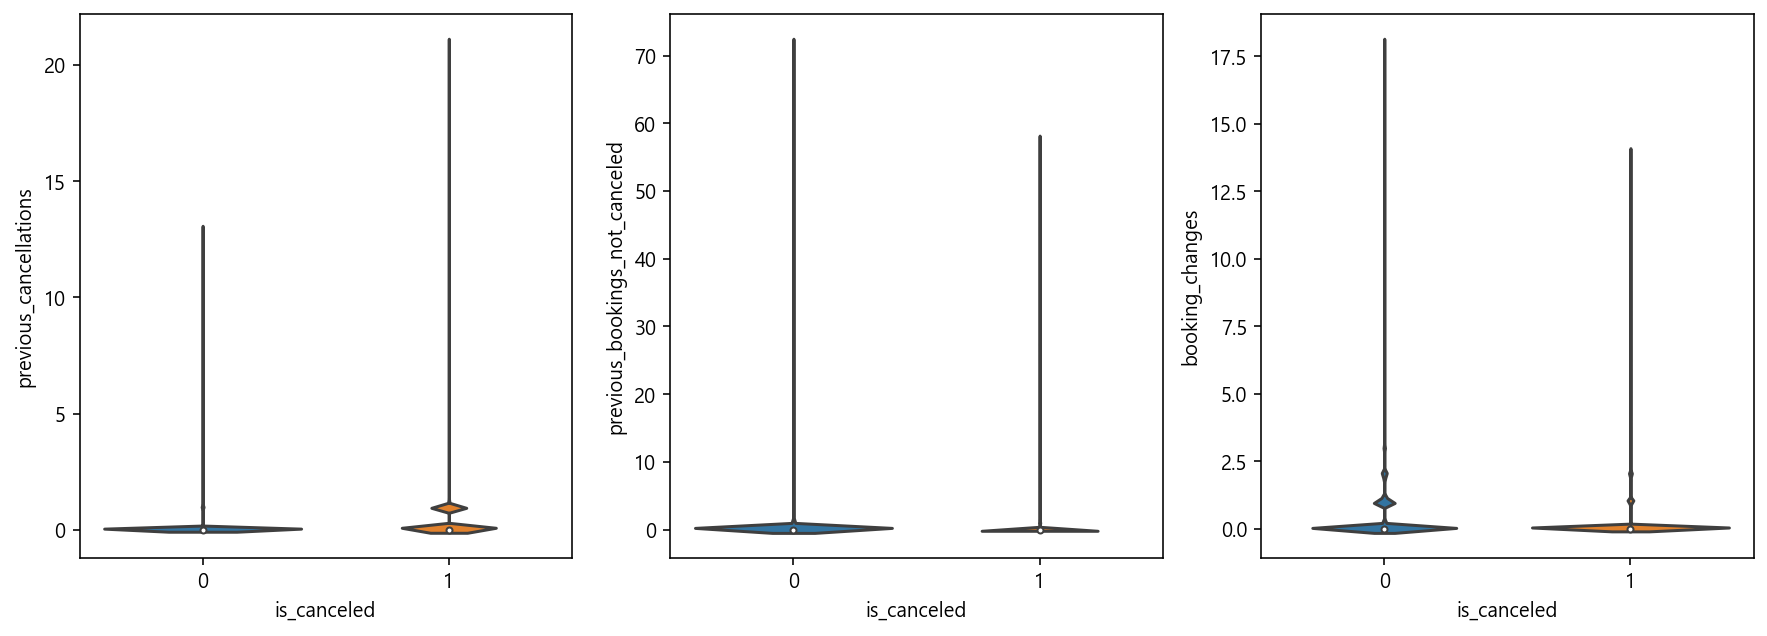

In [115]:
h1_m = df_Resort[['previous_cancellations', 'previous_bookings_not_canceled', 
           'booking_changes']].columns.tolist()

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))
fig.set_size_inches(15,5)
for i, j in enumerate(h1_m):
     sns.violinplot(data= hh ,x='is_canceled', y= j, ax=axes[i])

In [116]:
# 취소 이력이 없는 고객의 취소 수(비율)과 취소 이력이 있는 고객의 취소 수(비율) 비교
print(hh.loc[hh['previous_cancellations'] == 0, 'is_canceled'].value_counts())
print(hh.loc[hh['previous_cancellations'] == 0, 'is_canceled'].value_counts(normalize=True))

print(hh.loc[hh['previous_cancellations'] >= 1, 'is_canceled'].value_counts())
hh.loc[hh['previous_cancellations'] >= 1, 'is_canceled'].value_counts(normalize=True)

0    45577
1    27700
Name: is_canceled, dtype: int64
0    0.621982
1    0.378018
Name: is_canceled, dtype: float64
1    5014
0     368
Name: is_canceled, dtype: int64


1    0.931624
0    0.068376
Name: is_canceled, dtype: float64

In [117]:
print(hh.loc[hh['previous_bookings_not_canceled'] == 0, 'is_canceled'].value_counts())
print(hh.loc[hh['previous_bookings_not_canceled'] == 0, 'is_canceled'].value_counts(normalize=True))

print(hh.loc[hh['previous_bookings_not_canceled'] >= 1, 'is_canceled'].value_counts())
hh.loc[hh['previous_bookings_not_canceled'] >= 1, 'is_canceled'].value_counts(normalize=True)

0    44486
1    32593
Name: is_canceled, dtype: int64
0    0.577148
1    0.422852
Name: is_canceled, dtype: float64
0    1459
1     121
Name: is_canceled, dtype: int64


0    0.923418
1    0.076582
Name: is_canceled, dtype: float64

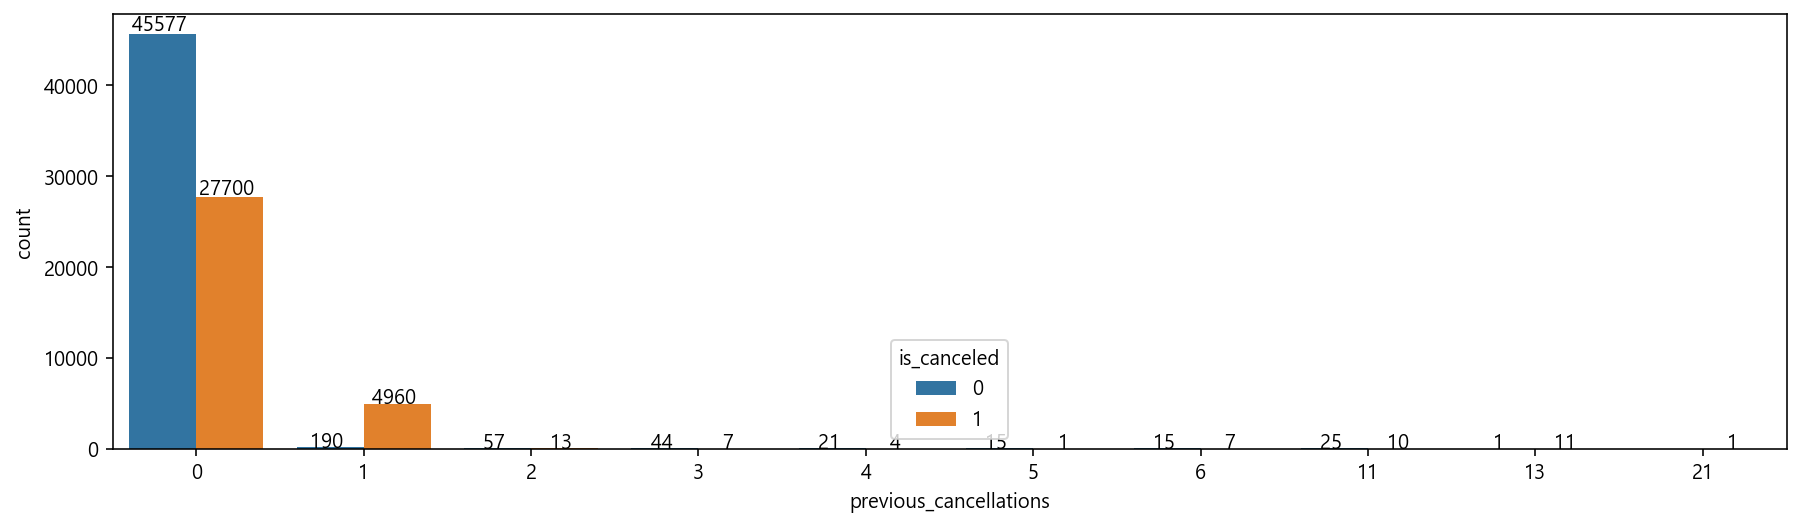

In [118]:
# hhh = hh.groupby('previous_cancellations')['is_canceled'].value_counts().unstack()
# hhh.plot(kind = 'bar')

plt.figure(figsize=(15,4))
ax = sns.countplot(data= hh, x= 'previous_cancellations', hue= 'is_canceled')
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.f "%(height), (left+width/2, height*1.01), ha='center')

plt.show()

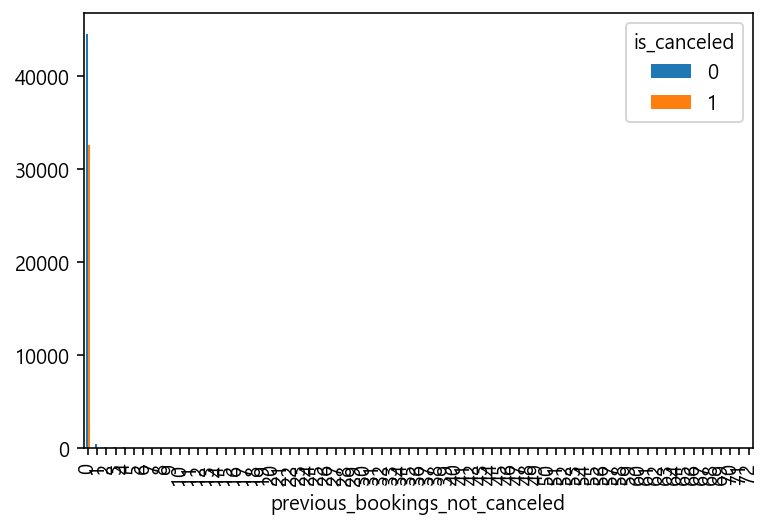

In [119]:
hhh = hh.groupby('previous_bookings_not_canceled')['is_canceled'].value_counts().unstack()
hhh.plot(kind = 'bar')

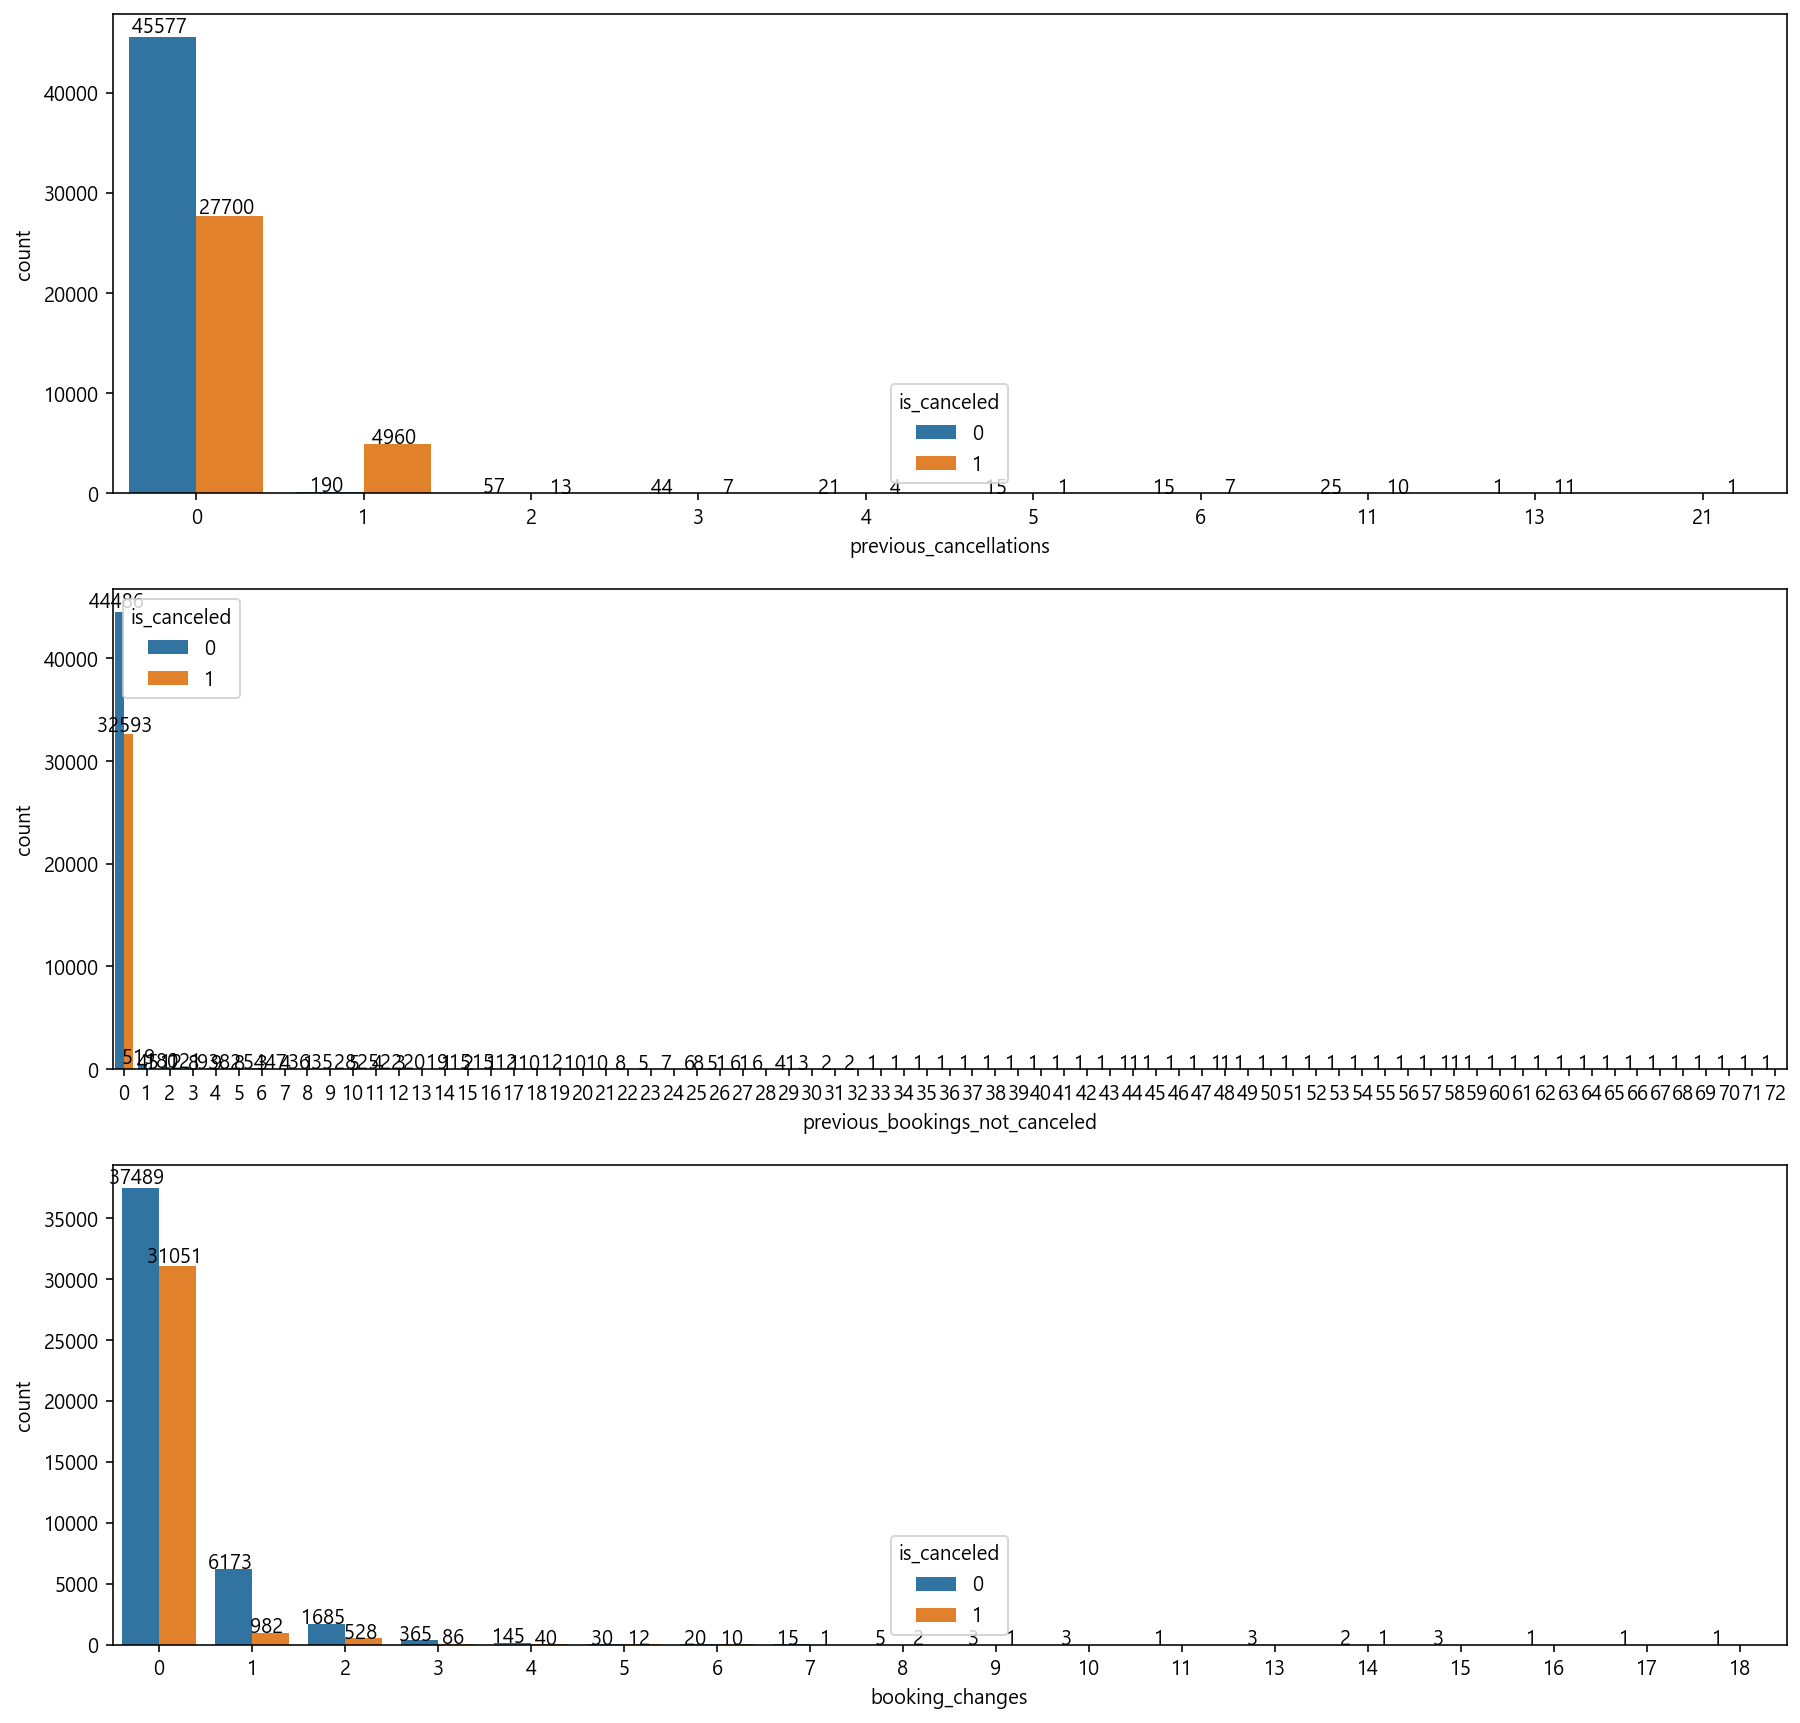

In [120]:
hh = df_City[['is_canceled', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']]
h1_m = df_City[['previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']].columns.tolist()

fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (20,5))
fig.set_size_inches(15,15)
for i, j in enumerate(h1_m):
#     print(i)
    ax = sns.countplot(data= hh, x= j, hue= 'is_canceled', ax=axes[i])
    if i == i :
#         print(i)
        for p in ax.patches: 
            left, bottom, width, height = p.get_bbox().bounds 
            ax.annotate("%.f "%(height), (left+width/2, height*1.01), ha='center')

plt.show()

In [121]:
# 가장 많이 취소한 고객은 누구?

In [122]:
hh = df_City[['is_canceled', 'reservation_status', 'reservation_status_date']]
hh.describe()

,is_canceled
count,78659.000000
mean,0.415896
std,0.492879
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


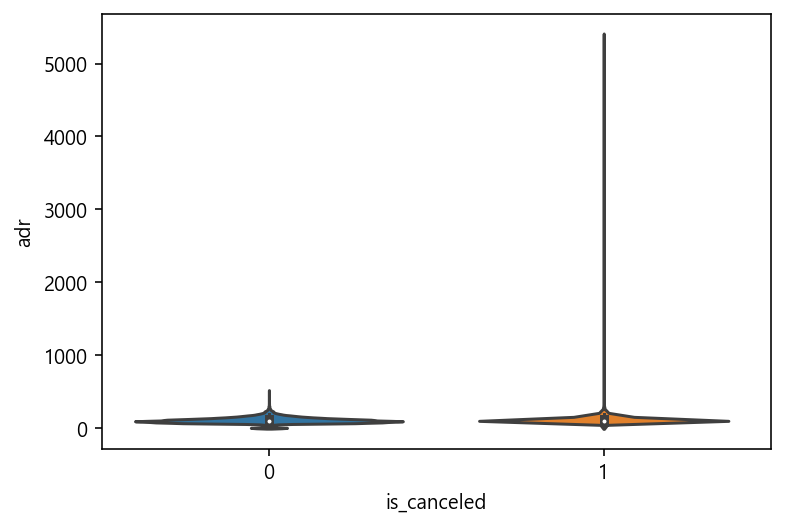

In [123]:
hh = df_City[['is_canceled', 'adr']]

sns.violinplot(data= hh, x='is_canceled', y= 'adr')

In [124]:
# adr이 5400인것은 아웃라이어로 판별되어 제거하니다.
df_City = df_City[df_City['adr']<5400]

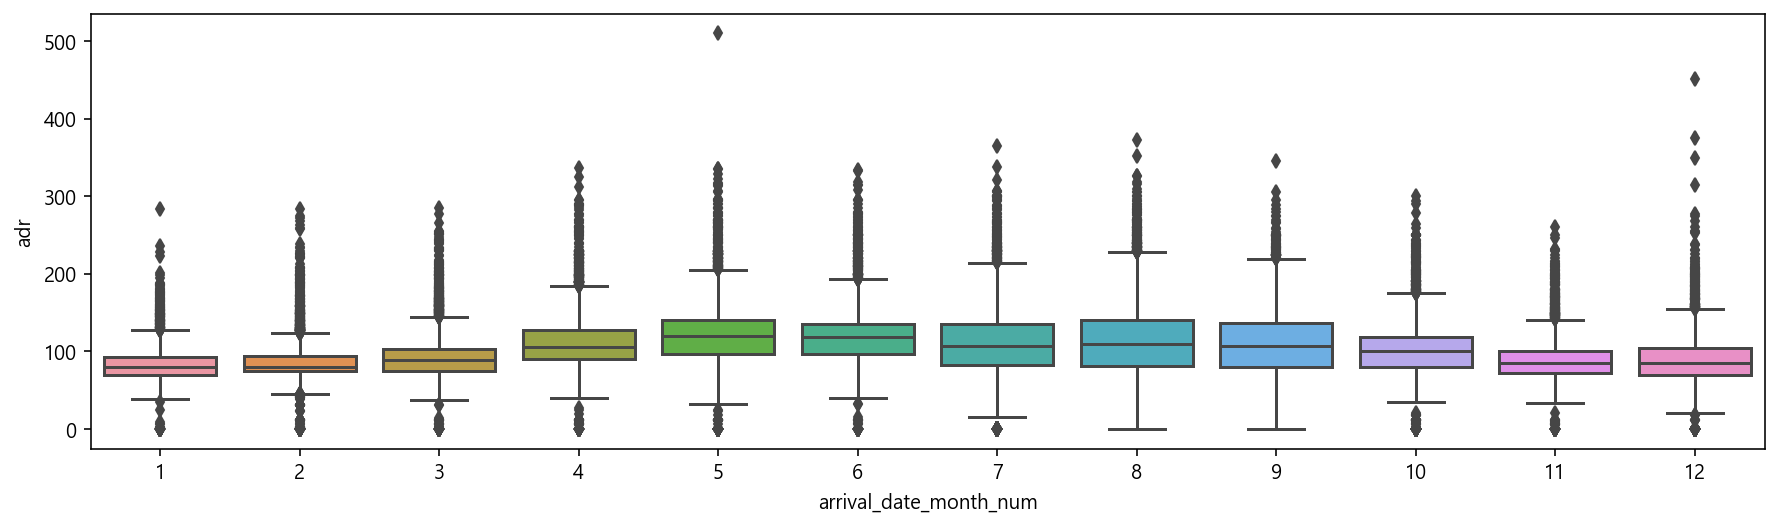

In [125]:
# 바이올린 플랏으로 그리기
hh = df_City[['is_canceled', 'arrival_date_month_num', 'adr']]
s = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.figure(figsize=(15,4))
sns.boxplot(data= hh, x= 'arrival_date_month_num', y= 'adr', order= s)

In [126]:
parking_spaces_City = list(df_City['required_car_parking_spaces'].unique())

In [127]:
for i in parking_spaces_City:
    globals()['df_City_Park{}'.format(i)] = df_City[df_City['required_car_parking_spaces']==i]
    print(i)

0
1
2
3


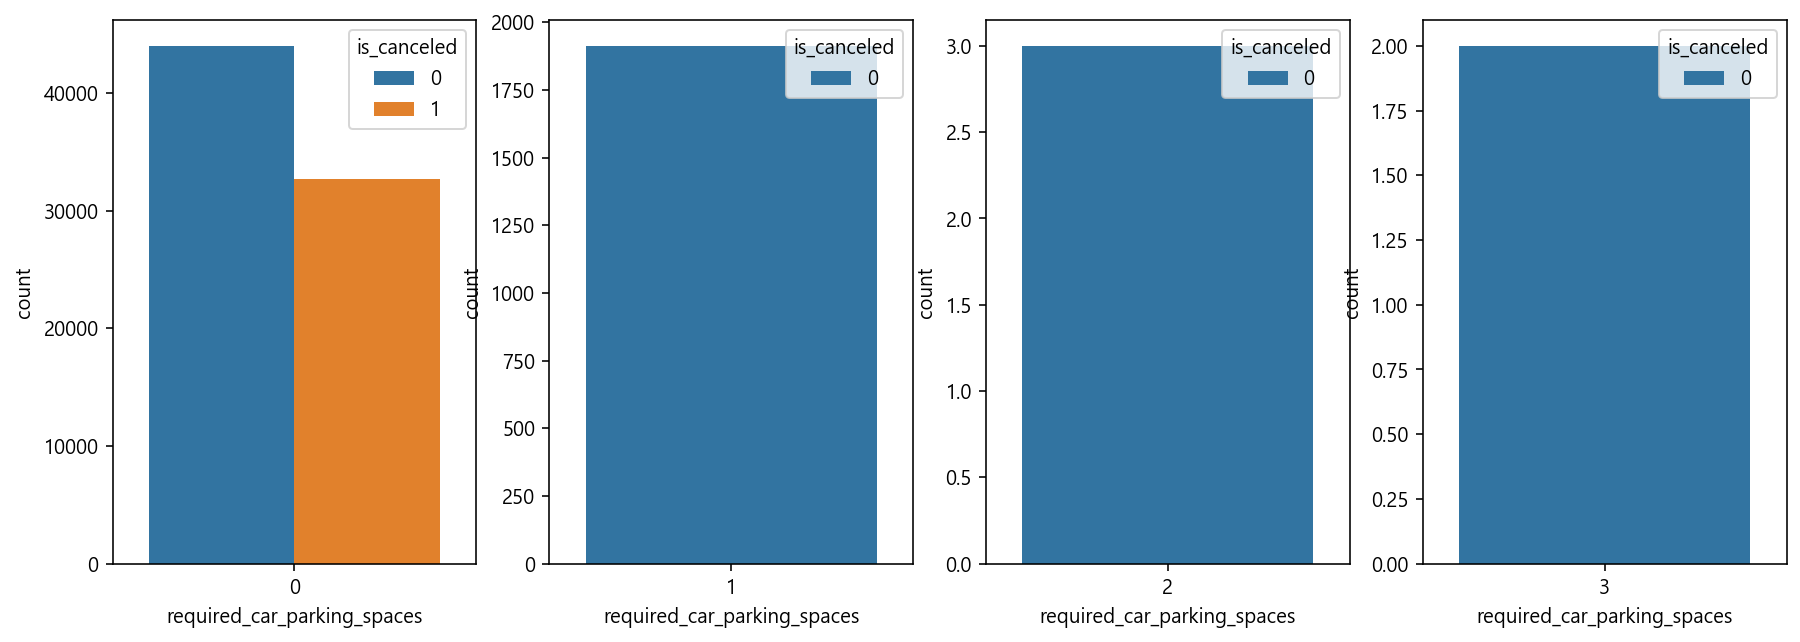

In [128]:
# Resort hotel과 마찬가지로 0이외엔 취소가 없습니다
figure, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))
figure.set_size_inches(15,5)
for i,j in enumerate(parking_spaces_City):
     sns.countplot(data= globals()['df_City_Park{}'.format(j)] ,x='required_car_parking_spaces',hue='is_canceled',ax=axes[i])

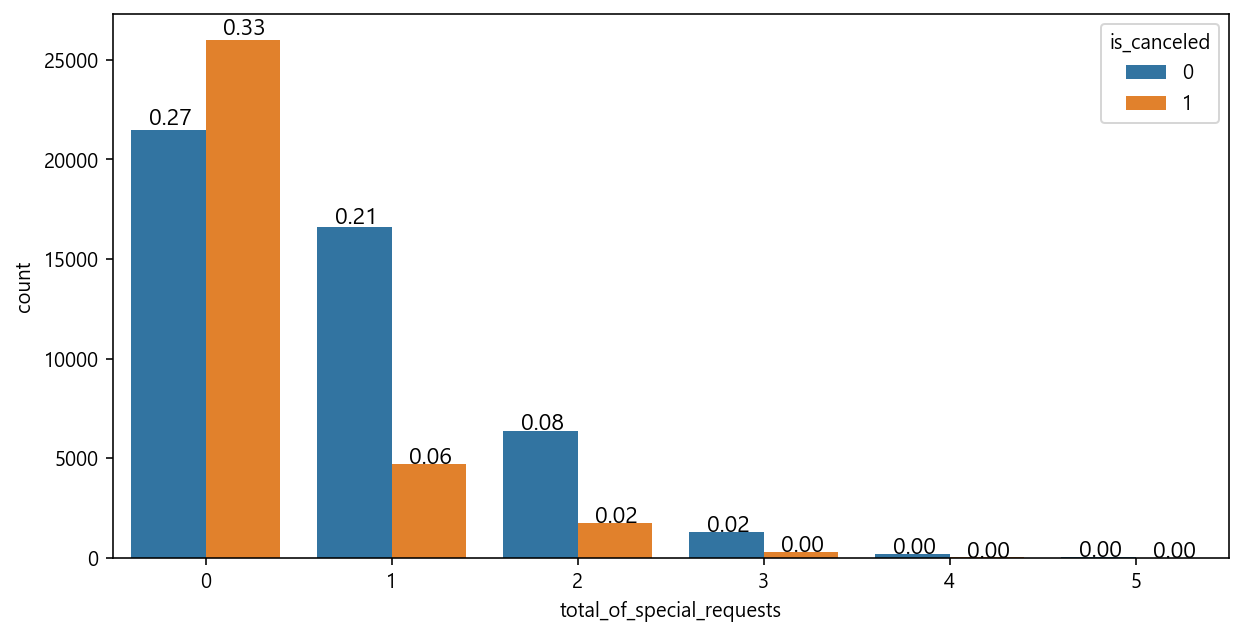

In [129]:
# Resort와는 달리 요청이 있을 때 취소가 더 높다
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df_City,x= 'total_of_special_requests',hue='is_canceled')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f"%(height/df_City.shape[0]),(left+width/1.9, height*1.011), ha='center',size=11.5)

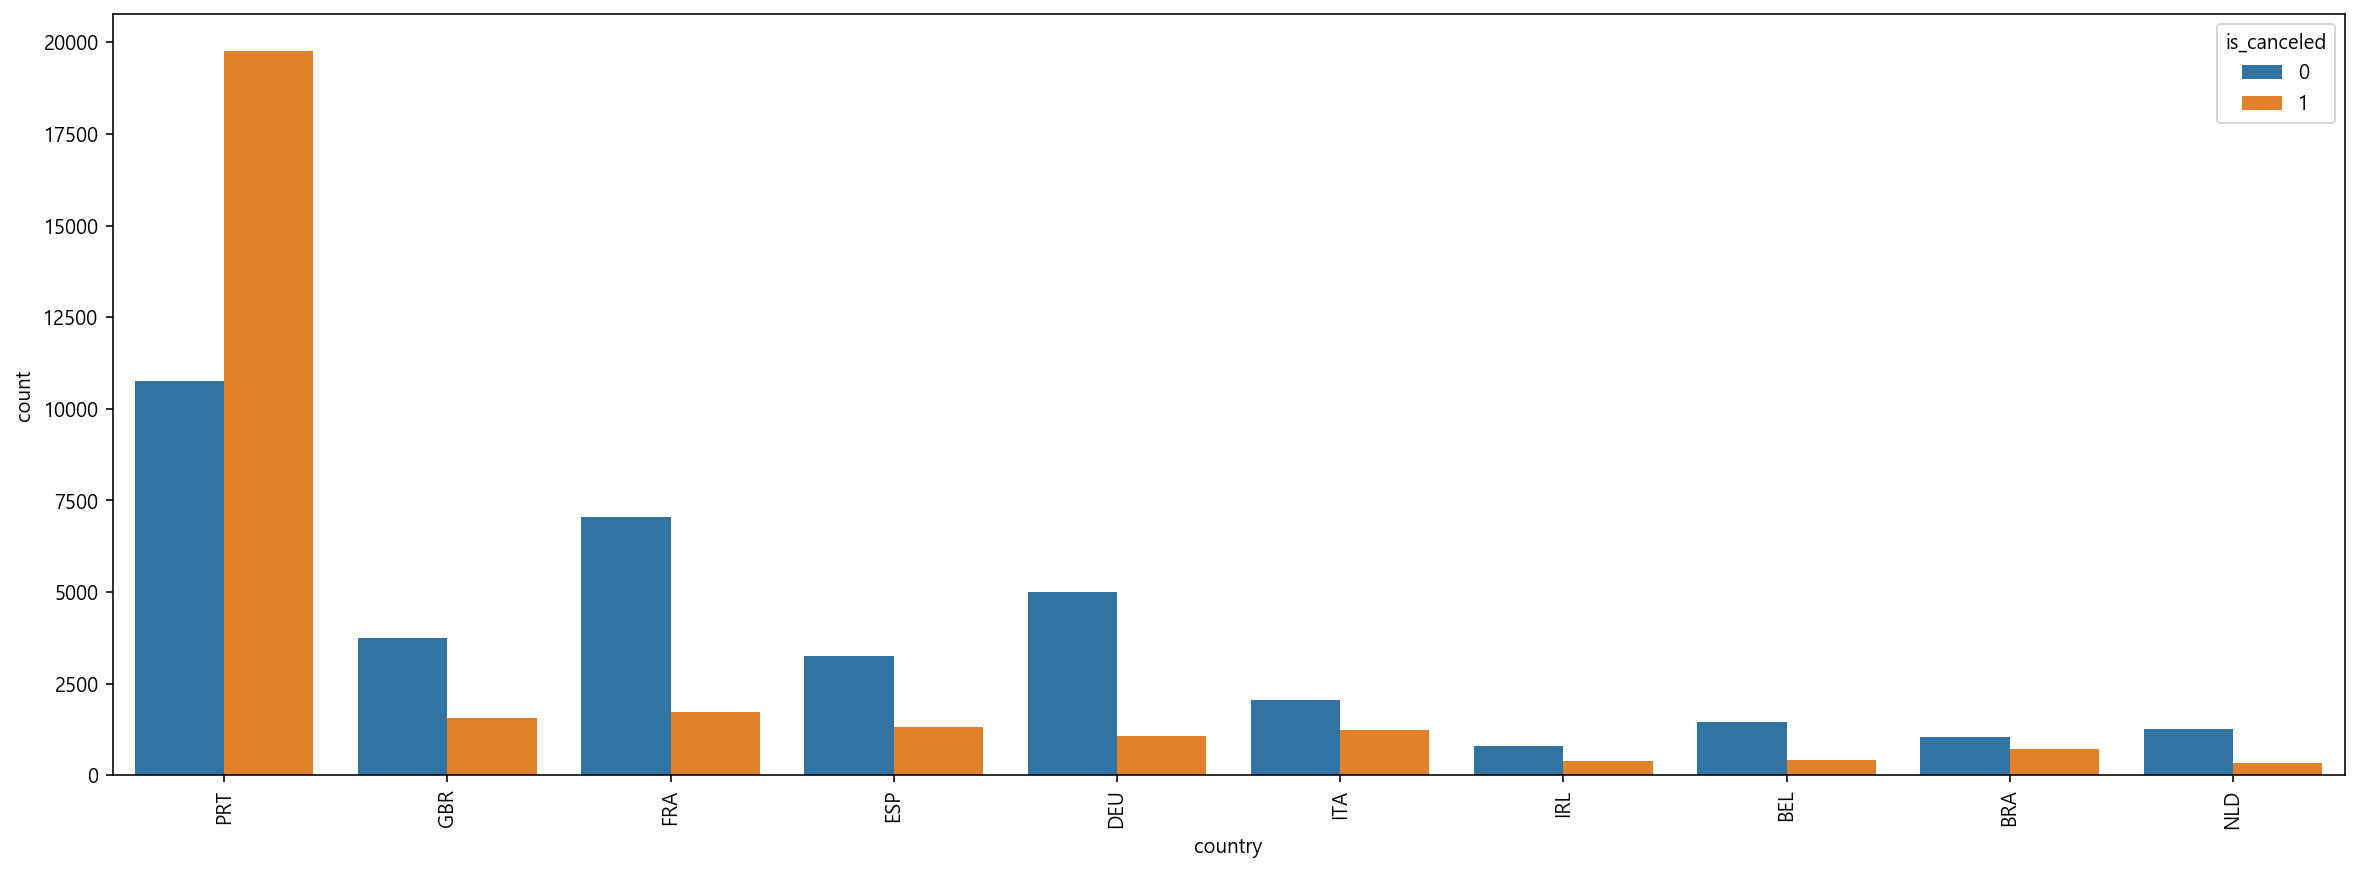

In [130]:
# 나라별 취소 현황 그래프
plt.figure(figsize = (20,7))
plt.xticks(rotation=90)
sns.countplot(data=df_City, x = 'country', hue = 'is_canceled',order=df.country.value_counts(ascending=False).iloc[:10].index)

# city hotel의 경우, 호텔이 위치한 포르투갈 국적 예약자들의 취소율이 체크인 비율보다 높은것을 볼 수 있다.
# 계산해보면 포르투갈인들의 호텔 취소율이 65%에 달하는 것을 알 수 있다. 
# 자국 호텔이기 때문에 예약과 취소를 쉽게 하는 것으로 판단된다.

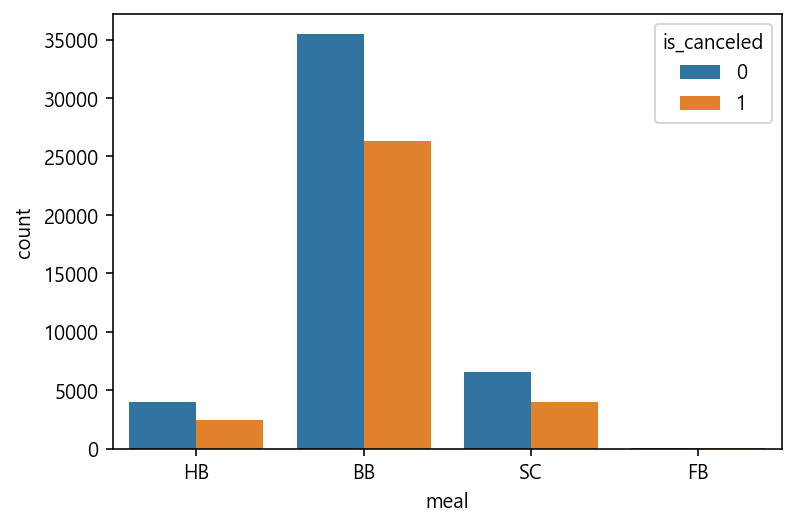

In [131]:
# city hotel의 meal type에 따른 취소 현황 그래프
sns.countplot(data=df_City, x = 'meal', hue = 'is_canceled')
# 조식을 선택한 비율이 가장 높아 보이고 취소율은 비슷해보인다. FB의 경우 그래프로 판단할 수 없다.

In [132]:
# meal type에 따른 취소율
y=df_City['meal']
x=df_City['is_canceled']
mealtype = ['BB','SC','HB','FB']
for i in mealtype:
        p = y[(y==i)&(x==1)].count()/y[y==i].count()
        print(i,p)

# 식사 조건에 따른 취소율을 비교해 본 결과, 아침, 점심, 저녁을 다 주문하는 FB 조건의 경우 취소율이 80%에 가까웠다.
# 다른 조건의 경우 취소율이 40% 내외로 서로 큰 차이를 보이지 않았다.
# resort hotel과 마찬가지로 FB의 취소율이 체크인 비율보다 높은 것을 알 수 있다.

BB 0.4259658216570827
SC 0.37675484671951104
HB 0.3801498127340824
FB 0.7954545454545454


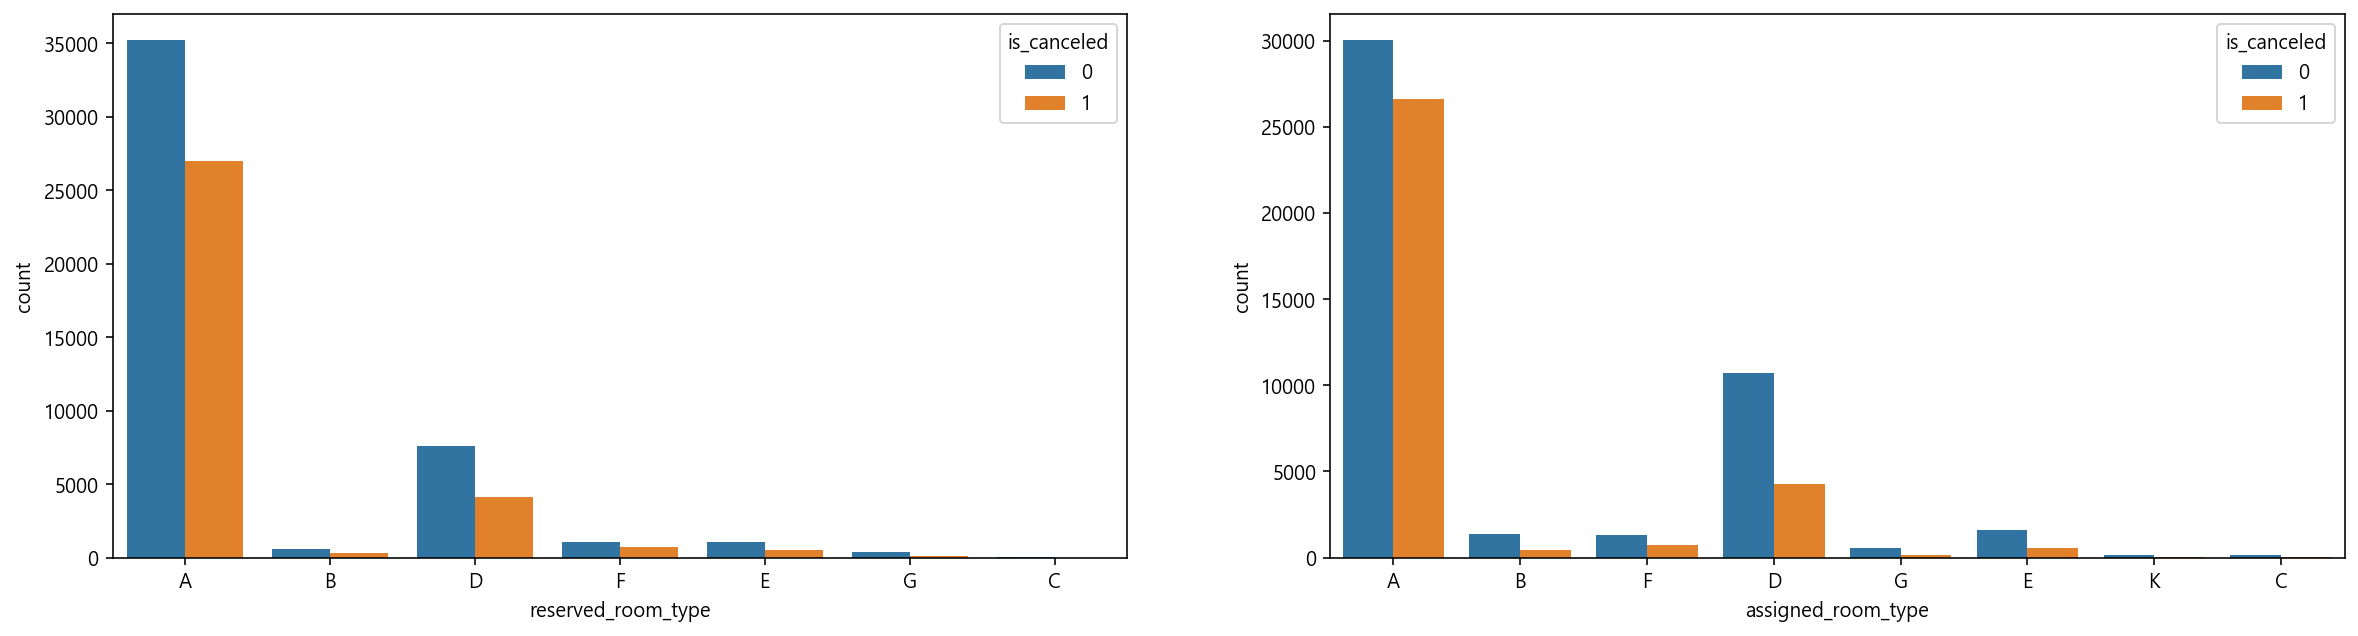

In [133]:
# room type에 따른 취소 현황
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5)) 
room_type = ['reserved_room_type','assigned_room_type']
for i, col_name in enumerate(room_type):
    col = i
    sns.countplot(data=df_City, x = col_name, hue = 'is_canceled', ax = axes[i])
    
# A, D 룸의 예약율 및 취소율이 월등히 높으며, 이 두 룸이 가장 싼 기본 룸으로 판단된다.

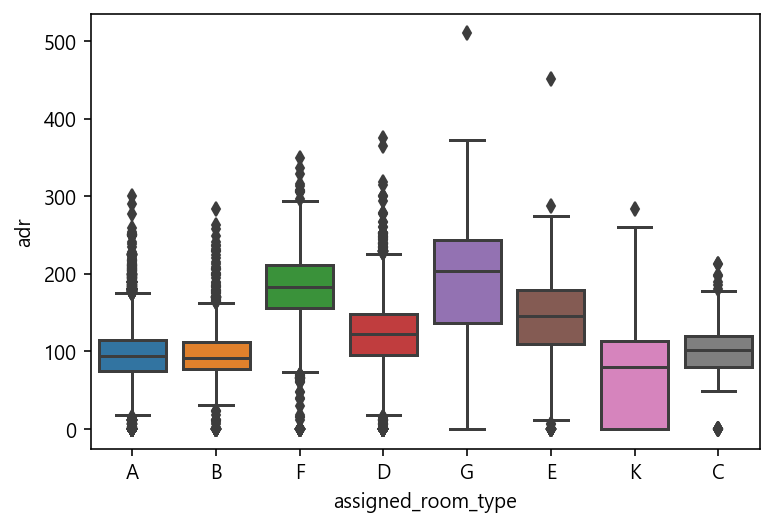

In [134]:
# room type 에 따른 adr 비교. adr은 실제 매출로 assigned room type을 기준으로 그린다. adr이 5400인 행은 이상치로 판단, 삭제함.

sns.boxplot(data = df_City, x = 'assigned_room_type',y = 'adr')

# 예약이 가장 많은 A, D room type의 가격이 가장 낮을것으로 예상했다. 
# A, D의 가격이 전체적으로 낮기는 하지만, 비슷한 가격대의 룸의 예약율과 크게 차이나는 것으로 보아, 
# 가격 외에도 룸 타입을 선택하는 기준이 있는 것으로 판단된다.

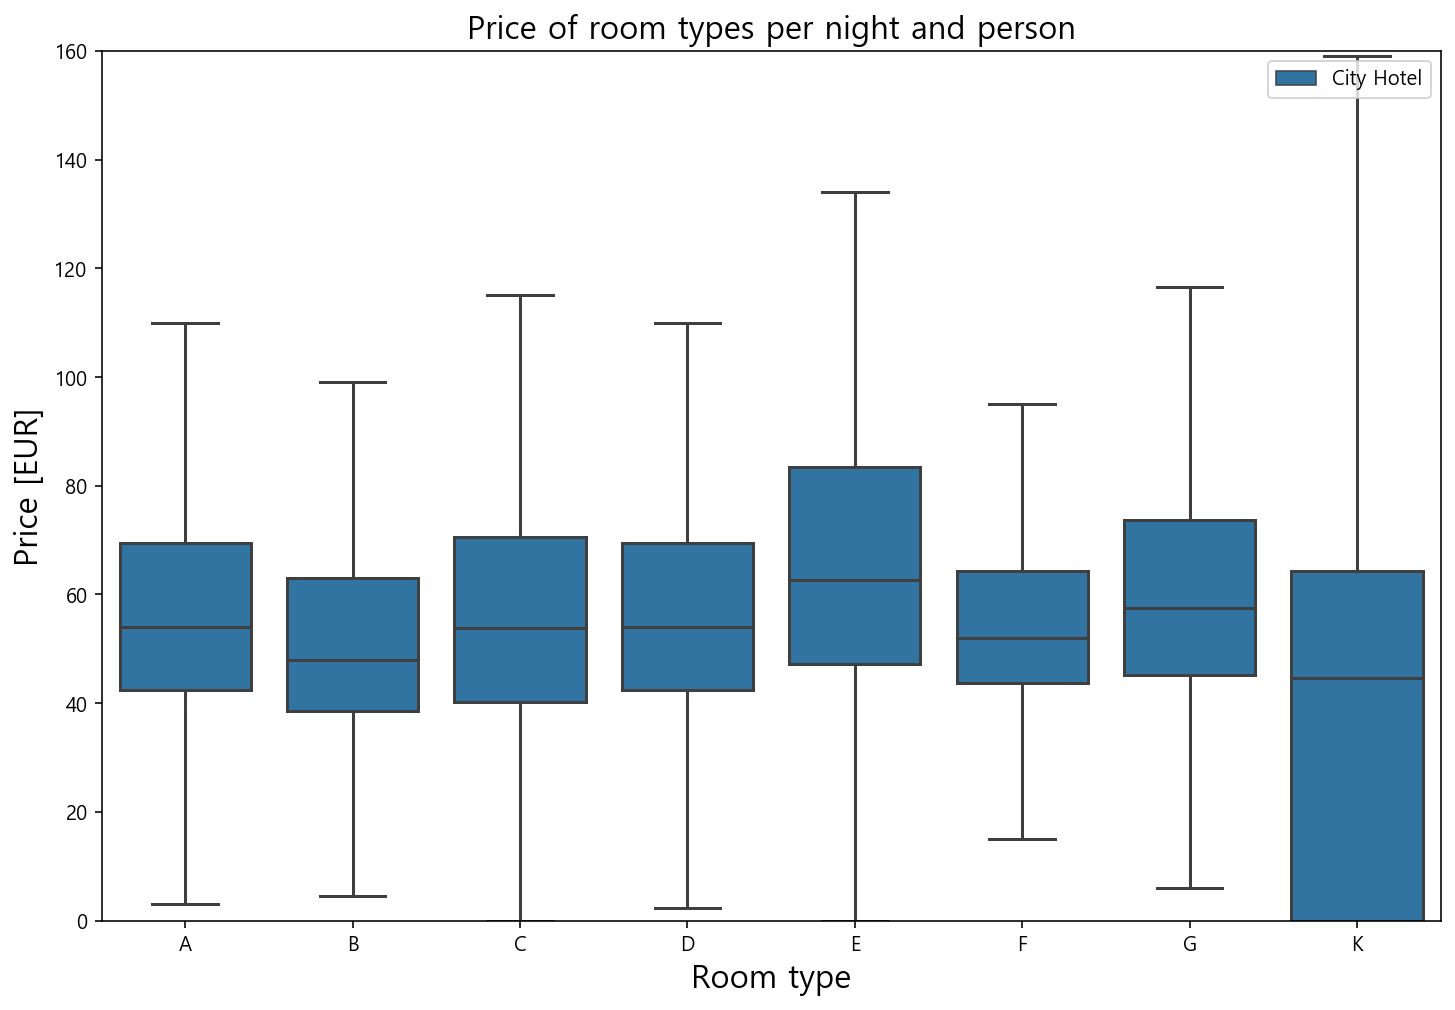

In [135]:
# 인당 하루 adr normalize price per night (adr):
df_City["adr_pp"] = df_City["adr"] / (df_City["adults"] + df_City["children"])
df_City2 = df_City.loc[df_City["is_canceled"] == 0] # 체크인 한 고객
room_prices = df_City2[["hotel", "assigned_room_type", "adr_pp"]].sort_values("assigned_room_type")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="assigned_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()


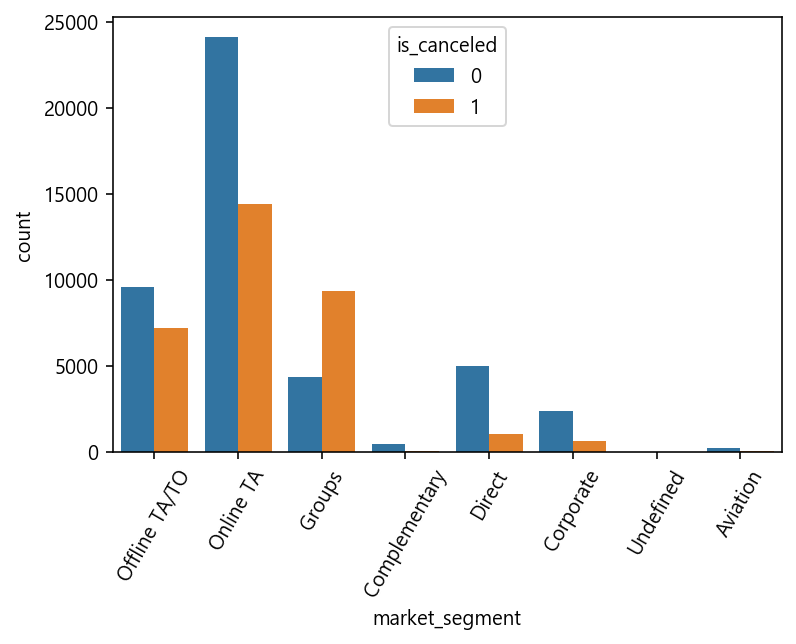

In [136]:
# market segment에 따른 취소 현황 그래프
plt.xticks(rotation=60)
sns.countplot(data = df_City, x = 'market_segment' ,hue = 'is_canceled')
# 온라인, 오프라인 TA/TO를 통한 예약이 많다는 것을 알 수 있다.
# Groups의 경우 취소율이 체크인율보다 높아 단체 고객들의 대량 취소가 있었던 것을 알 수 있다.

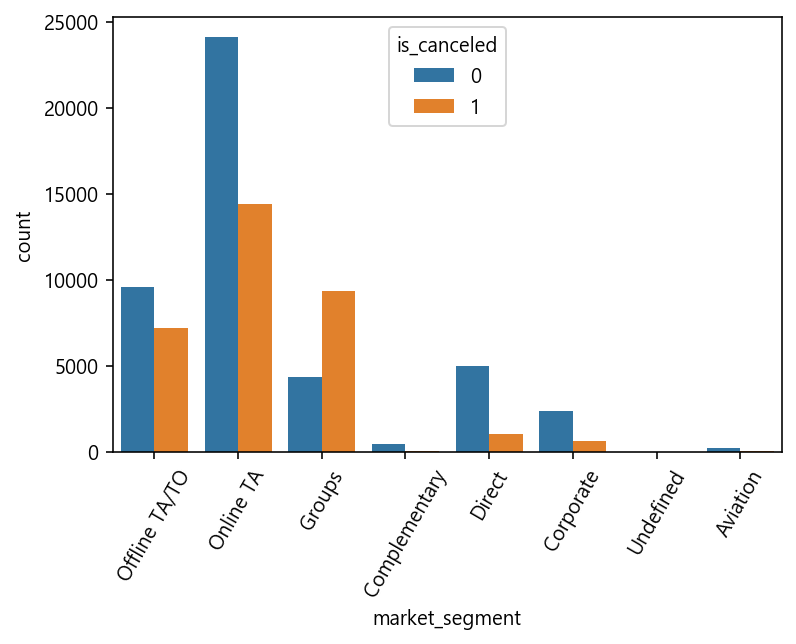

In [137]:
# market segment에 따른 취소 현황 그래프
plt.xticks(rotation=60)
sns.countplot(data = df_City, x = 'market_segment' ,hue = 'is_canceled')
# 온라인, 오프라인 TA/TO를 통한 예약이 많다는 것을 알 수 있다.
# Groups의 경우 취소율이 체크인율보다 높아 단체 고객들의 대량 취소가 있었던 것을 알 수 있다.

In [138]:
# market_segment에 따른 취소율 확인
y=df_City['market_segment']
x=df_City['is_canceled']
dc = ['Direct','Corporate','Online TA','Offline TA/TO','Complementary','Aviation','Undefined','Groups']
for i in dc:
        p = y[(y==i)&(x==1)].count()/y[y==i].count()
        print(i,p)

# Complementary = 고객 이벤트룸. 무료. Aviation = 항공사
# City Hotel의 경우 리조트 호텔에 비해 offline TA/TO 취소율도 높은 것을 알 수 있다.
# Groups의 경우 취소율이 70%에 육박한다.
# 다른 조건의 경우 취소율이 20% 이내로 높지 않다.

Direct 0.17358927684924708
Corporate 0.21498152502519316
Online TA 0.37441546295334094
Offline TA/TO 0.42877663394780946
Complementary 0.10516252390057361
Aviation 0.22127659574468084
Undefined 1.0
Groups 0.6827752595408686


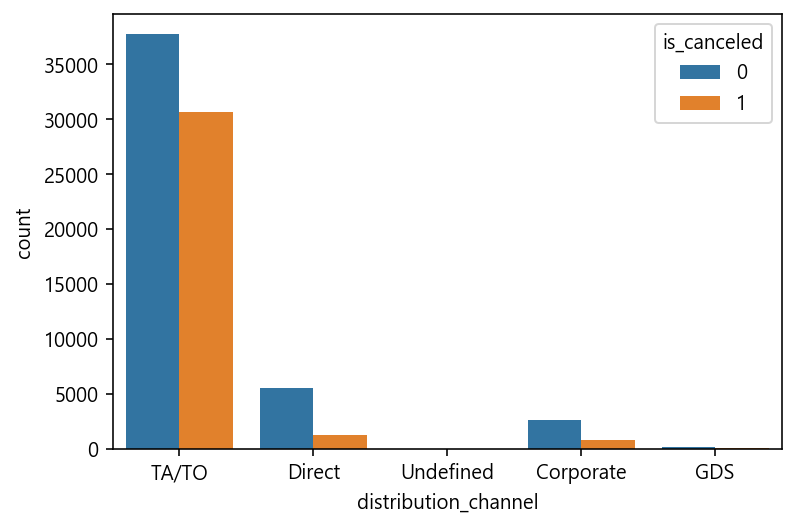

In [139]:
# distribution_channel에 따른 취소 현황 그래프
sns.countplot(data = df_City, x = 'distribution_channel' ,hue = 'is_canceled')
# city hotel의 경우 TA/TO를 통해 예약한 고객들의 취소율이 월등히 높았다.

In [140]:
df_City['distribution_channel'][(df_City['distribution_channel']=='Undefiend')&(df_City['is_canceled']==1)].count()
# Undefined 조건은 값이 없음.

0

In [141]:
# distribution_channel에 따른 취소율 확인
y=df_City['distribution_channel']
x=df_City['is_canceled']
dc = ['TA/TO','Direct','Undefined','Corporate','GDS']
for i in dc:
        p = y[(y==i)&(x==1)].count()/y[y==i].count()
        print(i,p)

# 취소율을 살펴보면, 다른 채널을 통해 예약한 고객들의 취소율은 20% 내외이지만, TA/TO를 통해 예약한 고객의 취소율은 45%에 달한다.
# Undefined의 경우 값이 없어서 1로 나옴
# 여러 호텔을 비교할 수 있는 사이트를 통해 예약한 고객들은 취소 후 다른 좋은 조건의 호텔로 예약할 수 있다고 판단된다.

TA/TO 0.4486753755906318
Direct 0.18195354377605719
Undefined 1.0
Corporate 0.23006497341996457
GDS 0.19170984455958548


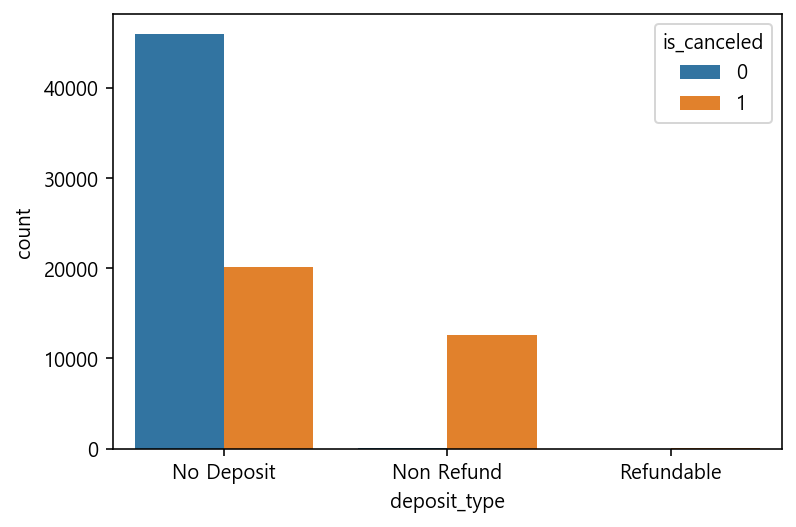

In [142]:
# deposit_type에 따른 취소 현황 그래프
sns.countplot(data = df_City, x = 'deposit_type' ,hue = 'is_canceled')

# resort hotel과 마찬가지.
# deposit_type 컬럼의 경우 Non Refund 조건이지만 취소된 경우가 있는데,
# 예약자의 사정으로 못 오게 된 경우와 실수로 예약을 눌러 취소를 못 한 경우가 있을 수 있다.
# 환불 불가 조건인데 취소가 되었다는 부분에서 모순으로 보일 수 있지만,
# 해당 데이터에는 노쇼 고객은 따로 표시되지 않고 체크인한 고객과 취소한 고객으로만 나뉘어져 있기 때문에
# 고객이 오지 않은 경우도 취소된 예약으로 표시된 것으로 보인다.
# 또 예약 고객들이 온라인으로 예약을 했기 때문에 환불은 안되었는데 취소는 되었을 수 있다.

### 통계검정

#### t-test

In [143]:
df_Resort.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_num', 'arrival_date', 'arrival_day_of_week',
       'stays_in_total_nights', 'adr_pp', 'total_p'],
      dtype='object')

In [144]:
#제거 한 값들이나 컬럼들이 있기 때문에 다시 is_canceled가 0과 1일때로 나눕니다
df_City_1 = df_City[df_City['is_canceled'].apply(length)]
df_City_0 = df_City[df_City['is_canceled'].apply(length_2)]
df_Resort_1 = df_City[df_City['is_canceled'].apply(length)]
df_Resort_0 = df_City[df_City['is_canceled'].apply(length_2)]

In [145]:
#t-test할 컬럼들
col_lst = ['lead_time','adr','stays_in_week_nights','stays_in_weekend_nights','stays_in_total_nights',
          'adults','children','previous_cancellations','previous_bookings_not_canceled','required_car_parking_spaces',
          'total_of_special_requests','booking_changes']

In [146]:
#t-test를 위한 함수 작성
import scipy.stats as stats
lresult_stat = []
lresult_pvalue = []
t_stat = []
t_pvalue = []

def t_test(x,y):   
    lresult=stats.levene(x,y)
    lresult_stat.append(lresult.statistic)
    lresult_pvalue.append(lresult.pvalue)
    if round(lresult.pvalue,3) < 0.05:
        result = stats.ttest_ind(x,y,equal_var=False)
    else:
        result = stats.ttest_ind(x,y,equal_var=True)
    t_stat.append(round(result.statistic,3))
    t_pvalue.append(round(result.pvalue,3))
    return lresult_stat, lresult_pvalue, t_stat, t_pvalue

In [147]:
# City Hotel t_test
for i in col_lst:
    t_test(df_City_0[i],df_City_1[i])

In [148]:
df_City_result = pd.DataFrame({'column':col_lst,'등분산_통계량':lresult_stat,'등분산_유의확률':lresult_pvalue,
              't-test_통계량':t_stat,'t-test_유의확률':t_pvalue})

In [149]:
df_City_result

,column,등분산_통계량,등분산_유의확률,t-test_통계량,t-test_유의확률
0,lead_time,3155.638979,0.000000e+00,-84.949,0.000
1,adr,47.980591,4.337503e-12,3.935,0.000
2,stays_in_week_nights,50.398637,1.265382e-12,-14.216,0.000
3,stays_in_weekend_nights,110.790168,6.843945e-26,1.030,0.303
4,stays_in_total_nights,13.081676,2.983849e-04,-10.584,0.000
5,adults,518.970958,1.667236e-114,-14.151,0.000
6,children,54.770451,1.368066e-13,7.517,0.000
7,previous_cancellations,2285.967558,0.000000e+00,-44.946,0.000
8,previous_bookings_not_canceled,221.742017,4.413328e-50,16.993,0.000
9,required_car_parking_spaces,1416.680954,2.748228e-307,44.606,0.000


In [150]:
for i in col_lst:
    t_test(df_Resort_0[i],df_Resort_1[i])

In [151]:
df_Resort_result = pd.DataFrame({'column':col_lst,'등분산_통계량':lresult_stat,'등분산_유의확률':lresult_pvalue,
              't-test_통계량':t_stat,'t-test_유의확률':t_pvalue})

ValueError: arrays must all be same length

In [ ]:
df_Resort_result

#### chi-square

In [ ]:
categorical_lst = ['is_canceled','arrival_date_year','meal','country','market_segment','distribution_channel','is_repeated_guest',
          'reserved_room_type','assigned_room_type','deposit_type','agent','customer_type','reservation_status',
          'arrival_date_month_num','arrival_day_of_week']

In [ ]:
#chi-square test를 위해 categorical type으로 변경
df_Resort_Category = df_Resort[categorical_lst].astype('category').copy()
df_City_Category = df_City[categorical_lst].astype('category').copy()

In [ ]:
def chi(data,y,x='is_canceled'):
    df_cr = pd.crosstab(data[x],data[y])
    chi2, p , dof, ex = stats.chi2_contingency(df_cr,correction=False)
    print(x,y,p)

In [ ]:
#유의확률이 0에 가깝기 때문에 귀무가설을 기각하지 않아도 된다.
for i in categorical_lst:
    chi(df_Resort_Category,i,x='is_canceled')

In [ ]:
#유의확률이 0에 가깝기 때문에 귀무가설을 기각하지 않아도 된다.
for i in categorical_lst:
    chi(df_City_Category,i,x='is_canceled')

### 머신러닝을 위한 label_encoding

In [ ]:
df_Resort.columns

In [ ]:
label_encoding_lst =['meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type',
'deposit_type', 'customer_type','reservation_status']

In [ ]:
#city hotel 명목형 변수들 encoding
for i in range(len(label_encoding_lst)):
    df_City[label_encoding_lst[i]+'_encode'] = pd.factorize(df_City[label_encoding_lst[i]])[0]

In [ ]:
df_City = df_City.drop(label_encoding_lst,axis=1)

In [ ]:
#arrival_date_month는 이미 숫자화 했기 때문에 drop 해준다
df_City = df_City.drop('arrival_date_month',axis=1)

In [ ]:
City_corr = df_City.corr()

In [ ]:
mask = np.zeros_like(City_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,15))
sns.heatmap(data = City_corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues', 
            mask=mask, cbar_kws={"shrink": .5}, vmin = -1,vmax = 1)

In [ ]:
#resort hotel 명목형 변수들 encoding
for i in range(len(label_encoding_lst)):
    df_Resort[label_encoding_lst[i]+'_encode'] = pd.factorize(df_Resort[label_encoding_lst[i]])[0]

In [ ]:
df_Resort = df_Resort.drop(label_encoding_lst,axis=1)

In [ ]:
#arrival_date_month는 이미 숫자화 했기 때문에 drop 해준다
df_Resort = df_Resort.drop('arrival_date_month',axis=1)

In [ ]:
Resort_corr = df_Resort.corr()
mask = np.zeros_like(Resort_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,15))
sns.heatmap(data = Resort_corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues', 
            mask=mask, cbar_kws={"shrink": .5}, vmin = -1,vmax = 1)